# **Top Streamed Songs (in Spotify)**

**For this project, I will analyze the top performing music based on different categories. I will also analyze if there is any notable trends among the data.**

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

### **Importing the Data**

In [200]:
music = pd.read_csv('spotify-2023.csv', encoding='latin-1')

### **Reviewing the Data**

In [201]:
music.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [202]:
music.shape

(953, 24)

In [203]:
music.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

For reference, the description/meaning of the column names per author's notes:

- **track_name**: Name of the song
- **artist(s)_name**: Name of the artist(s) of the song
- **artist_count**: Number of artists contributing to the song
- **released_year**: Year when the song was released
- **released_month**: Month when the song was released
- **released_day**: Day of the month when the song was released
- **in_spotify_playlists**: Number of Spotify playlists the song is included in
- **in_spotify_charts**: Presence and rank of the song on Spotify charts
- **streams**: Total number of streams on Spotify
- **in_apple_playlists**: Number of Apple Music playlists the song is included in
- **in_apple_charts**: Presence and rank of the song on Apple Music charts
- **in_deezer_playlists**: Number of Deezer playlists the song is included in
- **in_deezer_charts**: Presence and rank of the song on Deezer charts
- **in_shazam_charts**: Presence and rank of the song on Shazam charts
- **bpm**: Beats per minute, a measure of song tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how suitable the song is for dancing
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sound in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words in the song

In [204]:
music.duplicated().sum()

0

In [205]:
music.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [206]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [207]:
music.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

In [208]:
music['released_day'].value_counts()

1     95
21    44
13    43
24    40
2     39
20    39
4     39
7     39
6     39
10    37
9     36
22    33
3     32
25    28
17    28
14    26
8     25
19    25
5     25
23    23
29    23
30    22
11    22
28    21
27    21
15    21
16    20
31    19
18    19
12    17
26    13
Name: released_day, dtype: int64

In [209]:
music['released_month'].value_counts()

1     134
5     128
3      86
6      86
11     80
12     75
10     73
4      66
7      62
2      61
9      56
8      46
Name: released_month, dtype: int64

In [210]:
music['released_year'].value_counts()

2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: released_year, dtype: int64

In [211]:
music['key'].value_counts()

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64

There are missing values in 'in_shazam_charts' and 'key' columns. Let's investigate this further.

### **Investigating the Missing Values**

Creating a dataset that only contains the missing value in "key" column.

In [212]:
mask = music['key'].isnull()
missing_key = music[mask == True]
missing_key.reset_index(drop=True)

track_name  \
0                                             Flowers   
1   What Was I Made For? [From The Motion Picture ...   
2                                    I Wanna Be Yours   
3                                     Los del Espacio   
4    Barbie World (with Aqua) [From Barbie The Album]   
..                                                ...   
90                                     Hold Me Closer   
91                                         After LIKE   
92              B.O.T.A. (Baddest Of Them All) - Edit   
93                                          Labyrinth   
94                                      Sweet Nothing   

                                       artist(s)_name  artist_count  \
0                                         Miley Cyrus             1   
1                                       Billie Eilish             1   
2                                      Arctic Monkeys             1   
3   Big One, Duki, Lit Killah, Maria Becerra, FMK,...             8   
4                        Nicki Minaj, Aqua, Ice Spice             3   
..                                                ...           ...   
90                         Elton John, Britney Spears             2   
91                                                IVE             1   
92                Interplanetary Criminal, Eliza Rose             2   
93                                       Taylor Swift             1   
94                                       Taylor Swift             1   

    released_year  released_month  released_day  in_spotify_playlists  \
0            2023               1            12                 12211   
1            2023               7            13                   873   
2            2013               1             1                 12859   
3            2023               6             1                  1150   
4            2023               6            23                  1117   
..            ...             ...           ...                   ...   
90           2017              11            10                  4967   
91           2022               8            22                   767   
92           2022               6            15                  5153   
93           2022              10            21                  1597   
94           2022              10            21                  1747   

    in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
0                 115  1316855716                 300  ...  118  NaN  Major   
1                 104    30546883                  80  ...   78  NaN  Major   
2                 110  1297026226                  24  ...  135  NaN  Minor   
3                  31   123122413                  22  ...  120  NaN  Major   
4                  80    65156199                  82  ...  144  NaN  Major   
..                ...         ...                 ...  ...  ...  ...    ...   
90                  0   284216603                 165  ...  126  NaN  Major   
91                 12   265548837                  20  ...  125  NaN  Major   
92                  6   244585109                 102  ...  137  NaN  Major   
93                  0   187339835                   6  ...  110  NaN  Major   
94                  0   186104310                   9  ...  177  NaN  Major   

   danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0              71         65       68              6                   0   
1              44         14        9             96                   0   
2              48         44       42             12                   2   
3              81         63       68             11                   0   
4              77         75       58             52                   0   
..            ...        ...      ...            ...                 ...   
90             67         49       77             11                   0   
91             68         80       92             10                   

In [213]:
#Confirming that it aligns with the number of null values in 'key' column according to the info code.
missing_key.shape

(95, 24)

Since the key column is a category, let's replace the missing values to "Unknown". Deleting the rows is also an option (almost 10% of the data contained missing key values). However, since they contain information in other columns, I decided to not remove them. 

In [214]:
music['key'] = music['key'].fillna('')
music['key'] = music['key'].replace('','Unknown')

In [215]:
#Confirming "Unknown" category is created.
music['key'].value_counts()

C#         120
G           96
Unknown     95
G#          91
F           89
B           81
D           81
A           75
F#          73
E           62
A#          57
D#          33
Name: key, dtype: int64

In [216]:
#Verifying that there are no more null values in "key" column.
music['key'].isnull().sum()

0

Investigating the "in_shazam_charts" column. 

In [217]:
music['in_shazam_charts'].isnull().sum()

50

In [218]:
music['in_shazam_charts'].value_counts()

0      344
1       73
2       35
3       21
4       19
      ... 
115      1
230      1
169      1
529      1
95       1
Name: in_shazam_charts, Length: 198, dtype: int64

In [219]:
music['in_shazam_charts'].describe()

count     903
unique    198
top         0
freq      344
Name: in_shazam_charts, dtype: object

In [220]:
music.describe(include='all')['in_shazam_charts']

count     903
unique    198
top         0
freq      344
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: in_shazam_charts, dtype: object

From previous code, the "in_shazam_charts" is an object type rather than an integer. After auditing the column, I noticed that some values have a ',' which makes the data type an object instead of integer. To convert the data type into int, I need to remove the comma first before applying astype(). 

In [221]:
music['in_shazam_charts'] = music['in_shazam_charts'].str.replace(',' , '')

In [222]:
#This confirms if there are anymore values with comma(s).
music['in_shazam_charts'].str.contains(',').sum()

0

In [223]:
music['in_shazam_charts'] = music['in_shazam_charts'].fillna('')

In [224]:
music['in_shazam_charts'] = pd.to_numeric(music['in_shazam_charts'], errors= 'coerce')

In [225]:
music['in_shazam_charts'].dtype

dtype('float64')

In [226]:
music.describe()['in_shazam_charts']

count     903.000000
mean       59.995570
std       161.161093
min         0.000000
25%         0.000000
50%         2.000000
75%        37.000000
max      1451.000000
Name: in_shazam_charts, dtype: float64

Will replace the null values with the median. A variable is created that contains the median. If the distribution is not skewed, I would consider using mean to replace the null values.

Note: completely removing the rows with the null values is also an option since there are ~10% of them.

In [227]:
mid = music['in_shazam_charts'].median()
mid

2.0

In [228]:
music['in_shazam_charts'] = music['in_shazam_charts'].fillna(mid)

In [229]:
music['in_shazam_charts'].describe()

count     953.000000
mean       56.952781
std       157.404449
min         0.000000
25%         0.000000
50%         2.000000
75%        33.000000
max      1451.000000
Name: in_shazam_charts, dtype: float64

In [230]:
#Checking for any null values remaining.
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

### **Correcting Data Type of the Following Columns**

After resolving the missing values, another look at the info reveals that "stream" and "in_deezer_playlists" are in object data type rather than int. I will proceed to correct the data type before conducting analysis.

In [231]:
#music['streams'] = pd.to_numeric(music['streams'])

The previous code produces an error due to a datapoint being a string rather than an object. From the error message, the following code pulls out the invalid observation.

In [232]:
music.iloc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

Since there is no way to know the correct stream value for "Love Grows," it will be removed from the dataset.

In [233]:
music = music.drop(574)

Converting the stream column into int datatype.

In [234]:
music['streams'] = pd.to_numeric(music['streams'])

In [235]:
music['streams'].dtype

dtype('int64')

In [236]:
music['in_deezer_playlists'] = music['in_deezer_playlists'].str.replace(',' , '')

In [237]:
music['in_deezer_playlists'] = music['in_deezer_playlists'].astype(int)

In [238]:
music['in_deezer_playlists'].dtype

dtype('int64')

There are 2 rows with almost same values with differences such as the released date. From investigation, the 7/15 entry is a physical copy release of the song. I will be removing one of them.

In [239]:
music[music['track_name']=='About Damn Time']

track_name artist(s)_name  artist_count  released_year  \
372  About Damn Time          Lizzo             1           2022   
764  About Damn Time          Lizzo             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
372               7            15                  2332                  2   
764               4            14                  9021                  0   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
372  723894473                   0  ...  109   A#  Minor              84   
764  723894473                 242  ...  109   A#  Minor              84   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
372         72       74             10                   0          34   
764         72       74             10                   0          34   

     speechiness_%  
372              7  
764              7  

[2 rows x 24 columns]

In [240]:
music = music.drop(372)

In [241]:
#music.iloc(372)

Because of the previous issue, I will need to check on any repeated song titles to see if they are duplicated entries.

In [242]:
music['track_name'].duplicated().sum()

9

In [243]:
double = list(music[music['track_name'].duplicated()]['track_name'])
double

['Die For You',
 'Let It Snow! Let It Snow! Let It Snow!',
 'SPIT IN MY FACE!',
 'Take My Breath',
 'Flowers',
 'Daylight',
 'Numb',
 'SNAP',
 'Miss You']

In [244]:
temp_dupe = music[music['track_name'].isin(double) == True]
temp_dupe.sort_values('track_name')

track_name  \
13                                 Daylight   
831                                Daylight   
47                              Die For You   
417                             Die For You   
12                                  Flowers   
825                                 Flowers   
466  Let It Snow! Let It Snow! Let It Snow!   
448  Let It Snow! Let It Snow! Let It Snow!   
335                                Miss You   
922                                Miss You   
331                                    Numb   
852                                    Numb   
873                                    SNAP   
178                                    SNAP   
482                        SPIT IN MY FACE!   
345                        SPIT IN MY FACE!   
512                          Take My Breath   
616                          Take My Breath   

                        artist(s)_name  artist_count  released_year  \
13                       David Kushner             1           2023   
831                       Harry Styles             1           2022   
47                          The Weeknd             1           2016   
417                               Joji             1           2022   
12                         Miley Cyrus             1           2023   
825               Lauren Spencer Smith             1           2021   
466  Frank Sinatra, B. Swanson Quartet             2           1950   
448                        Dean Martin             1           1959   
335          Robin Schulz, Oliver Tree             2           2022   
922                          Southstar             1           1982   
331                        Linkin Park             1           2003   
852                 Marshmello, Khalid             2           2022   
873                          Rosa Linn             1           2022   
178                          Rosa Linn             1           2022   
482                           ThxSoMch             1           2022   
345                           ThxSoMch             1           2022   
512                         The Weeknd             1           2021   
616                         The Weeknd             1           2021   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
13                4            14                  3528                 98   
831               5            20                  2775                  0   
47               11            24                  2483                 59   
417              11             4                  1703                  0   
12                1            12                 12211                115   
825               8             9                   801                  0   
466               1             1                 10585                  0   
448              11            16                  6512                  0   
335               8             5                  5730                 10   
922               5            16                  2020                  0   
331               3            24                 20111                  5   
852               6            10                  3879                  2   
873               3            19                  1818                  0   
178               3            19                  3202                 18   
482              10            31                   573                  0   
345              10            31                   629                 14   
512               8             6                  2597                  0   
616               8             6                  6392                  0   

        streams  in_apple_playlists  ...  bpm      key   mode  danceability_%  \
13    387570742                  80  ...  130        D  Minor              51   
831   290833204                  21  ...  146  Unknown  Major              69   
47   1647990401                  68  ...  134       C#  Minor  

I decided to keep the repeated observations due to them being different versions of each other.

In [245]:
#Confirming that the duplicated row is removed.
music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            951 non-null    object 
 1   artist(s)_name        951 non-null    object 
 2   artist_count          951 non-null    int64  
 3   released_year         951 non-null    int64  
 4   released_month        951 non-null    int64  
 5   released_day          951 non-null    int64  
 6   in_spotify_playlists  951 non-null    int64  
 7   in_spotify_charts     951 non-null    int64  
 8   streams               951 non-null    int64  
 9   in_apple_playlists    951 non-null    int64  
 10  in_apple_charts       951 non-null    int64  
 11  in_deezer_playlists   951 non-null    int64  
 12  in_deezer_charts      951 non-null    int64  
 13  in_shazam_charts      951 non-null    float64
 14  bpm                   951 non-null    int64  
 15  key                   9

In [246]:
music = music.reset_index(drop=True)

Another issue found in the dataset is that some song titles were not formatted properly. For example, the following song has its title formatted incorrectly with "ï¿½ï¿½"

In [247]:
music[music['track_name'] == 'Seï¿½ï¿½o']

track_name                artist(s)_name  artist_count  released_year  \
691  Seï¿½ï¿½o  Shawn Mendes, Camila Cabello             2           2019   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
691               6            19                 15010                  2   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
691  2484812918                 453  ...  117    A  Minor              76   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
691         77       52              4                   0           8   

     speechiness_%  
691              3  

[1 rows x 24 columns]

In [248]:
#Correcting the name after confirming the official title.
music = music.replace('Seï¿½ï¿½o', 'Señorita')

In [249]:
#Confirming the change was made.
music.iloc[691]

track_name                                  Señorita
artist(s)_name          Shawn Mendes, Camila Cabello
artist_count                                       2
released_year                                   2019
released_month                                     6
released_day                                      19
in_spotify_playlists                           15010
in_spotify_charts                                  2
streams                                   2484812918
in_apple_playlists                               453
in_apple_charts                                   50
in_deezer_playlists                             1785
in_deezer_charts                                   1
in_shazam_charts                                 8.0
bpm                                              117
key                                                A
mode                                           Minor
danceability_%                                    76
valence_%                                     

In [250]:
music[music['track_name'] == 'DANï¿½ï¿½A']

track_name              artist(s)_name  artist_count  released_year  \
703  DANï¿½ï¿½A  Mc Pedrinho, Pedro Sampaio             2           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
703               2             1                   911                  2   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
703  208166039                  45  ...  135    A  Minor              78   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
703         55       57              4                   0          10   

     speechiness_%  
703              8  

[1 rows x 24 columns]

In [251]:
music = music.replace('DANï¿½ï¿½A', 'Dançarina')
music.iloc[703]

track_name                               Dançarina
artist(s)_name          Mc Pedrinho, Pedro Sampaio
artist_count                                     2
released_year                                 2022
released_month                                   2
released_day                                     1
in_spotify_playlists                           911
in_spotify_charts                                2
streams                                  208166039
in_apple_playlists                              45
in_apple_charts                                  0
in_deezer_playlists                             99
in_deezer_charts                                 1
in_shazam_charts                               1.0
bpm                                            135
key                                              A
mode                                         Minor
danceability_%                                  78
valence_%                                       55
energy_%                       

In [252]:
catch = music['track_name'].str.contains('ï¿½')
catch.sum()

56

In [253]:
#Creating a dataset that contains the error song titles. This will be a tracker as I will be correcting the format.
glitch = music[catch]
glitch

track_name  \
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   
36                      Frï¿½ï¿½gil (feat. Grupo Front   
60                                              Tï¿½ï¿   
79                                     CORAZï¿½ï¿½N VA   
82                                   Novidade na ï¿½ï¿   
93                                    Donï¿½ï¿½ï¿½t Bl   
125                           Feliz Cumpleaï¿½ï¿½os Fe   
141                                      Novo Balanï¿½   
191            You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve   
202                                         Acrï¿½ï¿½s   
212                                   Piï¿½ï¿½man Deï¿   
234                                       Niï¿½ï¿½a Bo   
247                                      Cartï¿½ï¿½o B   
258           Conexï¿½ï¿½es de Mï¿½ï¿½fia (feat. Rich    
265  Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...   
301            Arcï¿½ï¿½ngel: Bzrp Music Sessions, Vol   
309                                              Leï¿½   
336                                  Ainï¿½ï¿½ï¿½t Tha   
337                                 Thinkinï¿½ï¿½ï¿½ B   
346                                  PLAYA DEL INGLï¿½   
354                                         Monotonï¿½   
364                               Sem Alianï¿½ï¿½a no    
368                                        LA CANCIï¿½   
369                                       Quï¿½ï¿½ Ago   
378                                 Devil Donï¿½ï¿½ï¿½   
397                                           Muï¿½ï¿½   
430         Evergreen (You Didnï¿½ï¿½ï¿½t Deserve Me A   
438                                    Agudo Mï¿½ï¿½gi   
487                                    Tubarï¿½ï¿½o Te   
498                                          GATï¿½ï¿½   
513     Here We Goï¿½ï¿½ï¿½ Again (feat. Tyler, the Cr   
535                                        Malvadï¿½ï¿   
537                             Donï¿½ï¿½ï¿½t Break My   
556                                          Lï¿½ï¿½ï¿   
557                                        Nostï¿½ï¿½l   
599                               Vai Lï¿½ï¿½ Em Casa    
616                                            Cï¿½ï¿½   
620                                    Quï¿½ï¿½ Mï¿½ï¿   
642                  When Iï¿½ï¿½ï¿½m Gone (with Katy    
643                           Esqueï¿½ï¿½a-Me Se For C   
644                                          Miï¿½ï¿½n   
645                                            Sï¿½ï¿½   
665  Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...   
677                                         Problemï¿½   
698                             Una Noche en Medellï¿½   
720                                      Monï¿½ï¿½y so   
730                                      X ï¿½ï¿½LTIMA   
746                                          RUMBATï¿½   
764                               Despuï¿½ï¿½s de la P   
786                                Ensï¿½ï¿½ï¿½ï¿½ame    
787                                         El Apagï¿½   
808                                      TUS Lï¿½ï¿½GR   
821                     This Love (Taylorï¿½ï¿½ï¿½s Ve   
835                La Llevo Al Cielo (Ft. ï¿½ï¿½engo F   
879                                    cï¿½ï¿½mo dormi   
913                                         Sin Seï¿½ï   

                                        artist(s)_name  artist_count  \
21                                        Taylor Swift             1   
36               Yahritza Y Su Esencia, Grupo Frontera             2   
60                            dennis, MC Kevin o Chris             2   
79                                       Maria Becerra             1   
82                               Mc Livinho, DJ Matt D             2   
93                                        Taylor Swift             1   
125                                               Feid             1   
141       Veigh, Bvga Beatz, Supernova Ent, Prod Malax             4   
191                                       Taylor Swift             1   
202              

In [254]:
glitch['artist(s)_name'].value_counts()

Taylor Swift                                                             4
Bad Bunny                                                                3
Morgan Wallen                                                            3
Tini, Maria Becerra                                                      1
Xamï¿½ï¿½, Gustah, Neo B                                                 1
The Weeknd                                                               1
Stromae                                                                  1
Chris Brown, Rvssian, Rauw Alejandro                                     1
Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &                            1
Rauw Alejandro                                                           1
J Balvin, Maria Becerra                                                  1
Katy Perry, Alesso                                                       1
Marï¿½ï¿½lia Mendonï¿½ï¿½a, Maiara &                                     1
Anuel Aa, Myke Towers, Jh

In [255]:
glitch[glitch['artist(s)_name'] == 'Taylor Swift']

track_name artist(s)_name  \
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   Taylor Swift   
93                                    Donï¿½ï¿½ï¿½t Bl   Taylor Swift   
191            You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve   Taylor Swift   
821                     This Love (Taylorï¿½ï¿½ï¿½s Ve   Taylor Swift   

     artist_count  released_year  released_month  released_day  \
21              1           2023               7             7   
93              1           2017              11             8   
191             1           2021               4             9   
821             1           2022               5             6   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
21                    516                 38   52135248                  73   
93                   4875                 23  685032533                  19   
191                  2619                 12  350381515                  47   
821                  1492                  0  132171975                  26   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
21   ...  123   F#  Major              69         82       76              6   
93   ...  136    A  Minor              62         19       53             11   
191  ...  130   F#  Major              63         49       73              5   
821  ...  144    E  Major              47          7       50             32   

     instrumentalness_%  liveness_%  speechiness_%  
21                    0           6              3  
93                    0           6              4  
191                   0           9              3  
821                   0           7              4  

[4 rows x 24 columns]

In [256]:
music[music['track_name'].str.contains('Taylorï¿½ï¿½ï¿½s')]

track_name artist(s)_name  \
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   Taylor Swift   
191            You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve   Taylor Swift   
821                     This Love (Taylorï¿½ï¿½ï¿½s Ve   Taylor Swift   

     artist_count  released_year  released_month  released_day  \
21              1           2023               7             7   
191             1           2021               4             9   
821             1           2022               5             6   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
21                    516                 38   52135248                  73   
191                  2619                 12  350381515                  47   
821                  1492                  0  132171975                  26   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
21   ...  123   F#  Major              69         82       76              6   
191  ...  130   F#  Major              63         49       73              5   
821  ...  144    E  Major              47          7       50             32   

     instrumentalness_%  liveness_%  speechiness_%  
21                    0           6              3  
191                   0           9              3  
821                   0           7              4  

[3 rows x 24 columns]

In [257]:
music['track_name'] = music['track_name'].str.replace('Taylorï¿½ï¿½ï¿½s' , 'Taylor\'s')
music['track_name'] = music['track_name'].str.replace('Donï¿½ï¿½ï¿½t' , 'Don\'t')

In [258]:
#Checking if there are remaining errors.
music[music['artist(s)_name']== 'Taylor Swift']

track_name artist(s)_name  \
3                                         Cruel Summer   Taylor Swift   
21         I Can See You (Taylor's Version) (From The    Taylor Swift   
33                                           Anti-Hero   Taylor Swift   
37                                         Blank Space   Taylor Swift   
38                                               Style   Taylor Swift   
59                                            cardigan   Taylor Swift   
66                                               Karma   Taylor Swift   
69                        Enchanted (Taylor's Version)   Taylor Swift   
83                 Back To December (Taylor's Version)   Taylor Swift   
93                                            Don't Bl   Taylor Swift   
100                                              Lover   Taylor Swift   
113                            Mine (Taylor's Version)   Taylor Swift   
119                                             august   Taylor Swift   
163                                          Enchanted   Taylor Swift   
176                                       Shake It Off   Taylor Swift   
191                    You Belong With Me (Taylor's Ve   Taylor Swift   
193             Better Than Revenge (Taylor's Version)   Taylor Swift   
206                                     Hits Different   Taylor Swift   
237                                      Lavender Haze   Taylor Swift   
270                  All Of The Girls You Loved Before   Taylor Swift   
314                                      Midnight Rain   Taylor Swift   
436                            You're On Your Own, Kid   Taylor Swift   
486                                             Maroon   Taylor Swift   
488                                          Bejeweled   Taylor Swift   
536  All Too Well (10 Minute Version) (Taylor's Ver...   Taylor Swift   
821                             This Love (Taylor's Ve   Taylor Swift   
931                                     Vigilante Shit   Taylor Swift   
932                                       Question...?   Taylor Swift   
934                                         Mastermind   Taylor Swift   
936                                          Labyrinth   Taylor Swift   
938                                      Sweet Nothing   Taylor Swift   
939                      Would've, Could've, Should've   Taylor Swift   
945                                      The Great War   Taylor Swift   
947                          Bigger Than The Whole Sky   Taylor Swift   

     artist_count  released_year  released_month  released_day  \
3               1           2019               8            23   
21              1           2023               7             7   
33              1           2022              10            21   
37              1           2014               1             1   
38              1           2014               1             1   
59              1           2020               7            24   
66              1           2022              10            21   
69              1           2023               7             7   
83              1           2023               7             7   
93              1           2017              11             8   
100             1           2012               1             1   
113             1           2023               7             7   
119             1           2020               7            24   
163             1           2010               1             1   
176             1           2014               1             1   
191             1           2021               4             9   
193             1           2023               7             7   
206             1           2023               5            26   
237             1           2022              10            21   
270             1           2019               8            23   
314             1           2022              10            21   
436             1           2022    

In [259]:
glitch[glitch['artist(s)_name'] == 'Bad Bunny']

track_name artist(s)_name  artist_count  released_year  \
764  Despuï¿½ï¿½s de la P      Bad Bunny             1           2022   
786   Ensï¿½ï¿½ï¿½ï¿½ame       Bad Bunny             1           2022   
787            El Apagï¿½      Bad Bunny             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
764               5             6                  2229                  0   
786               5             6                  1112                  3   
787               5             6                  1209                  0   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
764  461558540                  27  ...   78    F  Major              56   
786  279737940                   7  ...  105   G#  Major              81   
787  212351890                   9  ...  118   G#  Major              63   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
764         61       90             36                   0          18   
786         77       79             19                   0          47   
787         60       70              5                   0           9   

     speechiness_%  
764             31  
786              8  
787             31  

[3 rows x 24 columns]

In [260]:
music['track_name'] = music['track_name'].str.replace('Despuï¿½ï¿½s', 'Después')
music['track_name'] = music['track_name'].str.replace('Ensï¿½ï¿½ï¿½ï¿½ame', 'Enséñame a Bailar')
music['track_name'] = music['track_name'].str.replace('El Apagï¿½', 'El Apagón')
music['track_name'] = music['track_name'].str.replace('Titi Me Preguntï¿', 'Tití Me Preguntó')

In [261]:
#Checking for any more errors.
music[(music['released_year'] == 2022) & (music['artist(s)_name']=='Bad Bunny')]

track_name artist(s)_name  artist_count  released_year  \
192      Tití Me Preguntó      Bad Bunny             1           2022   
239                Efecto      Bad Bunny             1           2022   
362              Neverita      Bad Bunny             1           2022   
376           Moscow Mule      Bad Bunny             1           2022   
764       Después de la P      Bad Bunny             1           2022   
765             Un Ratito      Bad Bunny             1           2022   
768      Yo No Soy Celoso      Bad Bunny             1           2022   
771  Me Fui de Vacaciones      Bad Bunny             1           2022   
776            Dos Mil 16      Bad Bunny             1           2022   
779               Un Coco      Bad Bunny             1           2022   
782              Aguacero      Bad Bunny             1           2022   
784      Un Verano Sin Ti      Bad Bunny             1           2022   
786    Enséñame a Bailar       Bad Bunny             1           2022   
787             El Apagón      Bad Bunny             1           2022   
790                Agosto      Bad Bunny             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
192               5             6                  9037                 42   
239               5             6                  4004                 33   
362               5             6                  2590                 30   
376               5             6                  4572                 33   
764               5             6                  2229                  0   
765               5             6                  1112                  6   
768               5             6                  1179                  0   
771               5             6                  1443                  0   
776               5             6                   892                  3   
779               5             6                  1029                 28   
782               5             6                   829                  0   
784               5             6                  1004                  1   
786               5             6                  1112                  3   
787               5             6                  1209                  0   
790               5             6                   897                  0   

        streams  in_apple_playlists  ...  bpm      key   mode  danceability_%  \
192  1264310836                 124  ...  107        F  Minor              65   
239  1047480053                  34  ...   98        G  Minor              80   
362   671365962                  20  ...  122       A#  Major              88   
376   909001996                  74  ...  100        F  Minor              80   
764   461558540                  27  ...   78        F  Major              56   
765   417230415                   7  ...   93  Unknown  Minor              79   
768   313113297                   7  ...  142  Unknown  Major              87   
771   305650299                   9  ...   85       A#  Major              71   
776   338422004                  10  ...  130       C#  Major              82   
779   403231558                   5  ...  152        B  Major              84   
782   283359161                   4  ...  121       F#  Minor              86   
784   283332261                   8  ...  188        F  Minor              50   
786   279737940                   7  ...  105       G#  Major              81   
787   212351890                   9  ...  118       G#  Major              63   
790   246127838                   6  ...  115       C#  Minor              85   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
192         19       72             10                   0          13   
239         23       48             14                   0           6   
362         43       50              7                   0          14   
376 

In [262]:
glitch[glitch['artist(s)_name'] == 'Morgan Wallen']

track_name artist(s)_name  artist_count  released_year  \
336   Ainï¿½ï¿½ï¿½t Tha  Morgan Wallen             1           2023   
337  Thinkinï¿½ï¿½ï¿½ B  Morgan Wallen             1           2023   
378  Devil Donï¿½ï¿½ï¿½  Morgan Wallen             1           2023   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
336               3             3                   356                  4   
337               3             3                   604                  6   
378               3             3                   166                  0   

       streams  in_apple_playlists  ...  bpm      key   mode  danceability_%  \
336   88791109                   4  ...  121       F#  Minor              64   
337  125917280                  22  ...  140       D#  Minor              66   
378   32526947                   2  ...  125  Unknown  Major              53   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
336         67       80              0                   0          36   
337         43       76             49                   0          12   
378         32       66             38                   0           9   

     speechiness_%  
336              3  
337              3  
378              3  

[3 rows x 24 columns]

In [263]:
music['track_name'] = music['track_name'].str.replace('Ainï¿½ï¿½ï¿½t', 'Ain\'t')
music['track_name'] = music['track_name'].str.replace('Thinkinï¿½ï¿½ï¿½', 'Thinkin\'')
music['track_name'] = music['track_name'].str.replace('Donï¿½ï¿½ï¿½', 'Don\'t')

In [264]:
#Checking for any more errors.
music[(music['released_year'] == 2022) & (music['artist(s)_name']=='Morgan Wallen')]

track_name artist(s)_name  artist_count  released_year  \
316                You Proof  Morgan Wallen             1           2022   
334      One Thing At A Time  Morgan Wallen             1           2022   
357  Thought You Should Know  Morgan Wallen             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
316               5            13                  2128                  9   
334              12             2                   811                  4   
357               5             6                   968                  4   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
316  367814306                  37  ...  120    A  Major              73   
334  148469433                  11  ...  142    G  Major              61   
357  203221468                  16  ...  140   F#  Major              53   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
316         64       85             25                   0          61   
334         92       91              0                   0          26   
357         51       70             49                   0          14   

     speechiness_%  
316              3  
334              3  
357              3  

[3 rows x 24 columns]

In [265]:
#After correcting Wallen's songs, this code is used to track the remaining songs that needed correction. 
#I would only need to change the artist's name.

glitch[glitch['artist(s)_name'] == 'Ovy On The Drums, Quevedo']

track_name             artist(s)_name  artist_count  released_year  \
913  Sin Seï¿½ï  Ovy On The Drums, Quevedo             2           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
913               7            22                  1097                  2   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
913  209106362                  18  ...  118    B  Minor              82   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
913         75       85             33                   1          11   

     speechiness_%  
913              4  

[1 rows x 24 columns]

In [266]:
music['track_name'] = music['track_name'].str.replace('ýýý98', '\'98')
music['track_name'] = music['track_name'].str.replace('Miï¿½ï¿½n', 'Miénteme')
music['track_name'] = music['track_name'].str.replace('Malvadï¿½ï¿', 'Malvadão')
music['track_name'] = music['track_name'].str.replace('Lï¿½ï¿½ï¿', 'L\'enfer') 
music['track_name'] = music['track_name'].str.replace('Nostï¿½ï¿½l', 'Nostálgico') 
music['track_name'] = music['track_name'].str.replace('Lï¿½ï¿½', 'Lá') 
music['track_name'] = music['track_name'].str.replace('Cï¿½ï¿½', 'Cúrame')
music['track_name'] = music['track_name'].str.replace('Quï¿½ï¿½ Mï¿½ï¿', 'Qué Más Pues?')
music['track_name'] = music['track_name'].str.replace('Iï¿½ï¿½ï¿½m', 'I\'m')
music['track_name'] = music['track_name'].str.replace('Esqueï¿½ï¿½a-Me Se For C', 'Esqueça-Me Se For Capaz')
music['track_name'] = music['track_name'].str.replace('Sï¿½ï¿½', 'Súbelo')
music['track_name'] = music['track_name'].str.replace('GATï¿½ï¿½', 'Gatúbela')
music['track_name'] = music['track_name'].str.replace('Cayï¿½ï¿½', 'Cayó')
music['track_name'] = music['track_name'].str.replace('Cafunï¿½ï¿½', 'Cafuné')
music['track_name'] = music['track_name'].str.replace('Problemï¿½', 'Problemón')
music['track_name'] = music['track_name'].str.replace('Medellï¿½', 'Medellín')
music['track_name'] = music['track_name'].str.replace('Monï¿½ï¿½y', 'Monëy')
music['track_name'] = music['track_name'].str.replace('ï¿½ï¿½LTIMA', 'ÚLTIMA')
music['track_name'] = music['track_name'].str.replace('RUMBATï¿½', 'Rumbatón')
music['track_name'] = music['track_name'].str.replace('LáGR', 'LÁGRIMAS')
music['track_name'] = music['track_name'].str.replace('ï¿½ï¿½engo', 'Nengo')
music['track_name'] = music['track_name'].str.replace('cï¿½ï¿½mo', 'cómo')
music['track_name'] = music['track_name'].str.replace('Goï¿½ï¿½ï¿½', 'Go…')
music['track_name'] = music['track_name'].str.replace('Tubarï¿½ï¿½o', 'Tubarão')
music['track_name'] = music['track_name'].str.replace('Frï¿½ï¿½gil', 'Frágil')
music['track_name'] = music['track_name'].str.replace('Conexï¿½ï¿½es de Mï¿½ï¿½fia', 'Conexões de Máfia')
music['track_name'] = music['track_name'].str.replace('Tï¿½ï¿', 'Tá OK')
music['track_name'] = music['track_name'].str.replace('CORAZï¿½ï¿½N', 'CORAZÓN')
music['track_name'] = music['track_name'].str.replace('ï¿½ï¿', 'Área')
music['track_name'] = music['track_name'].str.replace('CumpleaÁrea½os', 'Cumpleaños')
music['track_name'] = music['track_name'].str.replace('Balanï¿½', 'Balanço')
music['track_name'] = music['track_name'].str.replace('AcrÁrea½s', 'Acróstico')
music['track_name'] = music['track_name'].str.replace('PiÁrea½man Deï¿', 'Pişman Değilim')
music['track_name'] = music['track_name'].str.replace('NiÁrea½a', 'Niña')
music['track_name'] = music['track_name'].str.replace('CartÁrea½o', 'Cartão')
music['track_name'] = music['track_name'].str.replace('Área½ï¿½', '-')
music['track_name'] = music['track_name'].str.replace('MÁrea½gi', 'Mágico')
music['track_name'] = music['track_name'].str.replace('ArcÁrea½ngel:', 'Arcángel:')
music['track_name'] = music['track_name'].str.replace('Leï¿½', 'Leão')
music['track_name'] = music['track_name'].str.replace('INGLï¿½', 'INGLÉS')
music['track_name'] = music['track_name'].str.replace('Monotonï¿½', 'Monotonía')
music['track_name'] = music['track_name'].str.replace('AlianÁrea½a', 'Aliança')
music['track_name'] = music['track_name'].str.replace('CANCIï¿½', 'CANCIÓN')
music['track_name'] = music['track_name'].str.replace('QuÁrea½', 'Qué')
music['track_name'] = music['track_name'].str.replace('MuÁrea½', 'Muñecas')
music['track_name'] = music['track_name'].str.replace('Didn-t', 'Didn\'t')
music['track_name'] = music['track_name'].str.replace('Seï¿½ï', 'Señal')

Another review on track names is conducted to assess whether there are other titles formatted incorrectly.

In [267]:
music['track_name'].unique()

array(['Seven (feat. Latto) (Explicit Ver.)', 'LALA', 'vampire',
       'Cruel Summer', 'WHERE SHE GOES', 'Sprinter', 'Ella Baila Sola',
       'Columbia', 'fukumean', 'La Bebe - Remix', 'un x100to',
       'Super Shy', 'Flowers', 'Daylight', 'As It Was', 'Kill Bill',
       'Cupid - Twin Ver.',
       'What Was I Made For? [From The Motion Picture "Barbie"]',
       'Classy 101', 'Like Crazy', 'LADY GAGA',
       "I Can See You (Taylor's Version) (From The ", 'I Wanna Be Yours',
       'Peso Pluma: Bzrp Music Sessions, Vol. 55',
       'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)',
       'SABOR FRESA', 'Calm Down (with Selena Gomez)', 'MOJABI GHOST',
       'Last Night', 'Dance The Night (From Barbie The Album)', 'Rush',
       'TULUM', "Creepin'", 'Anti-Hero', 'TQG', 'Los del Espacio',
       'Frágil (feat. Grupo Front', 'Blank Space', 'Style', 'TQM',
       'El Azul', 'Sunflower - Spider-Man: Into the Spider-Verse',
       "I'm Good

After auditing the list of track names, 3 songs stood out to be formatted incorrectly.

In [268]:
music[(music['track_name'] == 'ýýýýýýýýýýýý') | 
      (music['track_name'] == 'ýýýýýýýýýýýýýýýýýýýýý') | 
      (music['track_name'] == 'ýýýabcdefu')]

track_name artist(s)_name  artist_count  released_year  \
174           ýýýýýýýýýýýý        YOASOBI             1           2023   
373  ýýýýýýýýýýýýýýýýýýýýý     Fujii Kaze             1           2020   
499             ýýýabcdefu          Gayle             1           2021   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
174               4            12                   356                 16   
373               5            20                   685                 14   
499               8            13                  7215                  0   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
174   143573775                  35  ...  166   C#  Major              57   
373   403097450                  24  ...  158   F#  Minor              60   
499  1007612429                 170  ...  122    E  Major              70   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
174         84       94             11                   0          37   
373         52       76             17                   0          19   
499         42       54             30                   0          37   

     speechiness_%  
174              9  
373              5  
499              5  

[3 rows x 24 columns]

In [269]:
music['track_name'] = music['track_name'].str.replace('ýýýýýýýýýýýý', 'アイドル')
music['track_name'] = music['track_name'].str.replace('アイドルýýýýýýýýý', 'キリがないから')
music['track_name'] = music['track_name'].str.replace('ýýýabcdefu', 'abcdefu')

In [270]:
music[(music['artist(s)_name'] == 'YOASOBI') |
      (music['artist(s)_name'] == 'Fujii Kaze') |
      (music['artist(s)_name'] == 'Gayle') ]

track_name artist(s)_name  artist_count  released_year  released_month  \
174       アイドル        YOASOBI             1           2023               4   
373    キリがないから     Fujii Kaze             1           2020               5   
499    abcdefu          Gayle             1           2021               8   

     released_day  in_spotify_playlists  in_spotify_charts     streams  \
174            12                   356                 16   143573775   
373            20                   685                 14   403097450   
499            13                  7215                  0  1007612429   

     in_apple_playlists  ...  bpm  key   mode  danceability_%  valence_%  \
174                  35  ...  166   C#  Major              57         84   
373                  24  ...  158   F#  Minor              60         52   
499                 170  ...  122    E  Major              70         42   

    energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
174       94             11                   0          37              9  
373       76             17                   0          19              5  
499       54             30                   0          37              5  

[3 rows x 24 columns]

I noticed that there are a good amount of songs with released years earlier than 2000. I decided to review the released year column to confirm its validity.

In [271]:
music['released_year'].describe()

count     951.000000
mean     2018.284963
std        11.016532
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

In [272]:
music['released_year'].unique()

array([2023, 2019, 2022, 2013, 2014, 2018, 2017, 2020, 2016, 2012, 1999,
       2008, 1975, 2021, 2015, 2011, 2004, 1985, 2007, 2002, 2010, 1983,
       1992, 1968, 1984, 2000, 1997, 1995, 2003, 1973, 1930, 1994, 1958,
       1957, 1963, 1959, 1970, 1971, 1952, 1946, 1979, 1950, 1942, 1986,
       2005, 1991, 1996, 1998, 1982, 1987])

In [273]:
music[music['released_year'] < 2000]

track_name  \
65                                              Yellow   
80                                             Riptide   
114                  Everybody Wants To Rule The World   
166            Every Breath You Take - Remastered 2003   
182                                              Creep   
195                       Have You Ever Seen The Rain?   
199                                         Take On Me   
265              Cupid - Twin Ver. (FIFTY FIFTY) - Spe   
320                                 Gangsta's Paradise   
423             Running Up That Hill (A Deal With God)   
424                                           Dream On   
438                                       Agudo Mágico   
440                    All I Want for Christmas Is You   
441                                     Last Christmas   
442                  Rockin' Around The Christmas Tree   
443                                   Jingle Bell Rock   
446           It's the Most Wonderful Time of the Year   
447             Let It Snow! Let It Snow! Let It Snow!   
450                                      Feliz Navidad   
453                                        Sleigh Ride   
456                           Happy Xmas (War Is Over)   
458           A Holly Jolly Christmas - Single Version   
459  The Christmas Song (Merry Christmas To You) - ...   
460  Wonderful Christmastime - Edited Version / Rem...   
461        Do They Know It's Christmas? - 1984 Version   
464                           Merry Christmas Everyone   
465             Let It Snow! Let It Snow! Let It Snow!   
468                                    White Christmas   
469         Driving Home for Christmas - 2019 Remaster   
470                  Christmas (Baby Please Come Home)   
475  It's Beginning to Look a Lot Like Christmas (w...   
482                    Deck The Hall - Remastered 1999   
494                   Run Rudolph Run - Single Version   
495                     Jingle Bells - Remastered 1999   
622          Smells Like Teen Spirit - Remastered 2021   
647                                       Still D.R.E.   
651                                   The Next Episode   
666      California Love - Original Version (Explicit)   
667                                   Forgot About Dre   
671                                               Stan   
695             Something In The Way - Remastered 2021   
715                Bohemian Rhapsody - Remastered 2011   
749                                              Sigue   
818                                               Iris   
838                                   Pass The Dutchie   
860                     Master of Puppets (Remastered)   
869                                Sweet Child O' Mine   
920                                           Miss You   

                                        artist(s)_name  artist_count  \
65                                       Chris Molitor             1   
80                                           Vance Joy             1   
114                                    Tears For Fears             1   
166                                         The Police             1   
182                                          Radiohead             1   
195                       Creedence Clearwater Revival             1   
199                                               a-ha             1   
265                                       sped up 8282             1   
320                                       Coolio, L.V.             2   
423                                          Kate Bush             1   
424                                          Aerosmith             1   
438                            Styrx, utku INC, Thezth             3   
440                                       Mariah Carey             1   
441                                              Wham!             1   
442                                         Brenda Lee             1   
443                                        Bobby 

From reviewing, some songs with released years earlier than 2000 are not accurate. The following code(s) corrected the years.

In [274]:
music.loc[65,'released_year'] = 2000
music.loc[80,'released_year'] = 2013
music.loc[195,'released_year'] = 1971
music.loc[265,'released_year'] = 2023
music.loc[459,'released_year'] = 1964
music.loc[465,'released_year'] = 1985
music.loc[476,'released_year'] = 1951
music.loc[483,'released_year'] = 1960
music.loc[672,'released_year'] = 2000
music.loc[750,'released_year'] = 2022
music.loc[870,'released_year'] = 1988
music.loc[921,'released_year'] = 2022
music.loc[439,'released_year'] = 2022
#On index 439, I also noticed minor errors. Quick correction.
music.loc[439,'artist(s)_name'] = 'DJ AURÉLIO, MC K.K, DJ TJ Beats, MC Lipivox'
music.loc[439,'artist_count'] = 4

In [275]:
#This code is used to check if the changes have gone through.
music.iloc[65]

track_name                     Yellow
artist(s)_name          Chris Molitor
artist_count                        1
released_year                    2000
released_month                      1
released_day                        1
in_spotify_playlists            31358
in_spotify_charts                  43
streams                    1755214421
in_apple_playlists                196
in_apple_charts                     2
in_deezer_playlists              4053
in_deezer_charts                    5
in_shazam_charts                  0.0
bpm                               173
key                                 B
mode                            Major
danceability_%                     43
valence_%                          28
energy_%                           66
acousticness_%                      0
instrumentalness_%                  0
liveness_%                         23
speechiness_%                       3
Name: 65, dtype: object

Next is to check the artist's name for incorrect formatting.

In [276]:
music['artist(s)_name'].unique()

array(['Latto, Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave, Central Cee',
       'Eslabon Armado, Peso Pluma', 'Quevedo', 'Gunna',
       'Peso Pluma, Yng Lvcas', 'Bad Bunny, Grupo Frontera', 'NewJeans',
       'Miley Cyrus', 'David Kushner', 'Harry Styles', 'SZA',
       'Fifty Fifty', 'Billie Eilish', 'Feid, Young Miko', 'Jimin',
       'Gabito Ballesteros, Junior H, Peso Pluma', 'Arctic Monkeys',
       'Bizarrap, Peso Pluma', 'The Weeknd, Madonna, Playboi Carti',
       'Fuerza Regida', 'Rï¿½ï¿½ma, Selena G', 'Tainy, Bad Bunny',
       'Morgan Wallen', 'Dua Lipa', 'Troye Sivan',
       'Peso Pluma, Grupo Frontera',
       'The Weeknd, 21 Savage, Metro Boomin', 'Karol G, Shakira',
       'Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk',
       'Yahritza Y Su Esencia, Grupo Frontera', 'Junior H, Peso Pluma',
       'Post Malone, Swae Lee', 'Bebe Rexha, David Guetta',
       'Tyler, The Creator, Kali Uchis', 'Nic

In [277]:
catch2 = music['artist(s)_name'].str.contains('ï¿½')
glitch2 = music[catch2]
glitch2 = glitch2.reset_index()

Time to correct the formatting of the artists' names.

I created a separate csv file that has the correct artists' names format. The plan is to filter the main dataset to only show the bad formatted names and then update that with the separate dataset.

In [278]:
names = pd.read_csv('artist_name_fix.csv')
names.head()

index_location                     track_name  \
0              26  Calm Down (with Selena Gomez)   
1              63                           BESO   
2             112                        LAGUNAS   
3             118                      VAGABUNDO   
4             146                  Ojitos Lindos   

                          artist(s)_names  artist_count  \
0                     Rï¿½ï¿½ma, Selena G             2   
1                Rauw Alejandro, ROSALï¿½             2   
2               Jasiel Nuï¿½ï¿½ez, Peso P             2   
3  Sebastian Yatra, Manuel Turizo, Beï¿½ï             3   
4               Bomba Estï¿½ï¿½reo, Bad B             2   

                         corrected_names  
0                     Rema, Selena Gomez  
1                Rauw Alejandro, ROSALÍA  
2               Jasiel Nuñez, Peso Pluma  
3  Sebastian Yatra, Manuel Turizo, Beéle  
4                   Bomba Estéreo, Bad B

In [279]:
names = names.drop(['index_location', 'track_name', 'artist(s)_names', 'artist_count'], axis =1)

In [280]:
names = names.rename(columns={'corrected_names': 'artist(s)_name'})
names.head()

artist(s)_name
0                     Rema, Selena Gomez
1                Rauw Alejandro, ROSALÍA
2               Jasiel Nuñez, Peso Pluma
3  Sebastian Yatra, Manuel Turizo, Beéle
4                   Bomba Estéreo, Bad B

On main dataset, filter to the wanted subset before updating.

In [281]:
music[catch2].head()

track_name                          artist(s)_name  \
26   Calm Down (with Selena Gomez)                     Rï¿½ï¿½ma, Selena G   
63                            BESO                Rauw Alejandro, ROSALï¿½   
112                        LAGUNAS               Jasiel Nuï¿½ï¿½ez, Peso P   
118                      VAGABUNDO  Sebastian Yatra, Manuel Turizo, Beï¿½ï   
146                  Ojitos Lindos               Bomba Estï¿½ï¿½reo, Bad B   

     artist_count  released_year  released_month  released_day  \
26              2           2022               3            25   
63              2           2023               3            24   
112             2           2023               6            22   
118             3           2023               5            12   
146             2           2022               5             6   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
26                   7112                 77   899183384                 202   
63                   4053                 50   357925728                  82   
112                    58                 18    39058561                   2   
118                  1094                 34    90839753                  40   
146                  6135                 38  1133865788                  71   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
26   ...  107    B  Major              80         82       80             43   
63   ...   95    F  Minor              77         53       64             74   
112  ...  116    B  Major              77         79       62             33   
118  ...  127    B  Minor              82         89       85              4   
146  ...   80   D#  Minor              65         27       69              8   

     instrumentalness_%  liveness_%  speechiness_%  
26                    0          14              4  
63                    0          17             14  
112                   1          15              3  
118                   0          23              6  
146                   0          53              4  

[5 rows x 24 columns]

Saving a list of indices so that it will be used for update

In [282]:
locate = music[catch2].index
locate = pd.Series(locate)
locate

0      26
1      63
2     112
3     118
4     146
5     210
6     212
7     249
8     278
9     294
10    303
11    309
12    374
13    379
14    391
15    450
16    487
17    525
18    529
19    535
20    542
21    572
22    573
23    596
24    598
25    599
26    640
27    643
28    665
29    680
30    686
31    708
32    740
33    747
34    757
35    780
36    796
37    867
38    916
39    927
dtype: int64

In [283]:
locate2 = list(locate)
type(locate2)

list

In [284]:
#Before:
music[catch2]

track_name  \
26                       Calm Down (with Selena Gomez)   
63                                                BESO   
112                                            LAGUNAS   
118                                          VAGABUNDO   
146                                      Ojitos Lindos   
210                                           Abcdario   
212                                     Pişman Değilim   
249                                 Oi Balde - Ao Vivo   
278                                          DESPECHï¿   
294                                        Rosa Pastel   
303                                              10:35   
309                                               Leão   
374                                        Besos Moja2   
379                                              LLYLM   
391                                          Calm Down   
450                                      Feliz Navidad   
487                                         Tubarão Te   
525                                             Beggin   
529                                          The Motto   
535                                           Malvadão   
542                                            Medallo   
572                                       Don't Be Shy   
573                          LA FAMA (with The Weeknd)   
596                                       The Business   
598                              I WANNA BE YOUR SLAVE   
599                                    Vai Lá Em Casa    
640                                           Se Le Ve   
643                            Esqueça-Me Se For Capaz   
665  Cayó La Noche (feat. Cruz Cafuné, Abhir Hathi,...   
680                                            Malvada   
686                                Mal Feito - Ao Vivo   
708                                              Chale   
740                                            Vampiro   
747                               sentaDONA (Remix) s2   
757                 Nobody Like U - From "Turning Red"   
780                                     Otro Atardecer   
796                                         SUPERMODEL   
867                                              Layla   
916                                      THE LONELIEST   
927                          Bamba (feat. Aitch & BIA)   

                                        artist(s)_name  artist_count  \
26                                 Rï¿½ï¿½ma, Selena G             2   
63                            Rauw Alejandro, ROSALï¿½             2   
112                          Jasiel Nuï¿½ï¿½ez, Peso P             2   
118             Sebastian Yatra, Manuel Turizo, Beï¿½ï             3   
146                          Bomba Estï¿½ï¿½reo, Bad B             2   
210                              Junior H, Eden Muï¿½ï             2   
212                               Semicenk, Doï¿½ï¿½u              2   
249                               Zï¿½ï¿½ Neto & Crist             1   
278                                           ROSALï¿½             1   
294                          Jasiel Nuï¿½ï¿½ez, Peso P             2   
303                                Tiï¿½ï¿½sto, Tate M             2   
309                                 Marï¿½ï¿½lia Mendo             1   
374                           Wisin & Yandel, ROSALï¿½             2   
379                                           ROSALï¿½             1   
391                                              Rï¿½ï             1   
450                                    Josï¿½ï¿½ Felic             1   
487     Dj LK da Escï¿½ï¿½cia, Tchakabum, mc jhenny, M             4   
525                                          Mï¿½ï¿½ne             1   
529                                   Tiï¿½ï¿½sto, Ava             2   
535                           Xamï¿½ï¿½, Gustah, Neo B             3   
542              Justin Quiles, Lenny Tavï¿½ï¿½rez, BL             3   
572                                   Tiï¿½ï¿½sto, Kar             2   
573      

In [285]:
music.iloc[locate2, 1] = names
music.iloc[locate2, 1]

26                                    Rema, Selena Gomez
63                               Rauw Alejandro, ROSALÍA
112                             Jasiel Nuñez, Peso Pluma
118                Sebastian Yatra, Manuel Turizo, Beéle
146                                 Bomba Estéreo, Bad B
210                                 Junior H, Eden Muñoz
212                                  Semicenk, Doğu Swag
249                                      Zé Neto & Crist
278                                              ROSALÍA
294                                 Jasiel Nuñez, Peso P
303                                       Tiësto, Tate M
309                                        Marília Mendo
374                              Wisin & Yandel, ROSALÍA
379                                              ROSALÍA
391                                                 Rema
450                                           José Felic
487            Dj LK da Escócia, Tchakabum, mc jhenny, M
525                            

In [286]:
#After:
music[catch2]

track_name  \
26                       Calm Down (with Selena Gomez)   
63                                                BESO   
112                                            LAGUNAS   
118                                          VAGABUNDO   
146                                      Ojitos Lindos   
210                                           Abcdario   
212                                     Pişman Değilim   
249                                 Oi Balde - Ao Vivo   
278                                          DESPECHï¿   
294                                        Rosa Pastel   
303                                              10:35   
309                                               Leão   
374                                        Besos Moja2   
379                                              LLYLM   
391                                          Calm Down   
450                                      Feliz Navidad   
487                                         Tubarão Te   
525                                             Beggin   
529                                          The Motto   
535                                           Malvadão   
542                                            Medallo   
572                                       Don't Be Shy   
573                          LA FAMA (with The Weeknd)   
596                                       The Business   
598                              I WANNA BE YOUR SLAVE   
599                                    Vai Lá Em Casa    
640                                           Se Le Ve   
643                            Esqueça-Me Se For Capaz   
665  Cayó La Noche (feat. Cruz Cafuné, Abhir Hathi,...   
680                                            Malvada   
686                                Mal Feito - Ao Vivo   
708                                              Chale   
740                                            Vampiro   
747                               sentaDONA (Remix) s2   
757                 Nobody Like U - From "Turning Red"   
780                                     Otro Atardecer   
796                                         SUPERMODEL   
867                                              Layla   
916                                      THE LONELIEST   
927                          Bamba (feat. Aitch & BIA)   

                                        artist(s)_name  artist_count  \
26                                  Rema, Selena Gomez             2   
63                             Rauw Alejandro, ROSALÍA             2   
112                           Jasiel Nuñez, Peso Pluma             2   
118              Sebastian Yatra, Manuel Turizo, Beéle             3   
146                               Bomba Estéreo, Bad B             2   
210                               Junior H, Eden Muñoz             2   
212                                Semicenk, Doğu Swag             2   
249                                    Zé Neto & Crist             1   
278                                            ROSALÍA             1   
294                               Jasiel Nuñez, Peso P             2   
303                                     Tiësto, Tate M             2   
309                                      Marília Mendo             1   
374                            Wisin & Yandel, ROSALÍA             2   
379                                            ROSALÍA             1   
391                                               Rema             1   
450                                         José Felic             1   
487          Dj LK da Escócia, Tchakabum, mc jhenny, M             4   
525                                           Måneskin             1   
529                                        Tiësto, Ava             2   
535                                Xamã, Gustah, Neo B             3   
542                   Justin Quiles, Lenny Tavárez, BL             3   
572                                        Tiësto, Kar             2   
573      

In [287]:
testing = music[music['track_name'].str.contains('ï¿')]
testing

track_name             artist(s)_name  artist_count  \
275            Igualito a Mi Apï¿  Fuerza Regida, Peso Pluma             2   
278                     DESPECHï¿                    ROSALÍA             1   
351                      PERO Tï¿           Karol G, Quevedo             2   
546                        Volvï¿        Aventura, Bad Bunny             2   
743                 Me Arrepentï¿   Ak4:20, Cris Mj, Pailita             3   
883  Si Te La Encuentras Por Ahï¿                       Feid             1   
911              XQ Te Pones Asï¿               Yandel, Feid             2   

     released_year  released_month  released_day  in_spotify_playlists  \
275           2022              12            30                   265   
278           2022               7            28                  7613   
351           2023               2            23                   387   
546           2021               8             3                  5375   
743           2022               3            30                   273   
883           2022               8             5                  1379   
911           2022               9            13                   308   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm      key  \
275                  6  158950978                   8  ...  145        E   
278                 33  782369383                 180  ...  130        G   
351                 11   93438910                  11  ...  140       F#   
546                 10  673801126                 138  ...  176       C#   
743                  2  118381354                  12  ...   92  Unknown   
883                  4  179061440                  23  ...  172       G#   
911                  0   47093942                   6  ...   92       A#   

      mode  danceability_%  valence_% energy_% acousticness_%  \
275  Minor              76         80       81             19   
278  Major              92         78       62             18   
351  Major              86         68       79             39   
546  Major              73         79       86             42   
743  Major              86         91       79             29   
883  Minor              74         46       58             15   
911  Major              81         48       70             13   

     instrumentalness_%  liveness_%  speechiness_%  
275                   0           6              9  
278                   0           6             10  
351                   0          11             29  
546                   0           7             18  
743                   0          60             16  
883                   0          13              8  
911                   0          15              7  

[7 rows x 24 columns]

In [288]:
music.loc[275,'track_name'] = 'Igualito a Mi Apá'
music.loc[278,'track_name'] = 'DESPECHÁ'
music.loc[351,'track_name'] = 'Pero Tú'
music.loc[547,'track_name'] = 'Volví'
music.loc[744,'track_name'] = 'Me Arrepentí'
music.loc[884,'track_name'] = 'Si Te La Encuentras Por Ahí'
music.loc[912,'track_name'] = 'XQ Te Pones Así'

In [289]:
testing2 = music[music['artist(s)_name'].str.contains('ï¿')]
testing2

track_name            artist(s)_name  \
231                                       CUFF IT                  Beyoncï¿   
236  AMERICA HAS A PROBLEM (feat. Kendrick Lamar)  Kendrick Lamar, Beyoncï¿   
258                Conexões de Máfia (feat. Rich       Rich The Kid, Matuï¿   
410                           MIDDLE OF THE NIGHT               Elley Duhï¿   
444   It's Beginning To Look A Lot Like Christmas            Michael Bublï¿   
451                         Holly Jolly Christmas            Michael Bublï¿   
861                                 BREAK MY SOUL                  Beyoncï¿   
885                               ALIEN SUPERSTAR                  Beyoncï¿   

     artist_count  released_year  released_month  released_day  \
231             1           2022               7            29   
236             2           2023               5            19   
258             2           2023               4            30   
410             1           2020               1            10   
444             1           2011              10            14   
451             1           2011              10            14   
861             1           2022               6            21   
885             1           2022               7            29   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
231                  7842                 10  595900742                 215   
236                   896                  0   57089066                  34   
258                   385                  4   77233241                  17   
410                  4057                  8  872137015                  78   
444                 12353                  0  807561936                  35   
451                  7655                  0  476244795                   5   
861                  9724                  0  354614964                 222   
885                  2688                  0  171788484                  39   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
231  ...  115    G  Major              78         64       69              4   
236  ...  126   C#  Major              78         20       70              1   
258  ...  117   F#  Minor              77         69       58             39   
410  ...  186    E  Minor              41          9       61              2   
444  ...   93    E  Major              35         38       23             91   
451  ...  151    G  Major              65         70       47             87   
861  ...  115   C#  Minor              70         87       88              4   
885  ...  122   A#  Minor              55         46       64              0   

     instrumentalness_%  liveness_%  speechiness_%  
231                   0           7             14  
236                   0          16              4  
258                   0          26              5  
410                   0          12              5  
444                   0          29              3  
451                   0           9              4  
861                   0          26              8  
885                   0          17             10  

[8 rows x 24 columns]

In [290]:
music.loc[[231,862,886],'artist(s)_name'] = 'Beyoncé'
music.loc[236,'artist(s)_name'] = 'Kendrick Lamar, Beyoncé'
music.loc[258,'artist(s)_name'] = 'Rich The Kid, Matuê'
music.loc[411,'artist(s)_name'] = 'Elley Duhé'
music.loc[[445,452],'artist(s)_name'] = 'Michael Bublé'

### **Perform Analysis**

After cleaning the data, I will proceed to analyze the data.

First, I am finding out the most streamed song overall.

In [291]:
top_stream = music[['track_name', 'streams']]
top_stream

track_name    streams
0    Seven (feat. Latto) (Explicit Ver.)  141381703
1                                   LALA  133716286
2                                vampire  140003974
3                           Cruel Summer  800840817
4                         WHERE SHE GOES  303236322
..                                   ...        ...
946                         My Mind & Me   91473363
947            Bigger Than The Whole Sky  121871870
948                 A Veces (feat. Feid)   73513683
949                        En La De Ella  133895612
950                                Alone   96007391

[951 rows x 2 columns]

In [292]:
top_stream = top_stream.sort_values(by='streams', ascending=False).reset_index(drop=True)
top_stream = top_stream[:10]
top_stream

track_name     streams
0                                Blinding Lights  3703895074
1                                   Shape of You  3562543890
2                              Someone You Loved  2887241814
3                                   Dance Monkey  2864791672
4  Sunflower - Spider-Man: Into the Spider-Verse  2808096550
5                                      One Dance  2713922350
6                      STAY (with Justin Bieber)  2665343922
7                                       Believer  2594040133
8                                         Closer  2591224264
9                                        Starboy  2565529693

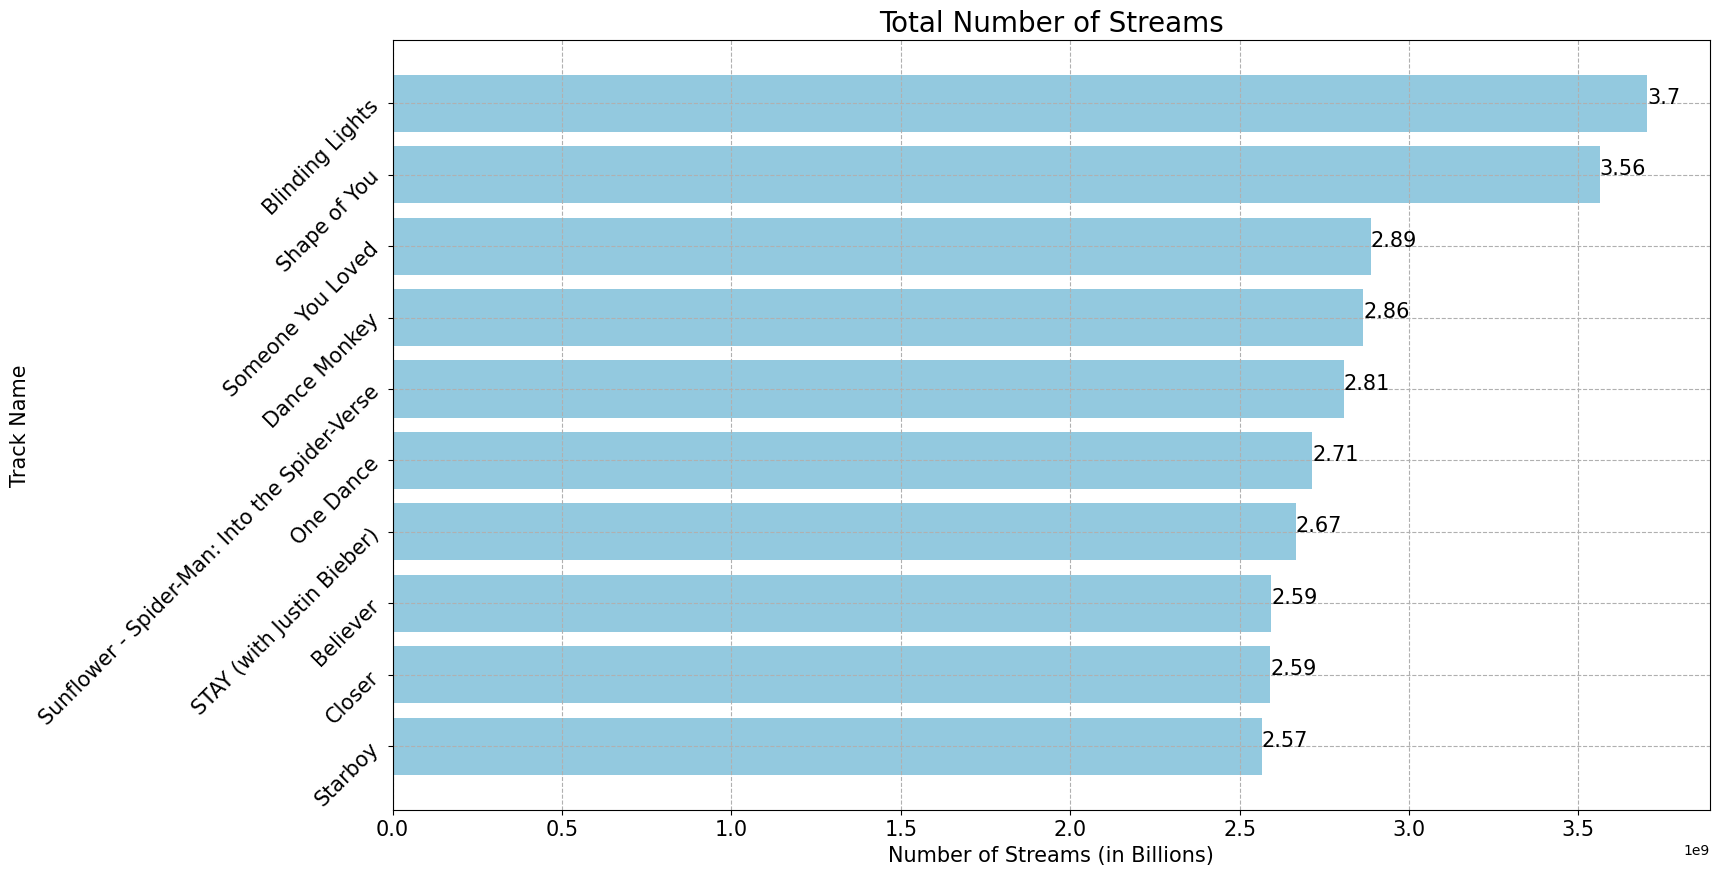

In [293]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = top_stream, 
           x = top_stream['streams'],
           y = top_stream['track_name'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

for index, count in enumerate(top_stream['streams']):
    ax1.annotate(round(count/1000000000,2), xy= (count, index), fontsize =15)

plt.grid(linestyle='--')
plt.xlabel('Number of Streams (in Billions)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Track Name', fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.title('Total Number of Streams', fontsize=20)
plt.show()


Note: This includes songs before 2023. Example of this is "Blinding Lights" (2019/20). We can make analysis more specific such as top streamed songs that were released in 2022-23 for example later on.

In [294]:
#Referring to the above comment.
music[music['track_name']== 'Blinding Lights']

track_name artist(s)_name  artist_count  released_year  \
55  Blinding Lights     The Weeknd             1           2019   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
55              11            29                 43899                 69   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
55  3703895074                 672  ...  171   C#  Major              50   

    valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
55         38       80              0                   0           9   

    speechiness_%  
55              7  

[1 rows x 24 columns]

Let's dive deeper into top songs in playlists such as Spotify, Apple, and Deezer.

### Spotify Playlist

In [295]:
top_spotify_playlist = music[['track_name', 'in_spotify_playlists']]
top_spotify_playlist.head()

track_name  in_spotify_playlists
0  Seven (feat. Latto) (Explicit Ver.)                   553
1                                 LALA                  1474
2                              vampire                  1397
3                         Cruel Summer                  7858
4                       WHERE SHE GOES                  3133

In [296]:
top_spotify_playlist = top_spotify_playlist.sort_values('in_spotify_playlists', ascending=False).reset_index(drop=True)
top_spotify_playlist = top_spotify_playlist[:10]

top_spotify_playlist.head(10)

track_name  in_spotify_playlists
0                     Get Lucky - Radio Edit                 52898
1                             Mr. Brightside                 51979
2                    Wake Me Up - Radio Edit                 50887
3  Smells Like Teen Spirit - Remastered 2021                 49991
4                                 Take On Me                 44927
5                            Blinding Lights                 43899
6                                  One Dance                 43257
7               Somebody That I Used To Know                 42798
8          Everybody Wants To Rule The World                 41751
9                        Sweet Child O' Mine                 41231

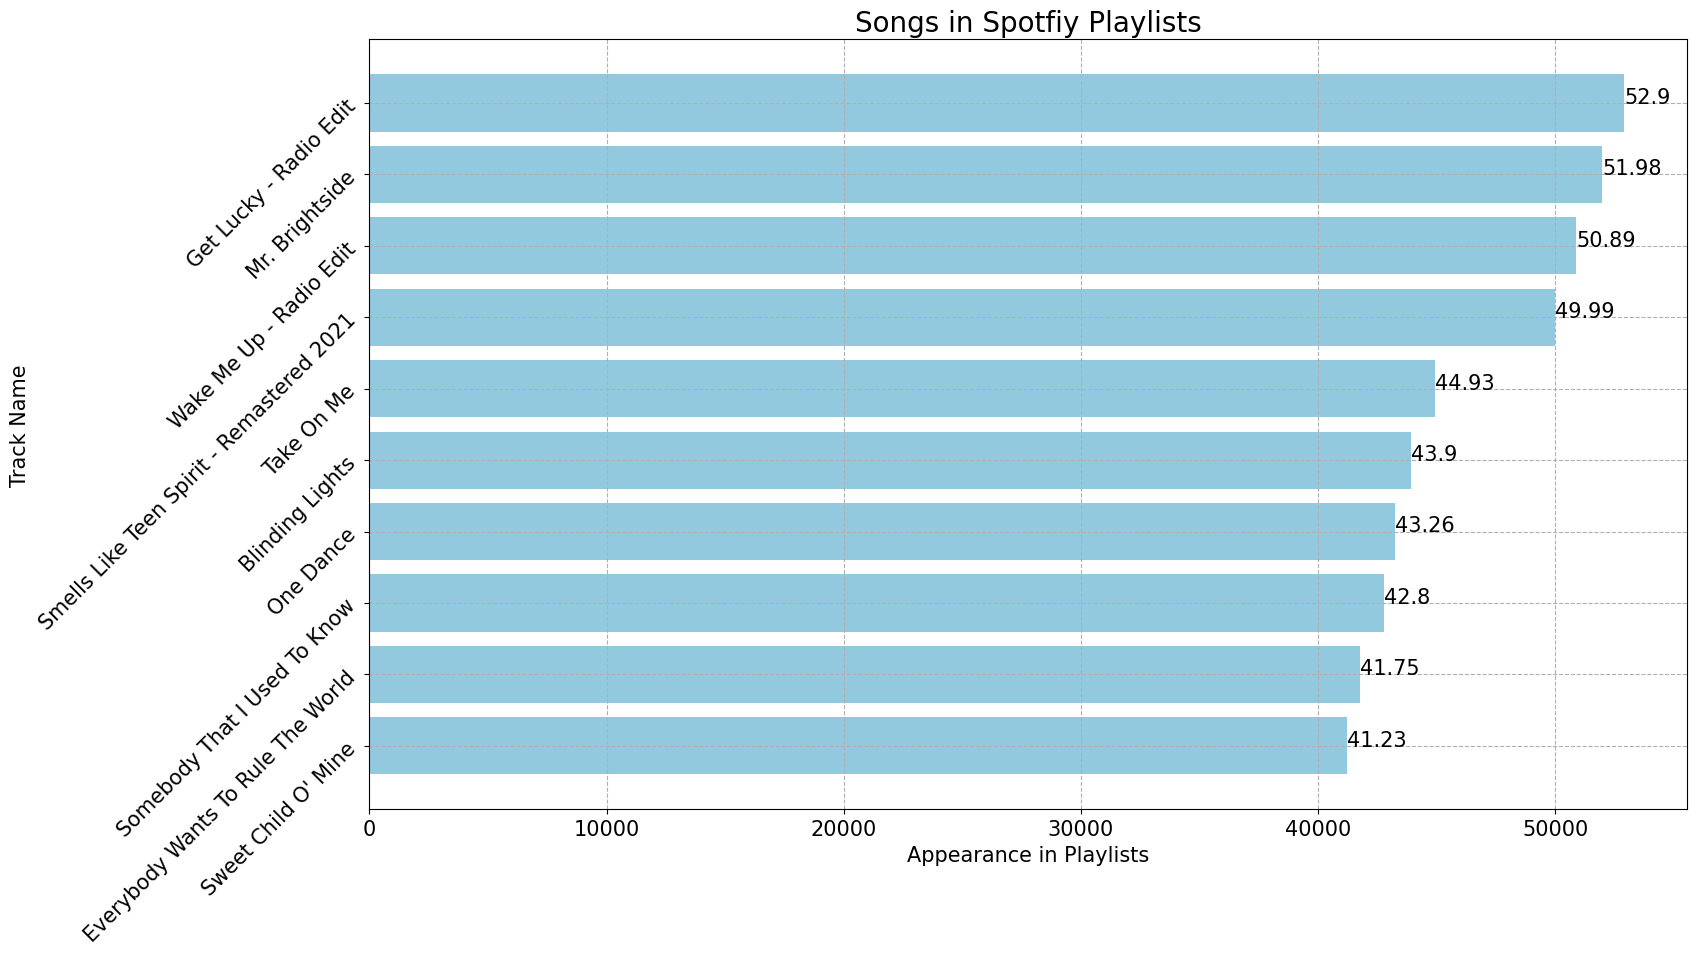

In [297]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = top_spotify_playlist, 
           x = top_spotify_playlist['in_spotify_playlists'],
           y = top_spotify_playlist['track_name'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

for index, count in enumerate(top_spotify_playlist['in_spotify_playlists']):
    ax1.annotate(round(count/1000,2), xy= (count, index), fontsize =15)

plt.grid(linestyle='--')
plt.xlabel('Appearance in Playlists', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Track Name', fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.title('Songs in Spotfiy Playlists', fontsize=20)
plt.show()


### Apple Playlist

In [298]:
top_apple_playlist = music[['track_name', 'in_apple_playlists']]
top_apple_playlist.head()

track_name  in_apple_playlists
0  Seven (feat. Latto) (Explicit Ver.)                  43
1                                 LALA                  48
2                              vampire                  94
3                         Cruel Summer                 116
4                       WHERE SHE GOES                  84

In [299]:
top_apple_playlist = top_apple_playlist.sort_values('in_apple_playlists', ascending=False).reset_index(drop=True)
top_apple_playlist = top_apple_playlist[:10]

top_apple_playlist.head(10)

track_name  in_apple_playlists
0            Blinding Lights                 672
1   One Kiss (with Dua Lipa)                 537
2               Dance Monkey                 533
3            Don't Start Now                 532
4  STAY (with Justin Bieber)                 492
5                   Señorita                 453
6          Someone You Loved                 440
7           Watermelon Sugar                 437
8                  One Dance                 433
9                  As It Was                 403

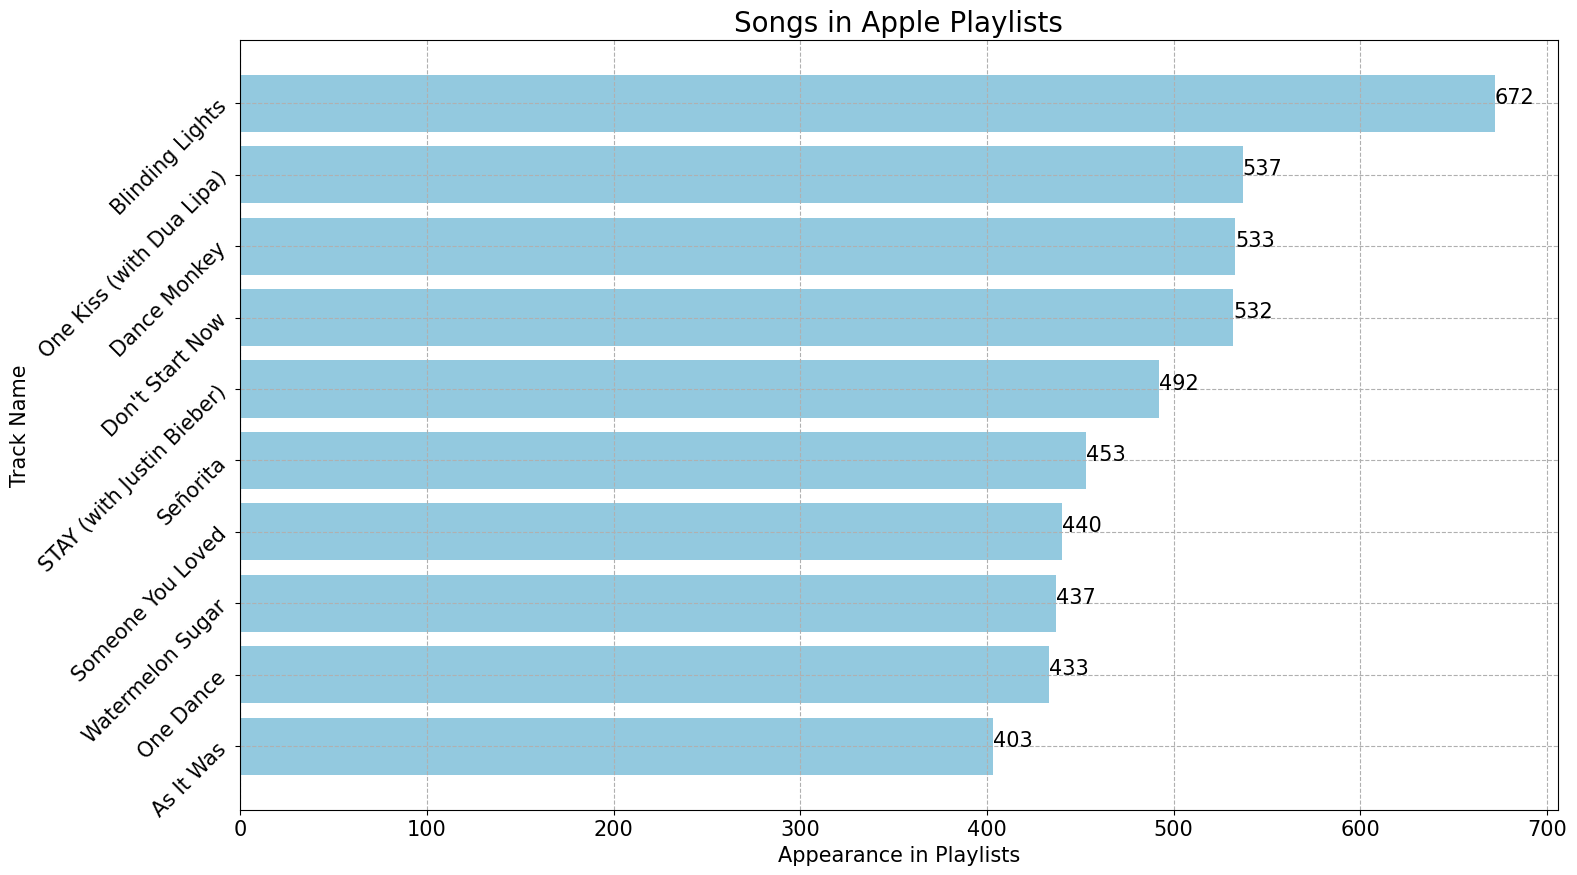

In [300]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = top_apple_playlist, 
           x = top_apple_playlist['in_apple_playlists'],
           y = top_apple_playlist['track_name'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

for index, count in enumerate(top_apple_playlist['in_apple_playlists']):
    ax1.annotate(count, xy= (count, index), fontsize =15)

plt.grid(linestyle='--')
plt.xlabel('Appearance in Playlists', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Track Name', fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.title('Songs in Apple Playlists', fontsize=20)
plt.show()


### Deezer Playlist

In [301]:
top_deezer_playlist = music[['track_name', 'in_deezer_playlists']]
top_deezer_playlist.head()

track_name  in_deezer_playlists
0  Seven (feat. Latto) (Explicit Ver.)                   45
1                                 LALA                   58
2                              vampire                   91
3                         Cruel Summer                  125
4                       WHERE SHE GOES                   87

In [302]:
top_deezer_playlist = top_deezer_playlist.sort_values('in_deezer_playlists', ascending=False).reset_index(drop=True)
top_deezer_playlist = top_deezer_playlist[:10]

top_deezer_playlist.head(10)

track_name  in_deezer_playlists
0  Smells Like Teen Spirit - Remastered 2021                12367
1                     Get Lucky - Radio Edit                 8215
2                              The Scientist                 7827
3                                       Numb                 7341
4                                 In The End                 6808
5                               Shape of You                 6808
6                                      Creep                 6807
7                        Sweet Child O' Mine                 6720
8                               Still D.R.E.                 6591
9           Can't Hold Us (feat. Ray Dalton)                 6551

In [303]:
top_deezer_playlist = top_deezer_playlist.replace('DANï¿½ï¿½A', 'Dançarina')
top_deezer_playlist

track_name  in_deezer_playlists
0  Smells Like Teen Spirit - Remastered 2021                12367
1                     Get Lucky - Radio Edit                 8215
2                              The Scientist                 7827
3                                       Numb                 7341
4                                 In The End                 6808
5                               Shape of You                 6808
6                                      Creep                 6807
7                        Sweet Child O' Mine                 6720
8                               Still D.R.E.                 6591
9           Can't Hold Us (feat. Ray Dalton)                 6551

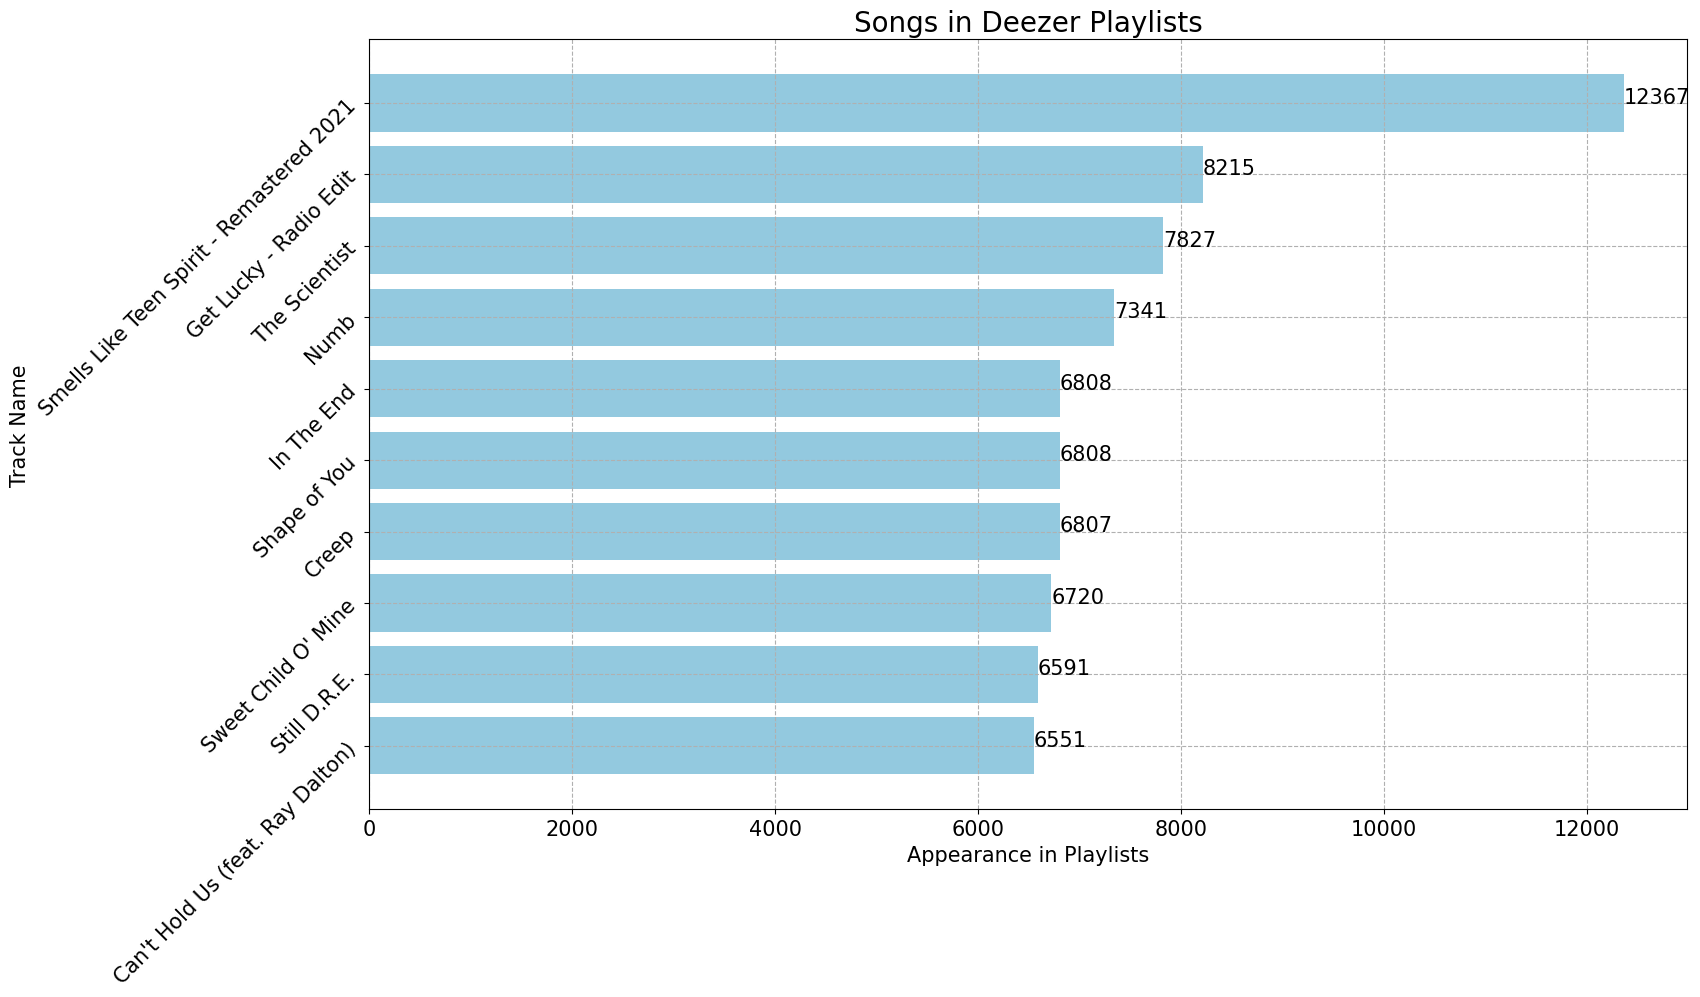

In [304]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = top_deezer_playlist, 
           x = top_deezer_playlist['in_deezer_playlists'],
           y = top_deezer_playlist['track_name'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

for index, count in enumerate(top_deezer_playlist['in_deezer_playlists']):
    ax1.annotate(count, xy= (count, index), fontsize =15)

plt.grid(linestyle='--')
plt.xlabel('Appearance in Playlists', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Track Name', fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.title('Songs in Deezer Playlists', fontsize=20)
plt.show()


Note that so far, I have analyzed the top streamed songs overall. Suppose I only want to analyze songs released in 2023 only. Let's repeat the process but this time filter the dataset to songs released in 2023.

In [305]:
music_2023 = music[music['released_year'] == 2023]
music_2023.head()

track_name     artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)   Latto, Jung Kook             2   
1                                 LALA        Myke Towers             1   
2                              vampire     Olivia Rodrigo             1   
4                       WHERE SHE GOES          Bad Bunny             1   
5                             Sprinter  Dave, Central Cee             2   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
4           2023               5            18                  3133   
5           2023               6             1                  2186   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
0                147  141381703                  43  ...  125    B  Major   
1                 48  133716286                  48  ...   92   C#  Major   
2                113  140003974                  94  ...  138    F  Major   
4                 50  303236322                  84  ...  144    A  Minor   
5                 91  183706234                  67  ...  141   C#  Major   

   danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0              80         89       83             31                   0   
1              71         61       74              7                   0   
2              51         32       53             17                   0   
4              65         23       80             14                  63   
5              92         66       58             19                   0   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
4          11              6  
5           8             24  

[5 rows x 24 columns]

In [306]:
top_2023 = music_2023[['track_name', 'streams']]
top_2023 = top_2023.sort_values('streams', ascending=False).reset_index(drop=True)
top_2023 = top_2023[:10]

top_2023

track_name     streams
0                                Flowers  1316855716
1                        Ella Baila Sola   725980112
2  Shakira: Bzrp Music Sessions, Vol. 53   721975598
3                                    TQG   618990393
4                        La Bebe - Remix   553634067
5                    Die For You - Remix   518745108
6                              un x100to   505671438
7                      Cupid - Twin Ver.   496795686
8                                    PRC   436027885
9                                    OMG   430977451

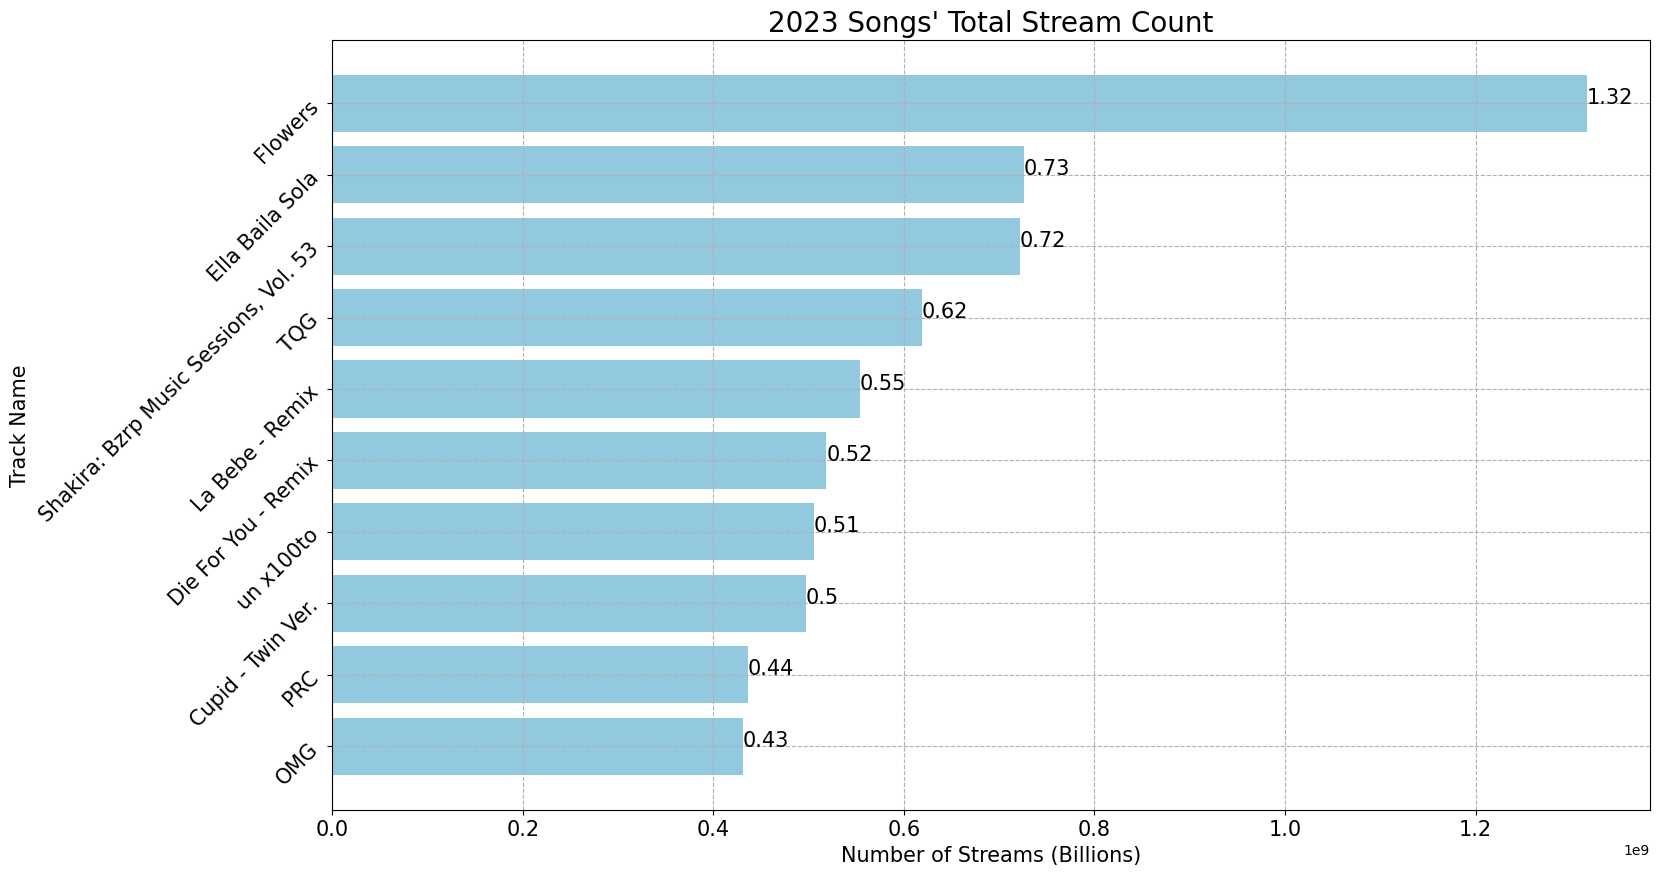

In [307]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = top_2023, 
           x = top_2023['streams'],
           y = top_2023['track_name'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

for index, count in enumerate(top_2023['streams']):
    ax1.annotate(round(count/1000000000,2), xy= (count, index), fontsize =15)

plt.grid(linestyle='--')
plt.xlabel('Number of Streams (Billions)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Track Name', fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.title('2023 Songs\' Total Stream Count', fontsize=20)
plt.show()


### **Results** 
Overall, "Blinding Lights" by The Weeknd is the most streamed songs. However, if we are only interested in most streamed songs that were released in 2023, "Flowers" by Miley Cyrus is the most streamed song.

Next, I am interested in discovering the most popular artist.

### Analyzing Popular Artist(s) 

In [308]:
music['artist(s)_name'].value_counts()

Taylor Swift          34
The Weeknd            22
SZA                   19
Bad Bunny             19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: artist(s)_name, Length: 645, dtype: int64

Filter out the collabs.

In [309]:
solo = music[music['artist_count'] == 1]
solo = solo['artist(s)_name'].value_counts().rename_axis('artist').reset_index(name='count').head(10)
solo

artist  count
0    Taylor Swift     34
1      The Weeknd     22
2             SZA     19
3       Bad Bunny     19
4    Harry Styles     17
5  Kendrick Lamar     12
6   Morgan Wallen     11
7      Ed Sheeran      9
8             BTS      8
9            Feid      8

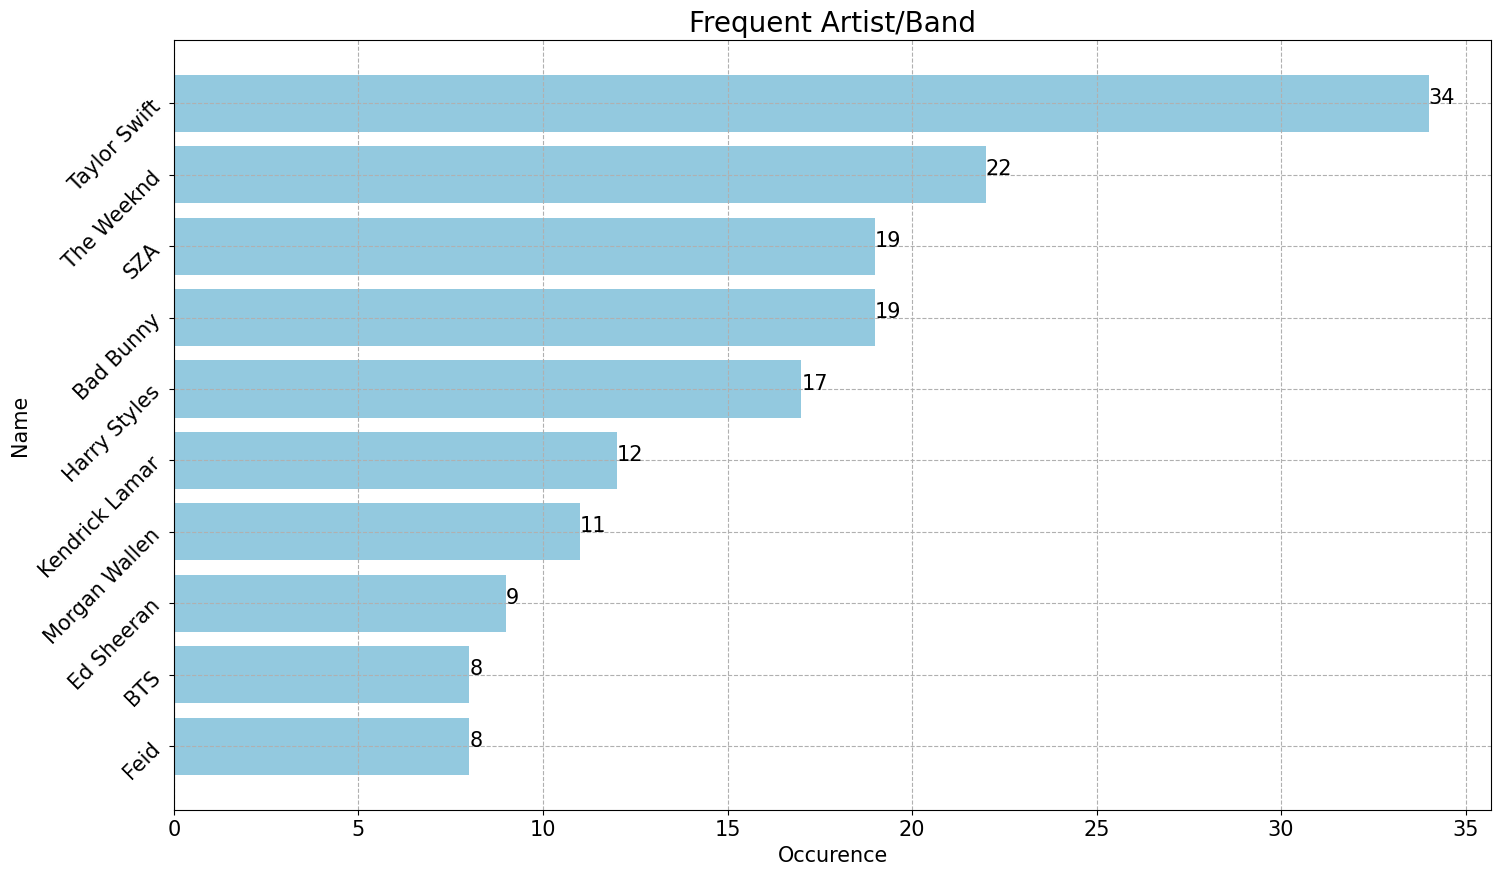

In [310]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = solo, 
           x = solo['count'],
           y = solo['artist'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

for index, count in enumerate(solo['count']):
    ax1.annotate(count, xy= (count, index), fontsize =15)

plt.grid(linestyle='--')
plt.xlabel('Occurence', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Name', fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.title('Frequent Artist/Band', fontsize=20)
plt.show()


A possible reason for Taylor Swift being the most frequent can be her having a tour starting in March 2023. This may lead to an increase to her songs being streamed. Another reason can be Taylor Swift's news of "re-recording" her musical works.

In [311]:
#Exploring the frequency of collaboration.
collab = music[music['artist_count'] > 1]
collab = collab['artist(s)_name'].value_counts().rename_axis('artist').reset_index(name='count')
collab

artist  count
0                   Drake, 21 Savage      8
1                 Tyler, The Creator      3
2              Nicki Minaj, Lil Baby      2
3    Mambo Kingz, DJ Luian, Anuel Aa      2
4           Rauw Alejandro, Bizarrap      2
..                               ...    ...
339                Nicky Youre, Dazy      1
340             Jasiel Nuñez, Peso P      1
341            Nengo Flow, Bad Bunny      1
342                        RM, Colde      1
343               Feid, Sech, Jhayco      1

[344 rows x 2 columns]

Even though data shows Taylor Swfit to be the most frequent artist in the dataset, this does not necessary mean she is the top artist (#1). I will need to group the data by artist and add up the stream count. The top artists are determined by their total stream count.

In [312]:
best = music[['artist(s)_name', 'track_name', 'streams']]
best

artist(s)_name                           track_name    streams
0      Latto, Jung Kook  Seven (feat. Latto) (Explicit Ver.)  141381703
1           Myke Towers                                 LALA  133716286
2        Olivia Rodrigo                              vampire  140003974
3          Taylor Swift                         Cruel Summer  800840817
4             Bad Bunny                       WHERE SHE GOES  303236322
..                  ...                                  ...        ...
946        Selena Gomez                         My Mind & Me   91473363
947        Taylor Swift            Bigger Than The Whole Sky  121871870
948  Feid, Paulo Londra                 A Veces (feat. Feid)   73513683
949  Feid, Sech, Jhayco                        En La De Ella  133895612
950           Burna Boy                                Alone   96007391

[951 rows x 3 columns]

In [313]:
best = best.groupby(['artist(s)_name']).sum(numeric_only=True).sort_values('streams', ascending=False).reset_index().head(10)

In [314]:
#best = music.groupby(['artist(s)_name','track_name','streams']).agg(['sum'])

In [315]:
best

artist(s)_name      streams
0       The Weeknd  14185552870
1     Taylor Swift  14053658300
2       Ed Sheeran  13908947204
3     Harry Styles  11608645649
4        Bad Bunny   9997799607
5   Olivia Rodrigo   7442148916
6           Eminem   6183805596
7       Bruno Mars   5846920599
8   Arctic Monkeys   5569806731
9  Imagine Dragons   5272484650

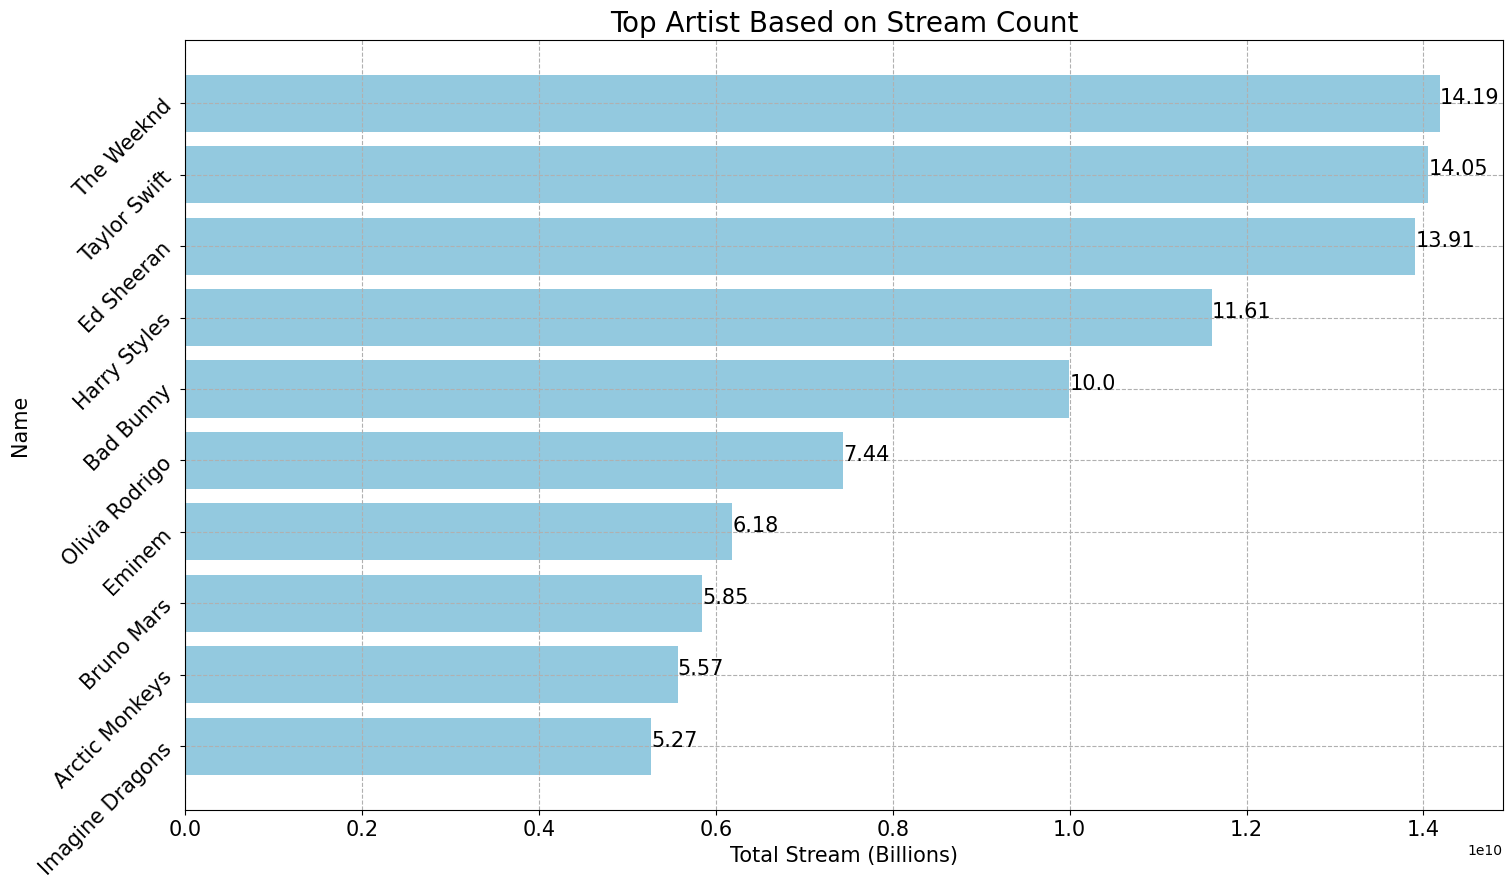

In [316]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = best, 
           x = best['streams'],
           y = best['artist(s)_name'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

for index, count in enumerate(best['streams']):
    ax1.annotate(round(count/1000000000,2), xy= (count, index), fontsize =15)

plt.grid(linestyle='--')
plt.xlabel('Total Stream (Billions)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Name', fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.title('Top Artist Based on Stream Count', fontsize=20)
plt.show()

### **Result:** 
Even though Taylor Swift is the most frequent artist in the dataset, The Weeknd is the most popular artist in terms of total streamed songs. 

Nice to know: for those who wondered which collab produced the most stream count.

In [317]:
collab2 = music[music['artist_count'] > 1]
collab2 = collab2[['artist(s)_name', 'artist_count', 'streams']].groupby(['artist(s)_name']).sum(numeric_only=True). \
                    sort_values('streams', ascending=False).reset_index().head(10)
collab2

artist(s)_name  artist_count     streams
0         Post Malone, Swae Lee             2  2808096550
1           Drake, WizKid, Kyla             3  2713922350
2  Justin Bieber, The Kid Laroi             2  2665343922
3      The Chainsmokers, Halsey             2  2591224264
4         The Weeknd, Daft Punk             2  2565529693
5  Shawn Mendes, Camila Cabello             2  2484812918
6        Bad Bunny, Jhay Cortez             4  2371592360
7         Billie Eilish, Khalid             2  2355719893
8    The Chainsmokers, Coldplay             2  2204080728
9     Lady Gaga, Bradley Cooper             2  2159346687

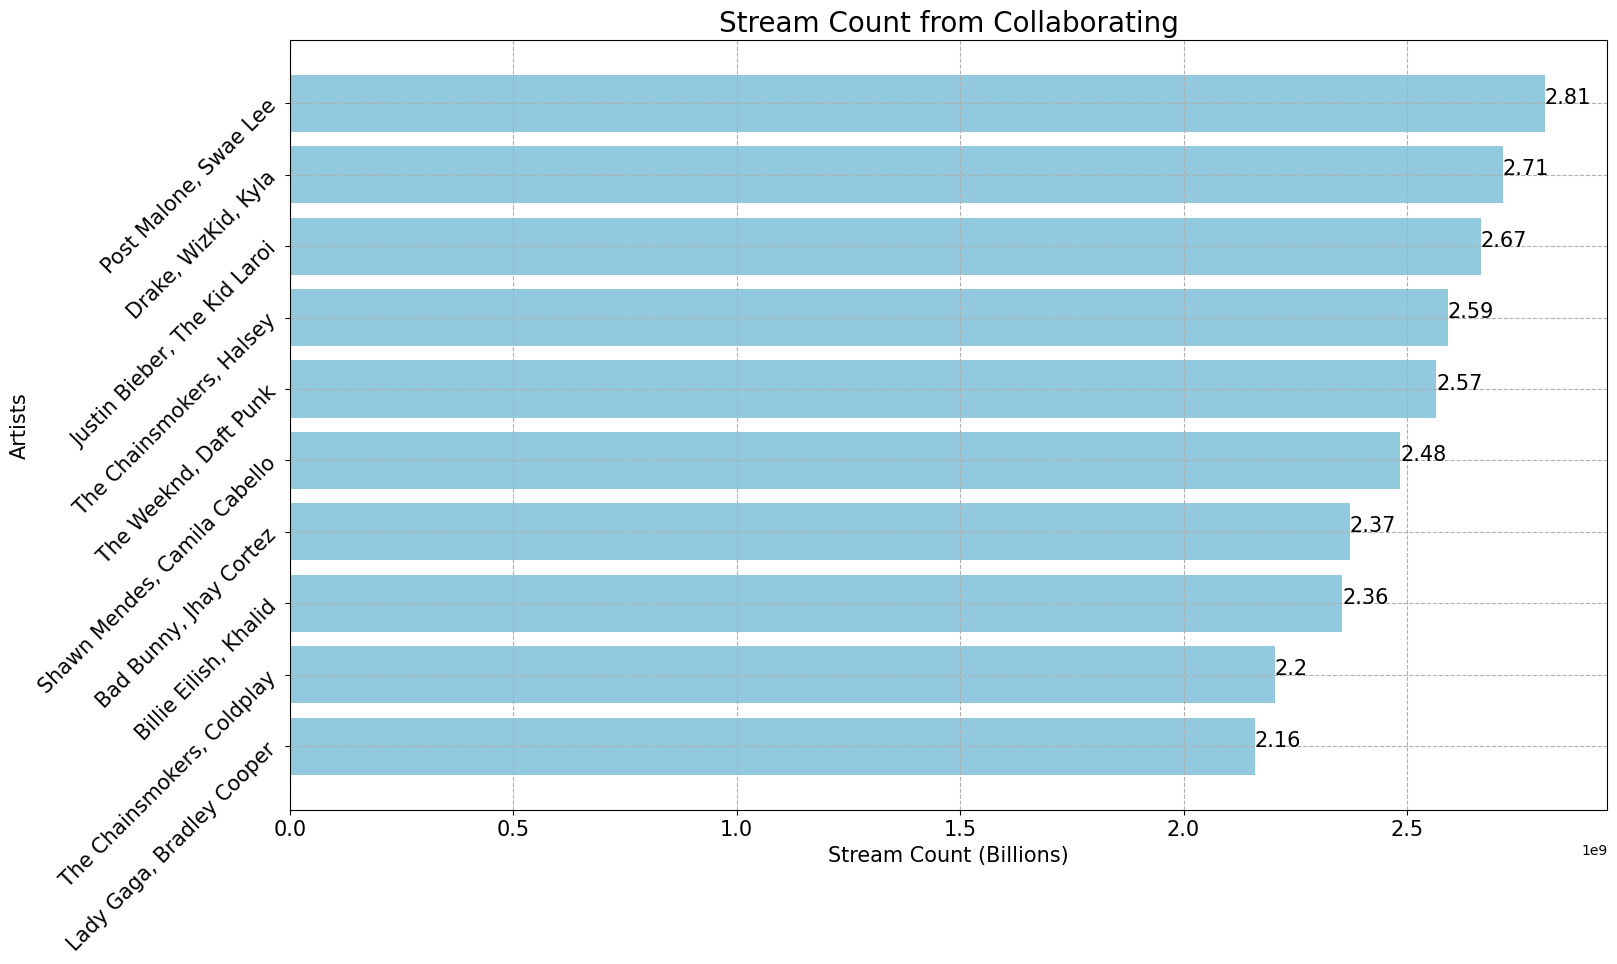

In [318]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = collab2, 
           x = collab2['streams'],
           y = collab2['artist(s)_name'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

for index, count in enumerate(collab2['streams']):
    ax1.annotate(round(count/1000000000,2), xy= (count, index), fontsize =15)

plt.grid(linestyle='--')
plt.xlabel('Stream Count (Billions)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Artists', fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.title('Stream Count from Collaborating', fontsize=20)
plt.show()

Next, I want to explore the songs' characteristics (key, bpm, etc.) to find any insightful trends.

I generated a heatmap to see any correlation before deep diving into a specific column. 

In [319]:
music.corr(numeric_only=True)

artist_count  released_year  released_month  \
artist_count              1.000000       0.090635        0.033846   
released_year             0.090635       1.000000        0.046276   
released_month            0.033846       0.046276        1.000000   
released_day             -0.021653       0.159118        0.078362   
in_spotify_playlists     -0.099410      -0.378813       -0.105217   
in_spotify_charts        -0.020148       0.078465       -0.048458   
streams                  -0.131748      -0.215301       -0.025046   
in_apple_playlists       -0.052156      -0.193521       -0.000832   
in_apple_charts          -0.090387      -0.047795       -0.020339   
in_deezer_playlists      -0.068550      -0.305110       -0.088453   
in_deezer_charts         -0.004947       0.094839       -0.005824   
in_shazam_charts         -0.014209       0.021832       -0.089517   
bpm                      -0.039913       0.000914       -0.039831   
danceability_%            0.207840       0.179137       -0.048259   
valence_%                 0.128838      -0.052751       -0.117568   
energy_%                  0.138614       0.085681       -0.083563   
acousticness_%           -0.103973      -0.109630        0.053558   
instrumentalness_%       -0.050745      -0.014131        0.033798   
liveness_%                0.045159      -0.006640       -0.012828   
speechiness_%             0.117405       0.106969        0.038915   

                      released_day  in_spotify_playlists  in_spotify_charts  \
artist_count             -0.021653             -0.099410          -0.020148   
released_year             0.159118             -0.378813           0.078465   
released_month            0.078362             -0.105217          -0.048458   
released_day              1.000000             -0.080153           0.021061   
in_spotify_playlists     -0.080153              1.000000           0.164020   
in_spotify_charts         0.021061              0.164020           1.000000   
streams                   0.010554              0.790075           0.246072   
in_apple_playlists        0.025659              0.708236           0.232742   
in_apple_charts           0.009716              0.270939           0.551814   
in_deezer_playlists      -0.085050              0.826368           0.088036   
in_deezer_charts          0.072779              0.144083           0.600007   
in_shazam_charts          0.018119              0.057908           0.569631   
bpm                      -0.030818             -0.019927           0.034184   
danceability_%            0.047506             -0.106524           0.030127   
valence_%                 0.044244             -0.021259           0.036697   
energy_%                  0.050961              0.034132           0.082466   
acousticness_%           -0.006860             -0.064953          -0.055887   
instrumentalness_%        0.019045             -0.028268          -0.010373   
liveness_%                0.001298             -0.046320          -0.047038   
speechiness_%            -0.016874             -0.090105          -0.082454   

                       streams  in_apple_playlists  in_apple_charts  \
artist_count         -0.131748           -0.052156        -0.090387   
released_year        -0.215301           -0.193521        -0.047795   
released_month       -0.025046           -0.000832        -0.020339   
released_day          0.010554            0.025659         0.009716   
in_spotify_playlists  0.790075            0.708236         0.270939   
in_spotify_charts     0.246072            0.232742         0.551814   
streams               1.000000            0.772675         0.320835   
in_apple_playlists    0.772675            1.000000         0.413700   
in_apple_charts       0.320835            0.413700         1.000000   
in_deezer_playlists   0.598330            0.471949         0.173091   
in_deezer_charts      0.228810            0.368654         0.383217   
in_shazam_charts     -0.005341            0.100651         0

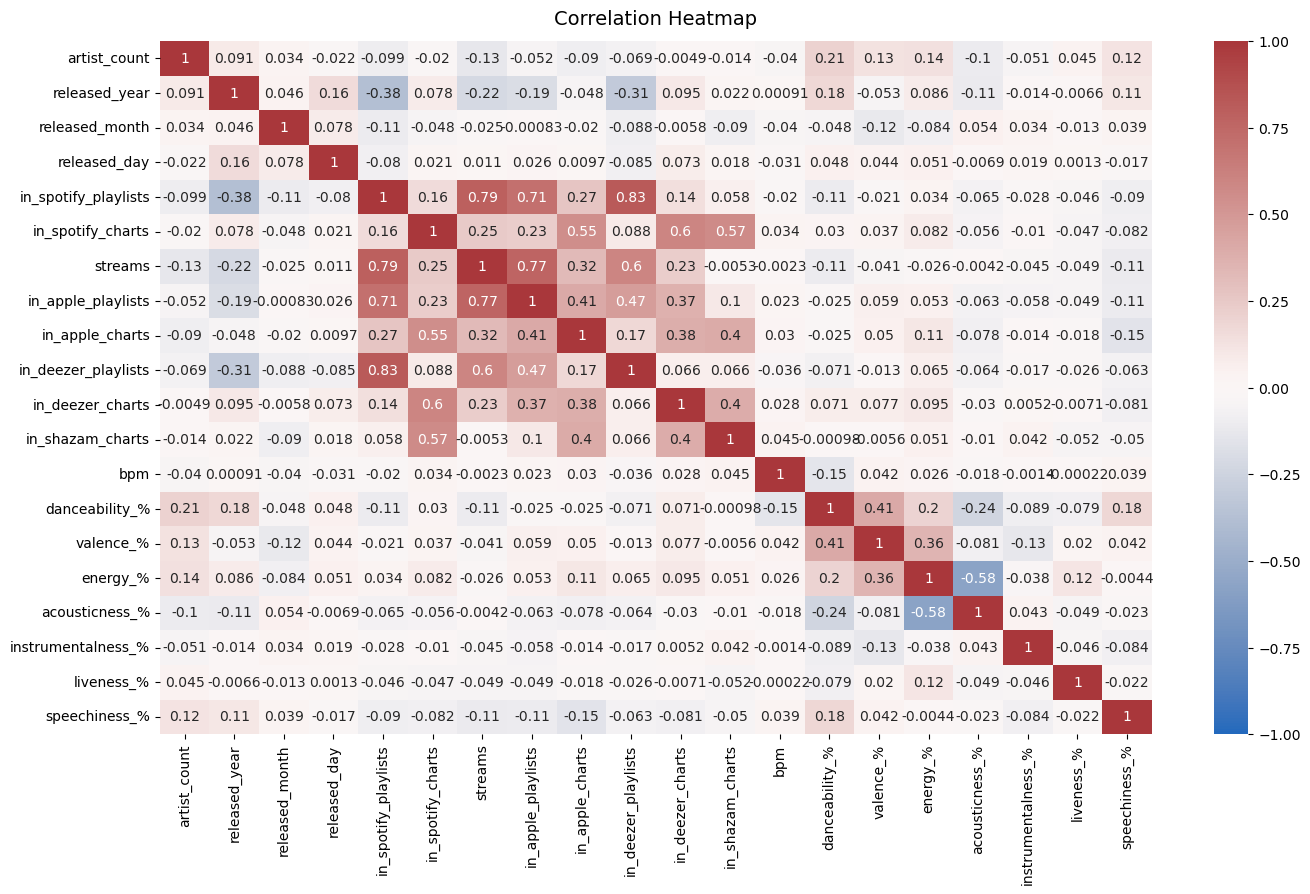

In [320]:
#Easier visual of the correlation.
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(music.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Key

In [321]:
music['key'].value_counts()

C#         120
G           96
Unknown     95
G#          91
F           89
B           81
D           81
A           74
F#          73
E           62
A#          56
D#          33
Name: key, dtype: int64

In [322]:
key = music['key']
key

0       B
1      C#
2       F
3       A
4       A
       ..
946     A
947    F#
948    C#
949    C#
950     E
Name: key, Length: 951, dtype: object

In [323]:
key_count = key.value_counts().rename_axis('key').reset_index(name='total')
key_count

key  total
0        C#    120
1         G     96
2   Unknown     95
3        G#     91
4         F     89
5         B     81
6         D     81
7         A     74
8        F#     73
9         E     62
10       A#     56
11       D#     33

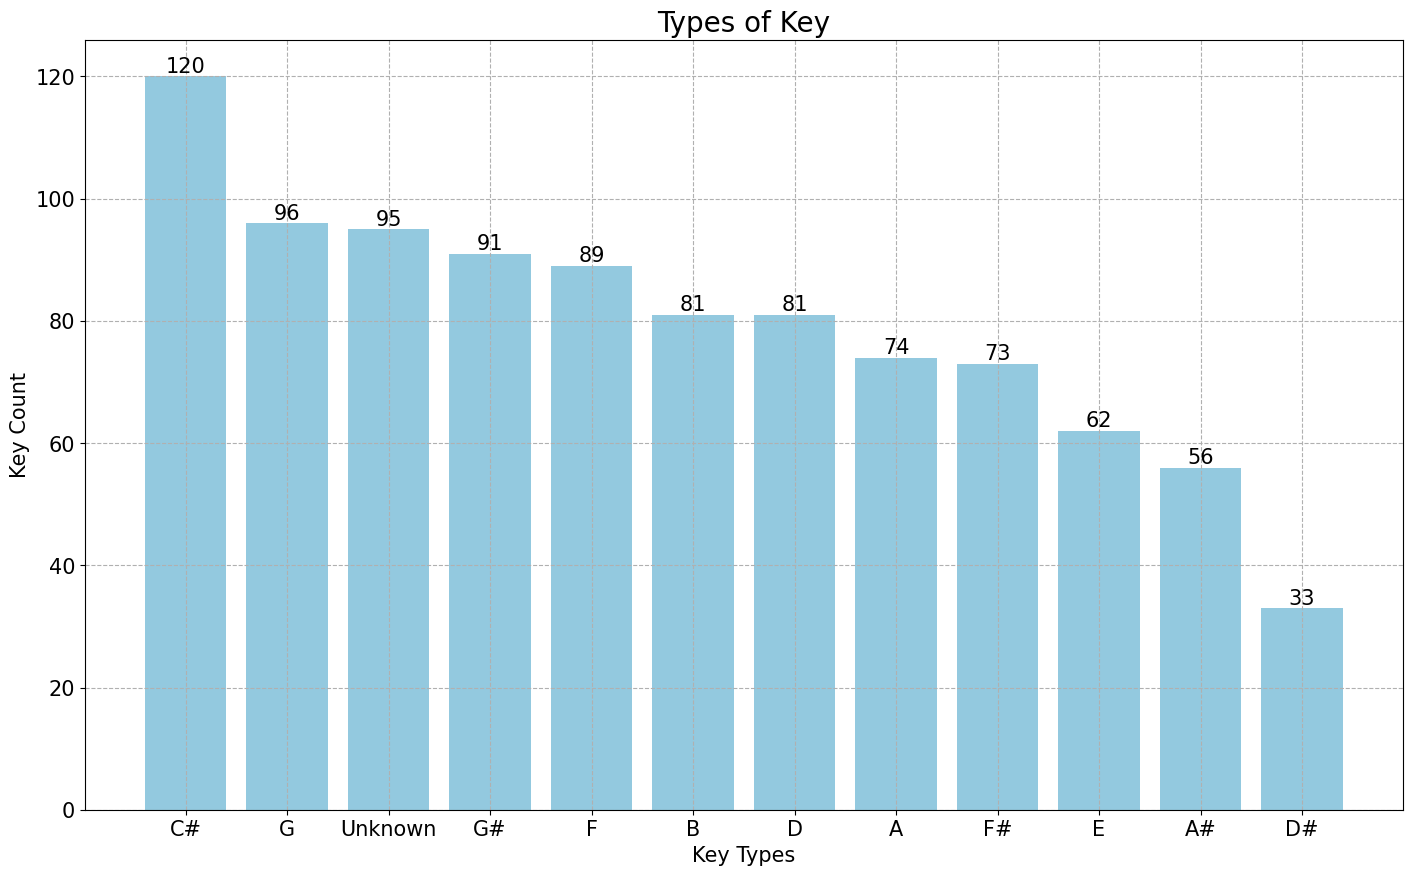

In [324]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = key_count, 
           x = key_count['key'],
           y = key_count['total'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

plt.bar_label(ax1.containers[0], label_type='edge', fontsize = 15)

plt.grid(linestyle='--')
plt.xlabel('Key Types', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Key Count', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Types of Key', fontsize=20)
plt.show()

In [325]:
#Analyze key by stream.
key_count = music[['key','streams']]
key_count = key_count.groupby(['key']).sum(numeric_only=True).sort_values('streams', ascending=False).reset_index()
key_count['stream_ten_bill'] = round(key_count['streams']/10000000000,3)
key_count

key      streams  stream_ten_bill
0        C#  72513629843            7.251
1   Unknown  49513287260            4.951
2         G  43449542493            4.345
3        G#  43398979639            4.340
4         D  42891570295            4.289
5         B  42067184540            4.207
6         F  41691728620            4.169
7        F#  38132510024            3.813
8         E  35804825731            3.580
9        A#  30767205341            3.077
10        A  30254264458            3.025
11       D#  18250205825            1.825

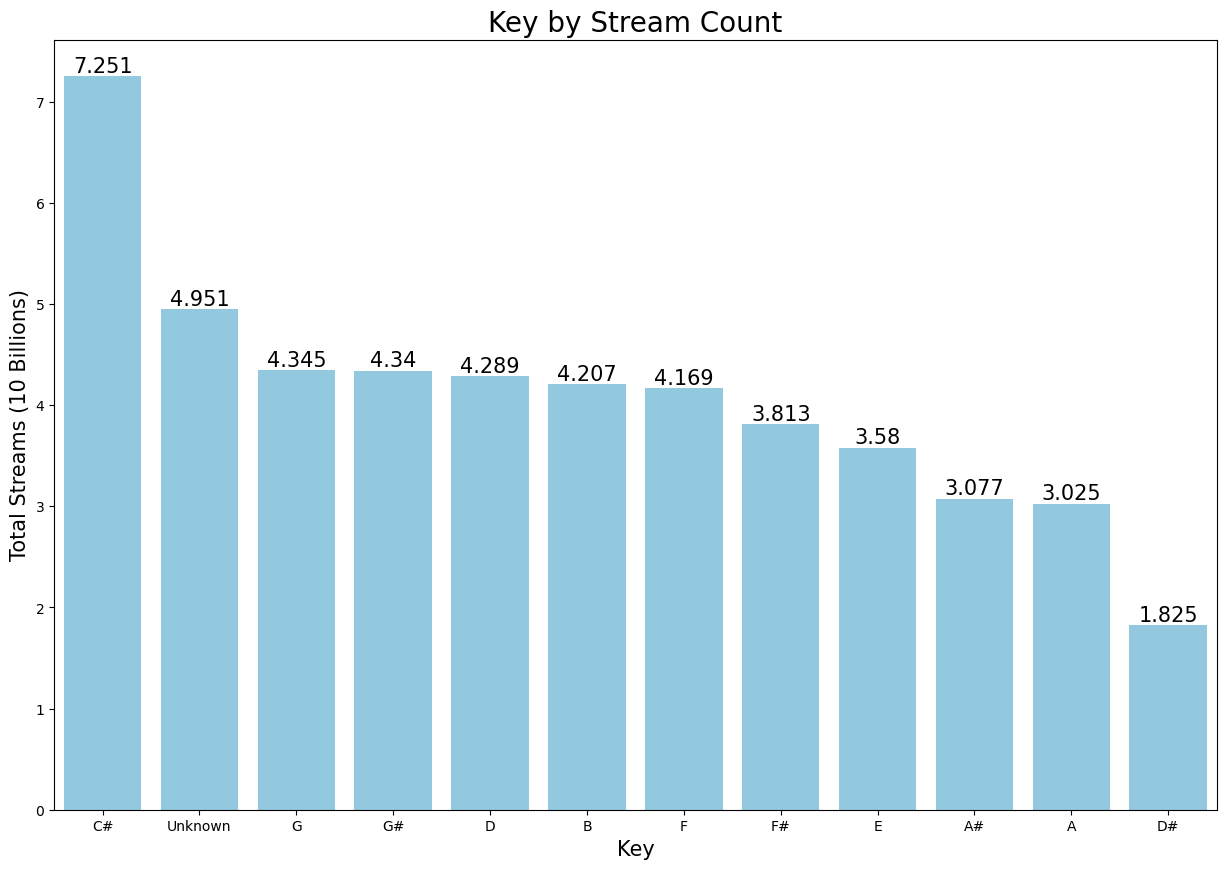

In [326]:
#Visualize the finding.
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(111)

sns.barplot(data=key_count,x= 'key', y='stream_ten_bill', palette= sns.color_palette(['skyblue']))

plt.xlabel('Key', fontsize=15)
plt.ylabel('Total Streams (10 Billions)', fontsize=15)

plt.bar_label(ax1.containers[0], label_type='edge', fontsize = 15)

plt.title('Key by Stream Count', fontsize=20)
plt.show()

In [327]:
key_2023 = music[(music['released_year'] == 2023)]['key']
key_2023 = key_2023.value_counts().rename_axis('key').reset_index(name='total')
key_2023

key  total
0         B     23
1         F     19
2         A     19
3         G     19
4        F#     18
5        C#     17
6   Unknown     16
7         D     14
8        G#     11
9         E      9
10       A#      7
11       D#      4

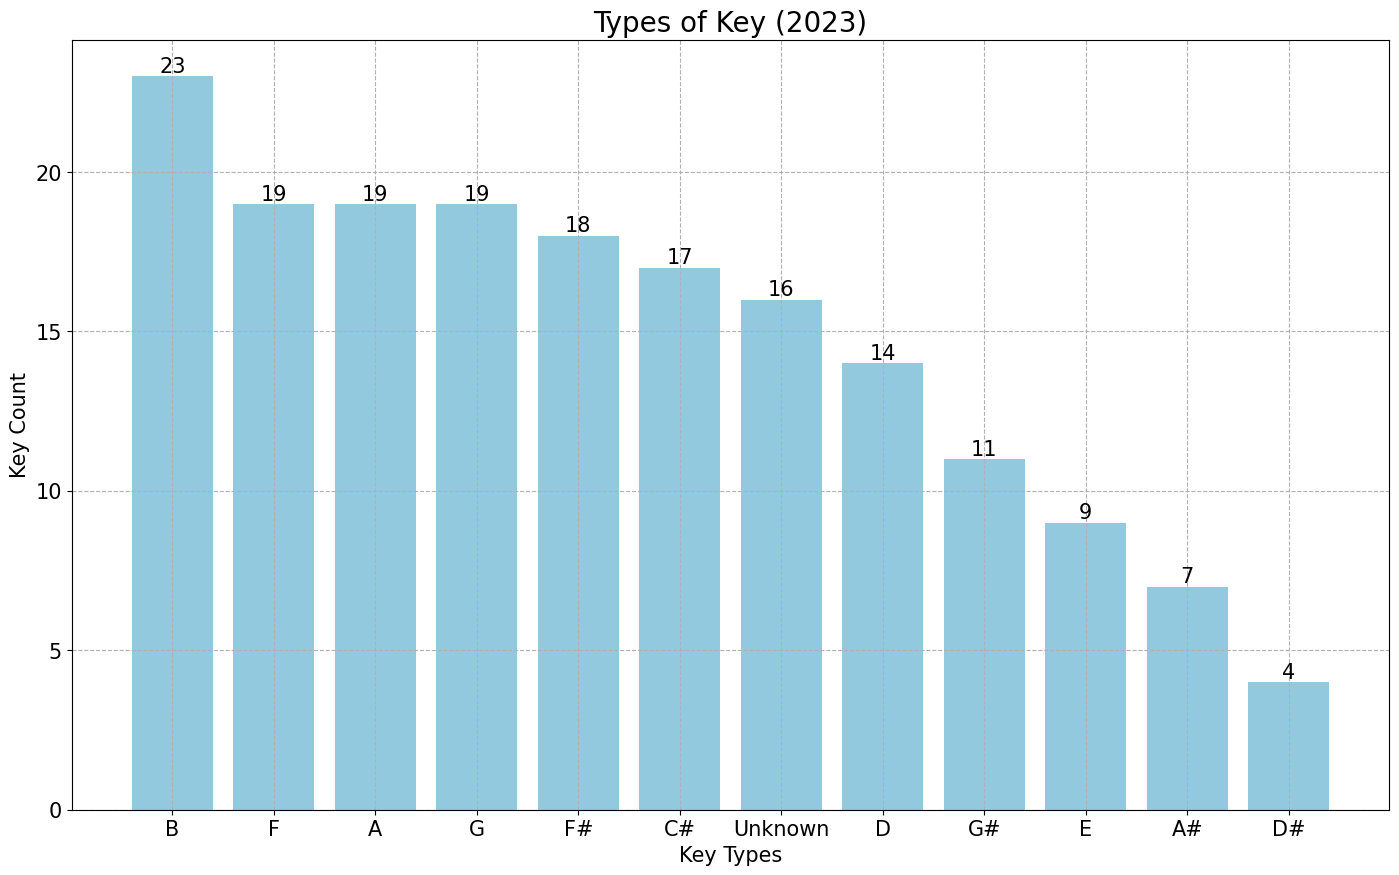

In [328]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = key_2023, 
           x = key_2023['key'],
           y = key_2023['total'],
           palette= sns.color_palette(['skyblue']))
plt.plot()

plt.bar_label(ax1.containers[0], label_type='edge', fontsize = 15)

plt.grid(linestyle='--')
plt.xlabel('Key Types', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Key Count', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Types of Key (2023)', fontsize=20)
plt.show()

In [329]:
#Analyze key by stream (2023 only).
key_count2023 = music[music['released_year']==2023][['key','streams']]
key_count2023 = key_count2023.groupby(['key']).sum(numeric_only=True).sort_values('streams', ascending=False).reset_index()
key_count2023['stream_bill'] = round(key_count2023['streams']/1000000000,2)
key_count2023

key     streams  stream_bill
0         D  3236730353         3.24
1         A  2939387179         2.94
2   Unknown  2923234189         2.92
3         F  2920854637         2.92
4         G  2824388262         2.82
5         B  2781672870         2.78
6        F#  2445856595         2.45
7        C#  2149679197         2.15
8         E  1306773919         1.31
9        G#  1073463826         1.07
10       A#   756960053         0.76
11       D#   553245542         0.55

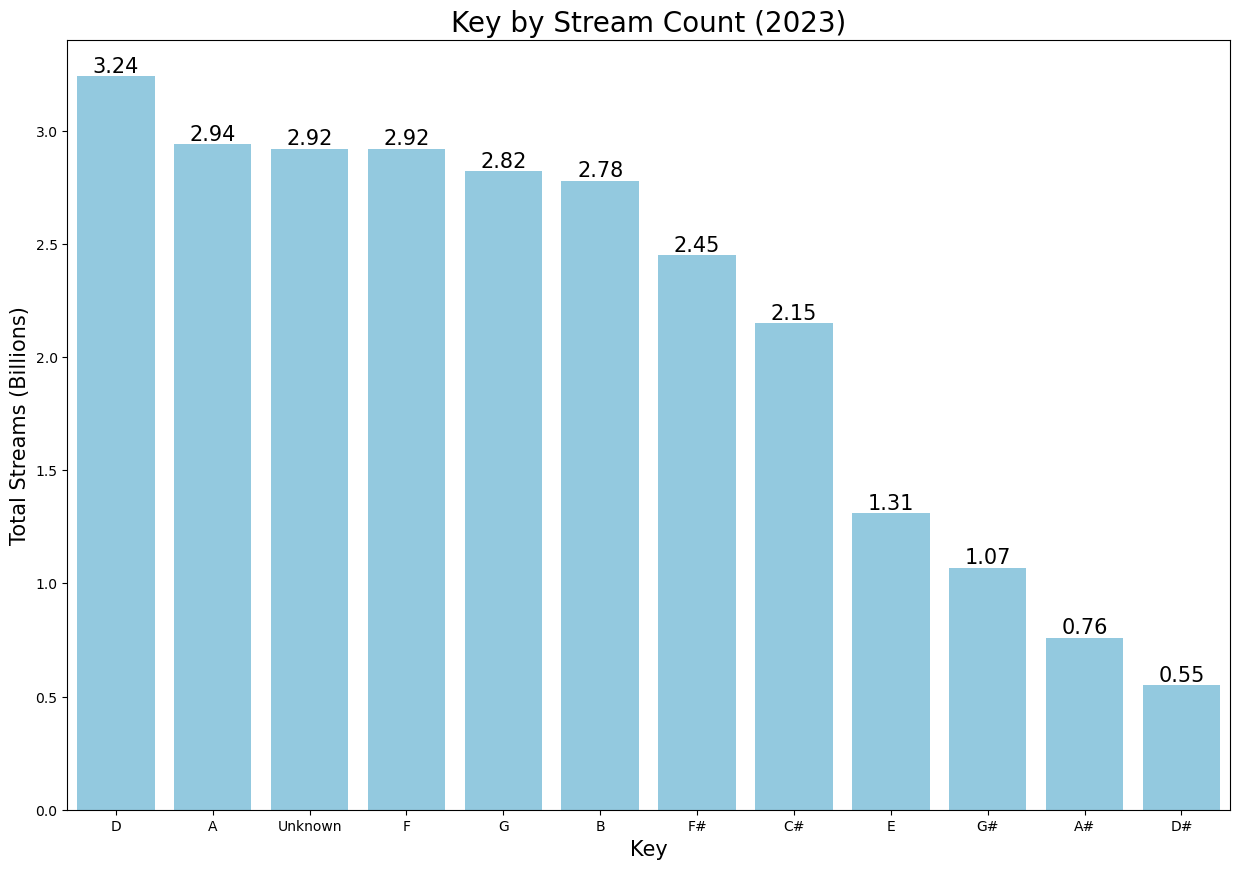

In [330]:
#Visualize the finding.
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(111)

sns.barplot(data=key_count2023,x= 'key', y='stream_bill', palette= sns.color_palette(['skyblue']))

plt.xlabel('Key', fontsize=15)
plt.ylabel('Total Streams (Billions)', fontsize=15)

plt.bar_label(ax1.containers[0], label_type='edge', fontsize = 15)

plt.title('Key by Stream Count (2023)', fontsize=20)
plt.show()

In [331]:
#Get a visual of the key based songs by stream from year to year.
key_history = music.groupby(['released_year','key']).sum(numeric_only=True).reset_index()
key_history = key_history.loc[key_history.released_year.isin([2019,2020,2021,2022,2023])]
key_history

released_year      key  artist_count  released_month  released_day  \
136           2019        A             6              37            71   
137           2019        B             7              53            87   
138           2019       C#             1              11            29   
139           2019        D             5              14            65   
140           2019       D#             3              19             5   
141           2019        E             5              40            41   
142           2019        F             4              22            46   
143           2019       F#             3              11            38   
144           2019        G             3              17            35   
145           2019       G#             6              35            50   
146           2019  Unknown             3              25            68   
147           2020        A             2              12            18   
148           2020        B             2              15            31   
149           2020       C#             5              22            87   
150           2020        D             6              24            59   
151           2020       D#             3              23            20   
152           2020        E             4              15            57   
153           2020        F             7              30           114   
154           2020       F#             5              19            95   
155           2020        G             2               7            24   
156           2020       G#             2              10            19   
157           2020  Unknown             9              46           172   
158           2021        A            12              74           107   
159           2021       A#             9              59            88   
160           2021        B            17              78            95   
161           2021       C#            33             161           287   
162           2021        D            21             113           218   
163           2021       D#             6              26            78   
164           2021        E            10              50            75   
165           2021        F            11              50            90   
166           2021       F#            23              94           211   
167           2021        G            21              86           147   
168           2021       G#            19              77           179   
169           2021  Unknown            25             109           241   
170           2022        A            48             157           283   
171           2022       A#            41             172           440   
172           2022        B            50             179           443   
173           2022       C#            96             319           595   
174           2022        D            41             199           387   
175           2022       D#            24              82           229   
176           2022        E            42             174           402   
177           2022        F            65             272           530   
178           2022       F#            33             171           339   
179           2022        G            72             321           643   
180           2022       G#            68             293           589   
181           2022  Unknown            59             238           621   
182           2023        A            34              76           232   
183           2023       A#            16              27            58   
184           2023        B            47             102           318   
185           2023       C#            29              73           243   
186           2023        D            19              40           232   
187           2023       D#             8              15            59   
188           2023        E   

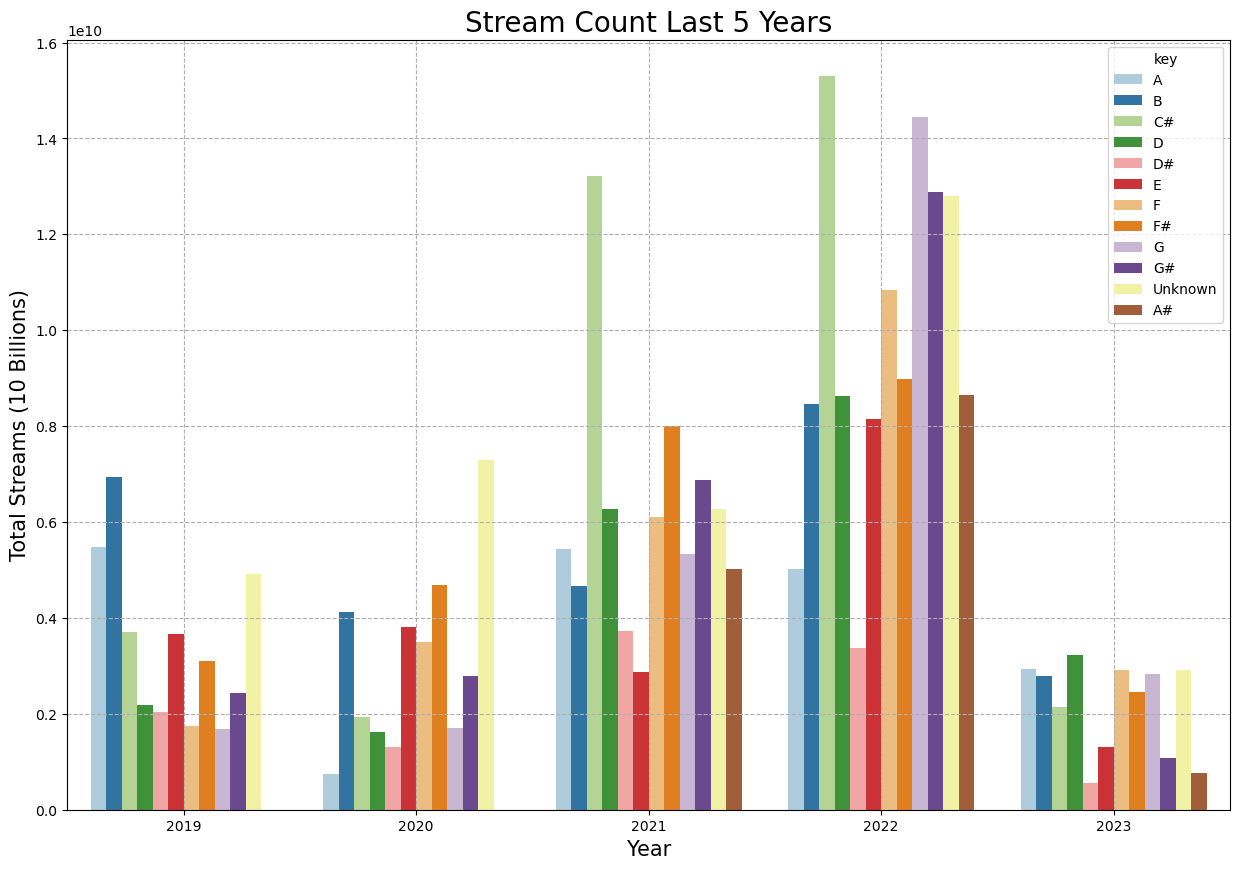

In [332]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(111)

sns.barplot(data=key_history, x='released_year', y='streams', palette = sns.color_palette("Paired"), hue='key')

plt.grid(linestyle='--')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Total Streams (10 Billions)', fontsize=15)

plt.title('Stream Count Last 5 Years', fontsize=20)

plt.show()

### **Findings:**
Overall, C# based songs have more streams. If we take a look at the last 5 years (2019-23), at least one key (B, C#,F#,F or G#) has made three appearances within the top 5 each year. Please note that each year contains songs that were made during that year.

Next, I want to analyze the mode (Major and Minor) to see which one is more popular than the other.

### Mode

In [333]:
#58% major, 42% minor
music['mode'].value_counts()

Major    549
Minor    402
Name: mode, dtype: int64

In [334]:
#Saving the class balance result as a dataframe.
mode = music['mode'].value_counts().rename_axis('class').reset_index(name='count')
mode

class  count
0  Major    549
1  Minor    402

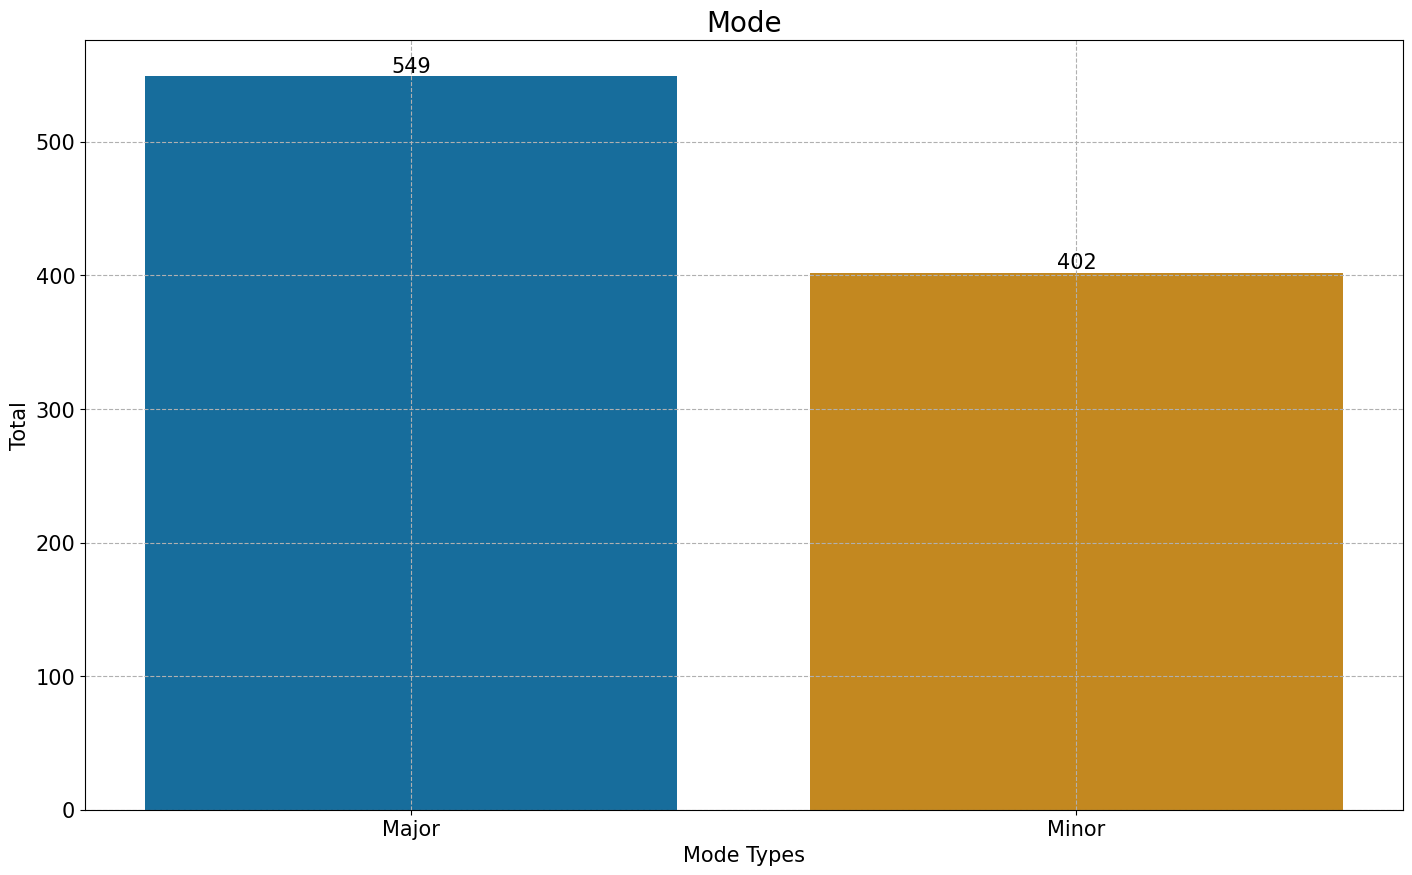

In [335]:
#Visualize the finding (class balance).
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = mode, 
           x = mode['class'],
           y = mode['count'],
           palette= 'colorblind')
plt.plot()

plt.bar_label(ax1.containers[0], label_type='edge', fontsize = 15)

plt.grid(linestyle='--')
plt.xlabel('Mode Types', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Mode', fontsize=20)
plt.show()

In [336]:
mode_2023 = music[(music['released_year'] == 2023)]['mode']
mode_2023 = mode_2023.value_counts().rename_axis('mode').reset_index(name='count')
mode_2023

mode  count
0  Major     90
1  Minor     86

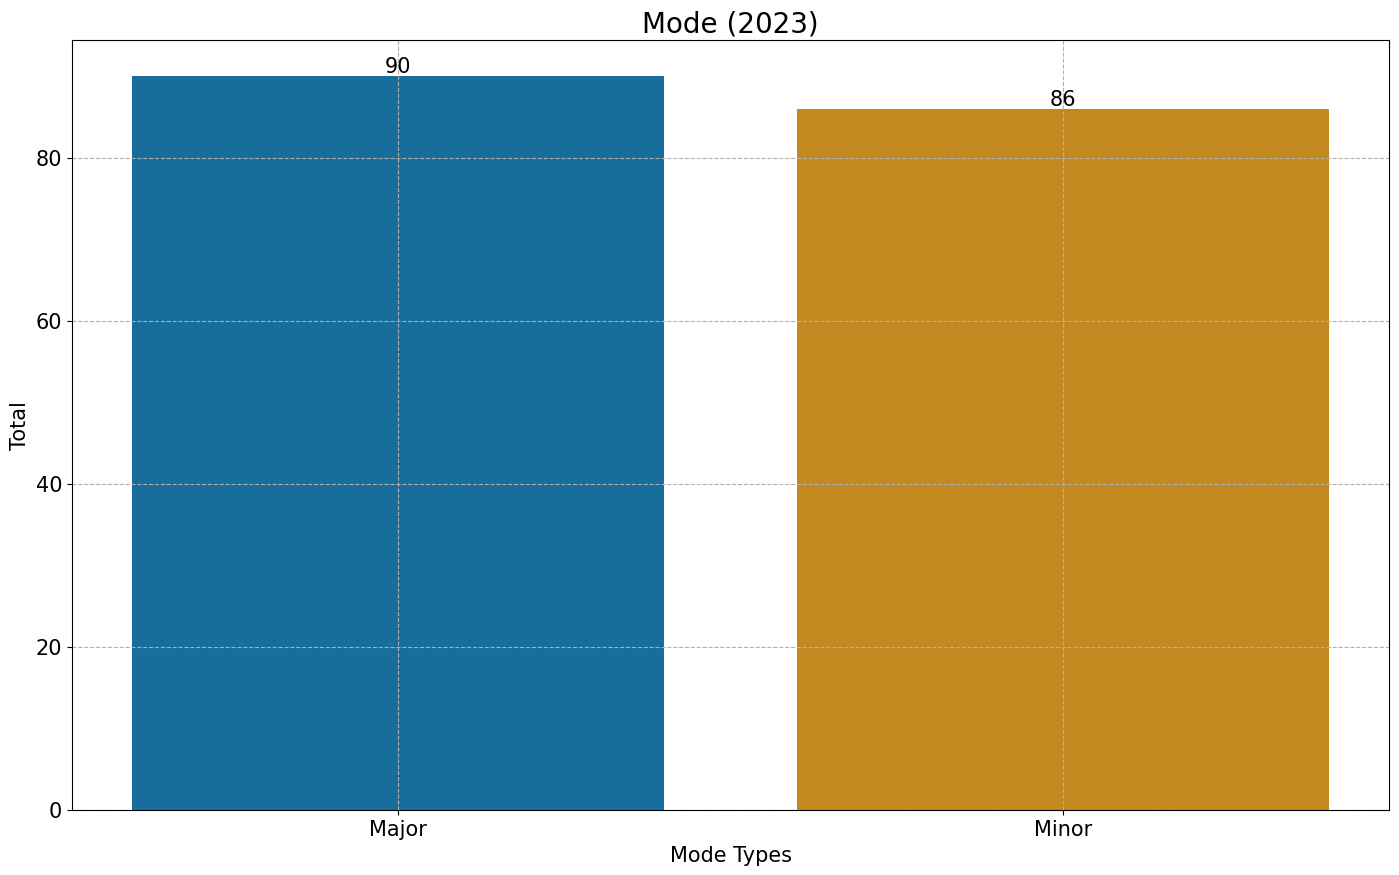

In [337]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)
sns.barplot(data = mode_2023, 
           x = mode_2023['mode'],
           y = mode_2023['count'],
           palette= 'colorblind')
plt.plot()

plt.bar_label(ax1.containers[0], label_type='edge', fontsize = 15)

plt.grid(linestyle='--')
plt.xlabel('Mode Types', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Mode (2023)', fontsize=20)
plt.show()

In [338]:
#Get a visual of the mode category by stream count in the last 5 years.
mode_history = music.groupby(['released_year','mode']).sum(numeric_only=True).reset_index()
mode_history = mode_history.loc[mode_history.released_year.isin([2019,2020,2021,2022,2023])]
mode_history

released_year   mode  artist_count  released_month  released_day  \
63           2019  Major            27             184           329   
64           2019  Minor            19             100           206   
65           2020  Major            21              96           352   
66           2020  Minor            26             127           344   
67           2021  Major           105             545           985   
68           2021  Minor           102             432           831   
69           2022  Major           351            1528          3271   
70           2022  Minor           288            1049          2230   
71           2023  Major           155             355          1349   
72           2023  Minor           156             341          1282   

    in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
63                186515                334  22661825695                3274   
64                123304                 31  15209106886                2305   
65                108219                171  15069982650                1720   
66                147042                167  18452852890                2603   
67                335796                360  46959914259                6568   
68                214196                312  26848188780                4075   
69                512655               1653  68519918252                9620   
70                390575               1576  49010262579                6784   
71                101832               2163  11897989676                3219   
72                 97194               2055  14014256946                2441   

    in_apple_charts  ...  in_deezer_charts  in_shazam_charts    bpm  \
63             2037  ...                61            1320.0   2593   
64              892  ...                26              53.0   1668   
65              807  ...                33             444.0   1756   
66             1306  ...                38             681.0   2445   
67             3104  ...               172             815.0   8777   
68             2396  ...               133             476.0   6197   
69             8340  ...               626            6035.0  28338   
70             6845  ...               395            4282.0  20670   
71             5862  ...               373           16719.0  11030   
72             6341  ...               382           10045.0  10825   

    danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
63            1208        743      1266             716                  46   
64             978        712       879             574                 115   
65            1103        809      1050             462                   0   
66            1311        996      1333             374                   4   
67            4600       3498      4335            1714                   1   
68            3514       2752      3268            1297                  95   
69           15605      11724     14594            6653                 314   
70           11938       8890     10879            4337                 221   
71            6215       4725      6090            2337                  62   
72            6113       4989      5922            2124                 149   

    liveness_%  speechiness_%  
63         329            173  
64         263            139  
65         223            144  
66         472            170  
67        1203            700  
68         803            669  
69        4211           2450  
70        3204           2220  
71        1872            838  
72        1592            793  

[10 rows x 21 columns]

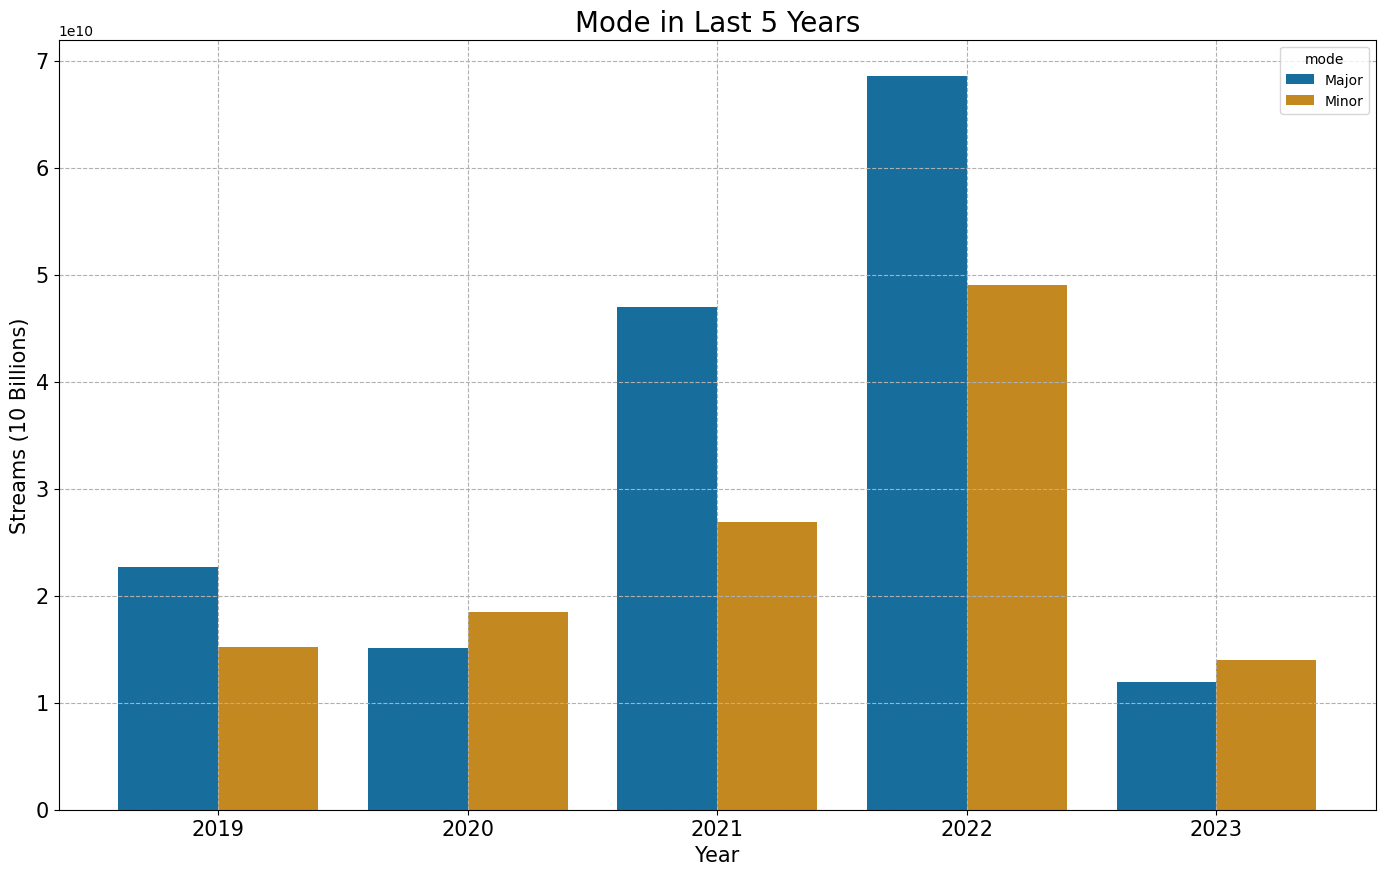

In [339]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)

sns.barplot(data = mode_history, 
           x = mode_history['released_year'],
           y = mode_history['streams'],
           hue= 'mode',
           palette= 'colorblind')
plt.plot()

#plt.bar_label(ax1.containers[0], label_type='edge', fontsize = 15)

plt.grid(linestyle='--')
plt.xlabel('Year', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Streams (10 Billions)', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Mode in Last 5 Years', fontsize=20)

plt.show()

Note: For 2023, the stream count is not finalized as the data set has no data for the months of September and onwards. If I were to make a prediction, I expect major based songs to have more stream count than minor by the end of December 2023.

In [340]:
#Group by year then mode with a counter of each mode. 
mode_history_count = music.groupby(['released_year','mode']).size().reset_index(name='total')
mode_history_count = mode_history_count.loc[mode_history_count.released_year.isin([2019,2020,2021,2022,2023])]
mode_history_count

released_year   mode  total
63           2019  Major     21
64           2019  Minor     15
65           2020  Major     16
66           2020  Minor     20
67           2021  Major     70
68           2021  Minor     49
69           2022  Major    231
70           2022  Minor    170
71           2023  Major     90
72           2023  Minor     86

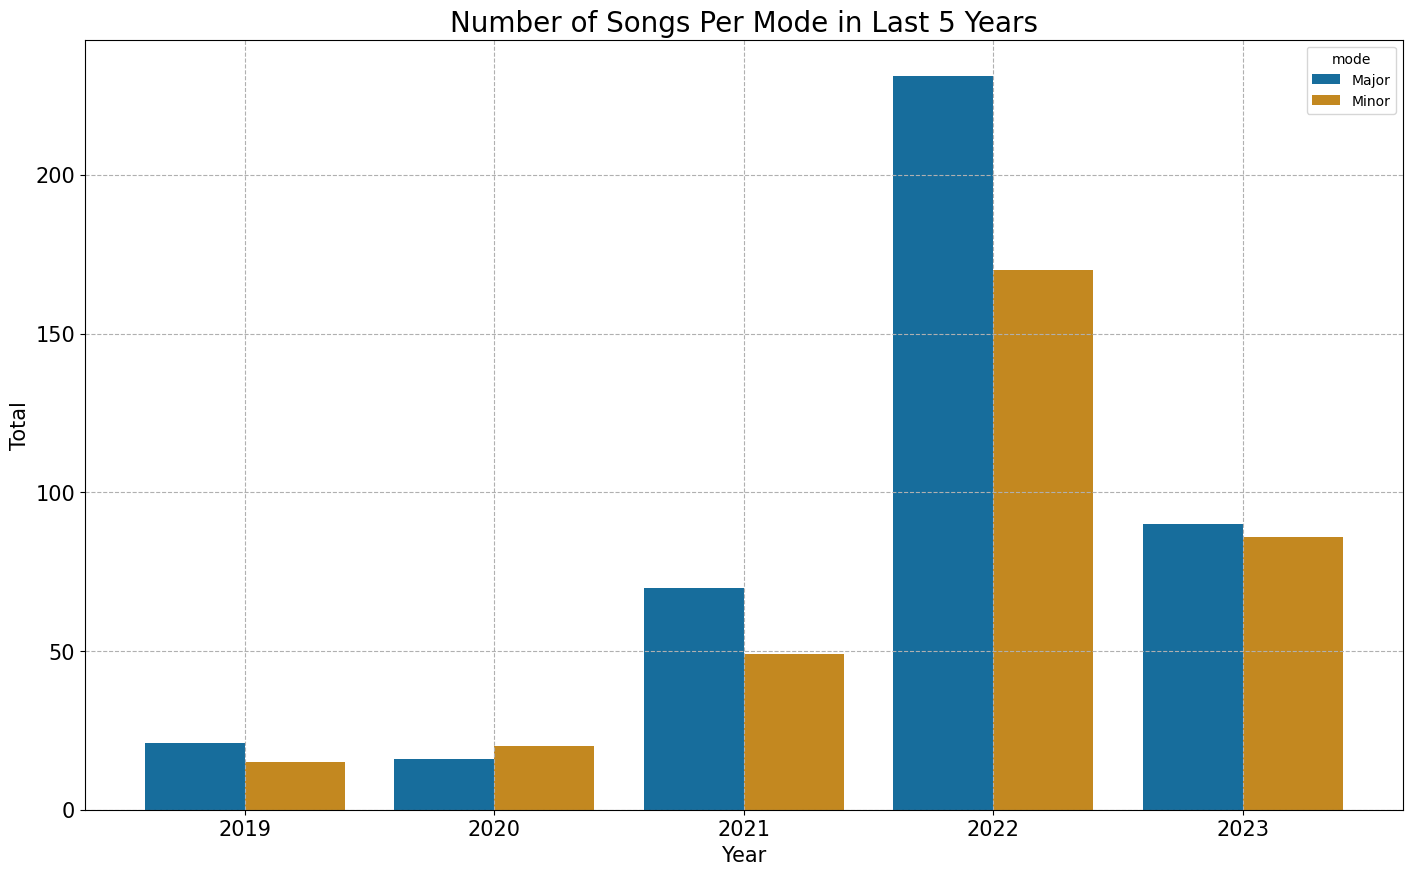

In [341]:
fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot(111)

sns.barplot(data = mode_history_count, 
           x = mode_history_count['released_year'],
           y = mode_history_count['total'],
           hue= 'mode',
           palette= 'colorblind')
plt.plot()

#plt.bar_label(ax1.containers[0], label_type='edge', fontsize = 15)

plt.grid(linestyle='--')
plt.xlabel('Year', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Number of Songs Per Mode in Last 5 Years', fontsize=20)

plt.show()

Note: Since the dataset was last updated in August, the final count in 2023 can still change. Based on the last 4 years, there are more major based songs than minor based per year. It is likely that there will be more major songs produced by the end of the year while being streamed more than the counterpart.

### Revisiting Correlations Between the Characteristics

In [342]:
clump = music[['bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%', 'liveness_%','speechiness_%']]
clump

bpm  danceability_%  valence_%  energy_%  acousticness_%  \
0    125              80         89        83              31   
1     92              71         61        74               7   
2    138              51         32        53              17   
3    170              55         58        72              11   
4    144              65         23        80              14   
..   ...             ...        ...       ...             ...   
946  144              60         24        39              57   
947  166              42          7        24              83   
948   92              80         81        67               4   
949   97              82         67        77               8   
950   90              61         32        67              15   

     instrumentalness_%  liveness_%  speechiness_%  
0                     0           8              4  
1                     0          10              4  
2                     0          31              6  
3                     0          11             15  
4                    63          11              6  
..                  ...         ...            ...  
946                   0           8              3  
947                   1          12              6  
948                   0           8              6  
949                   0          12              5  
950                   0          11              5  

[951 rows x 8 columns]

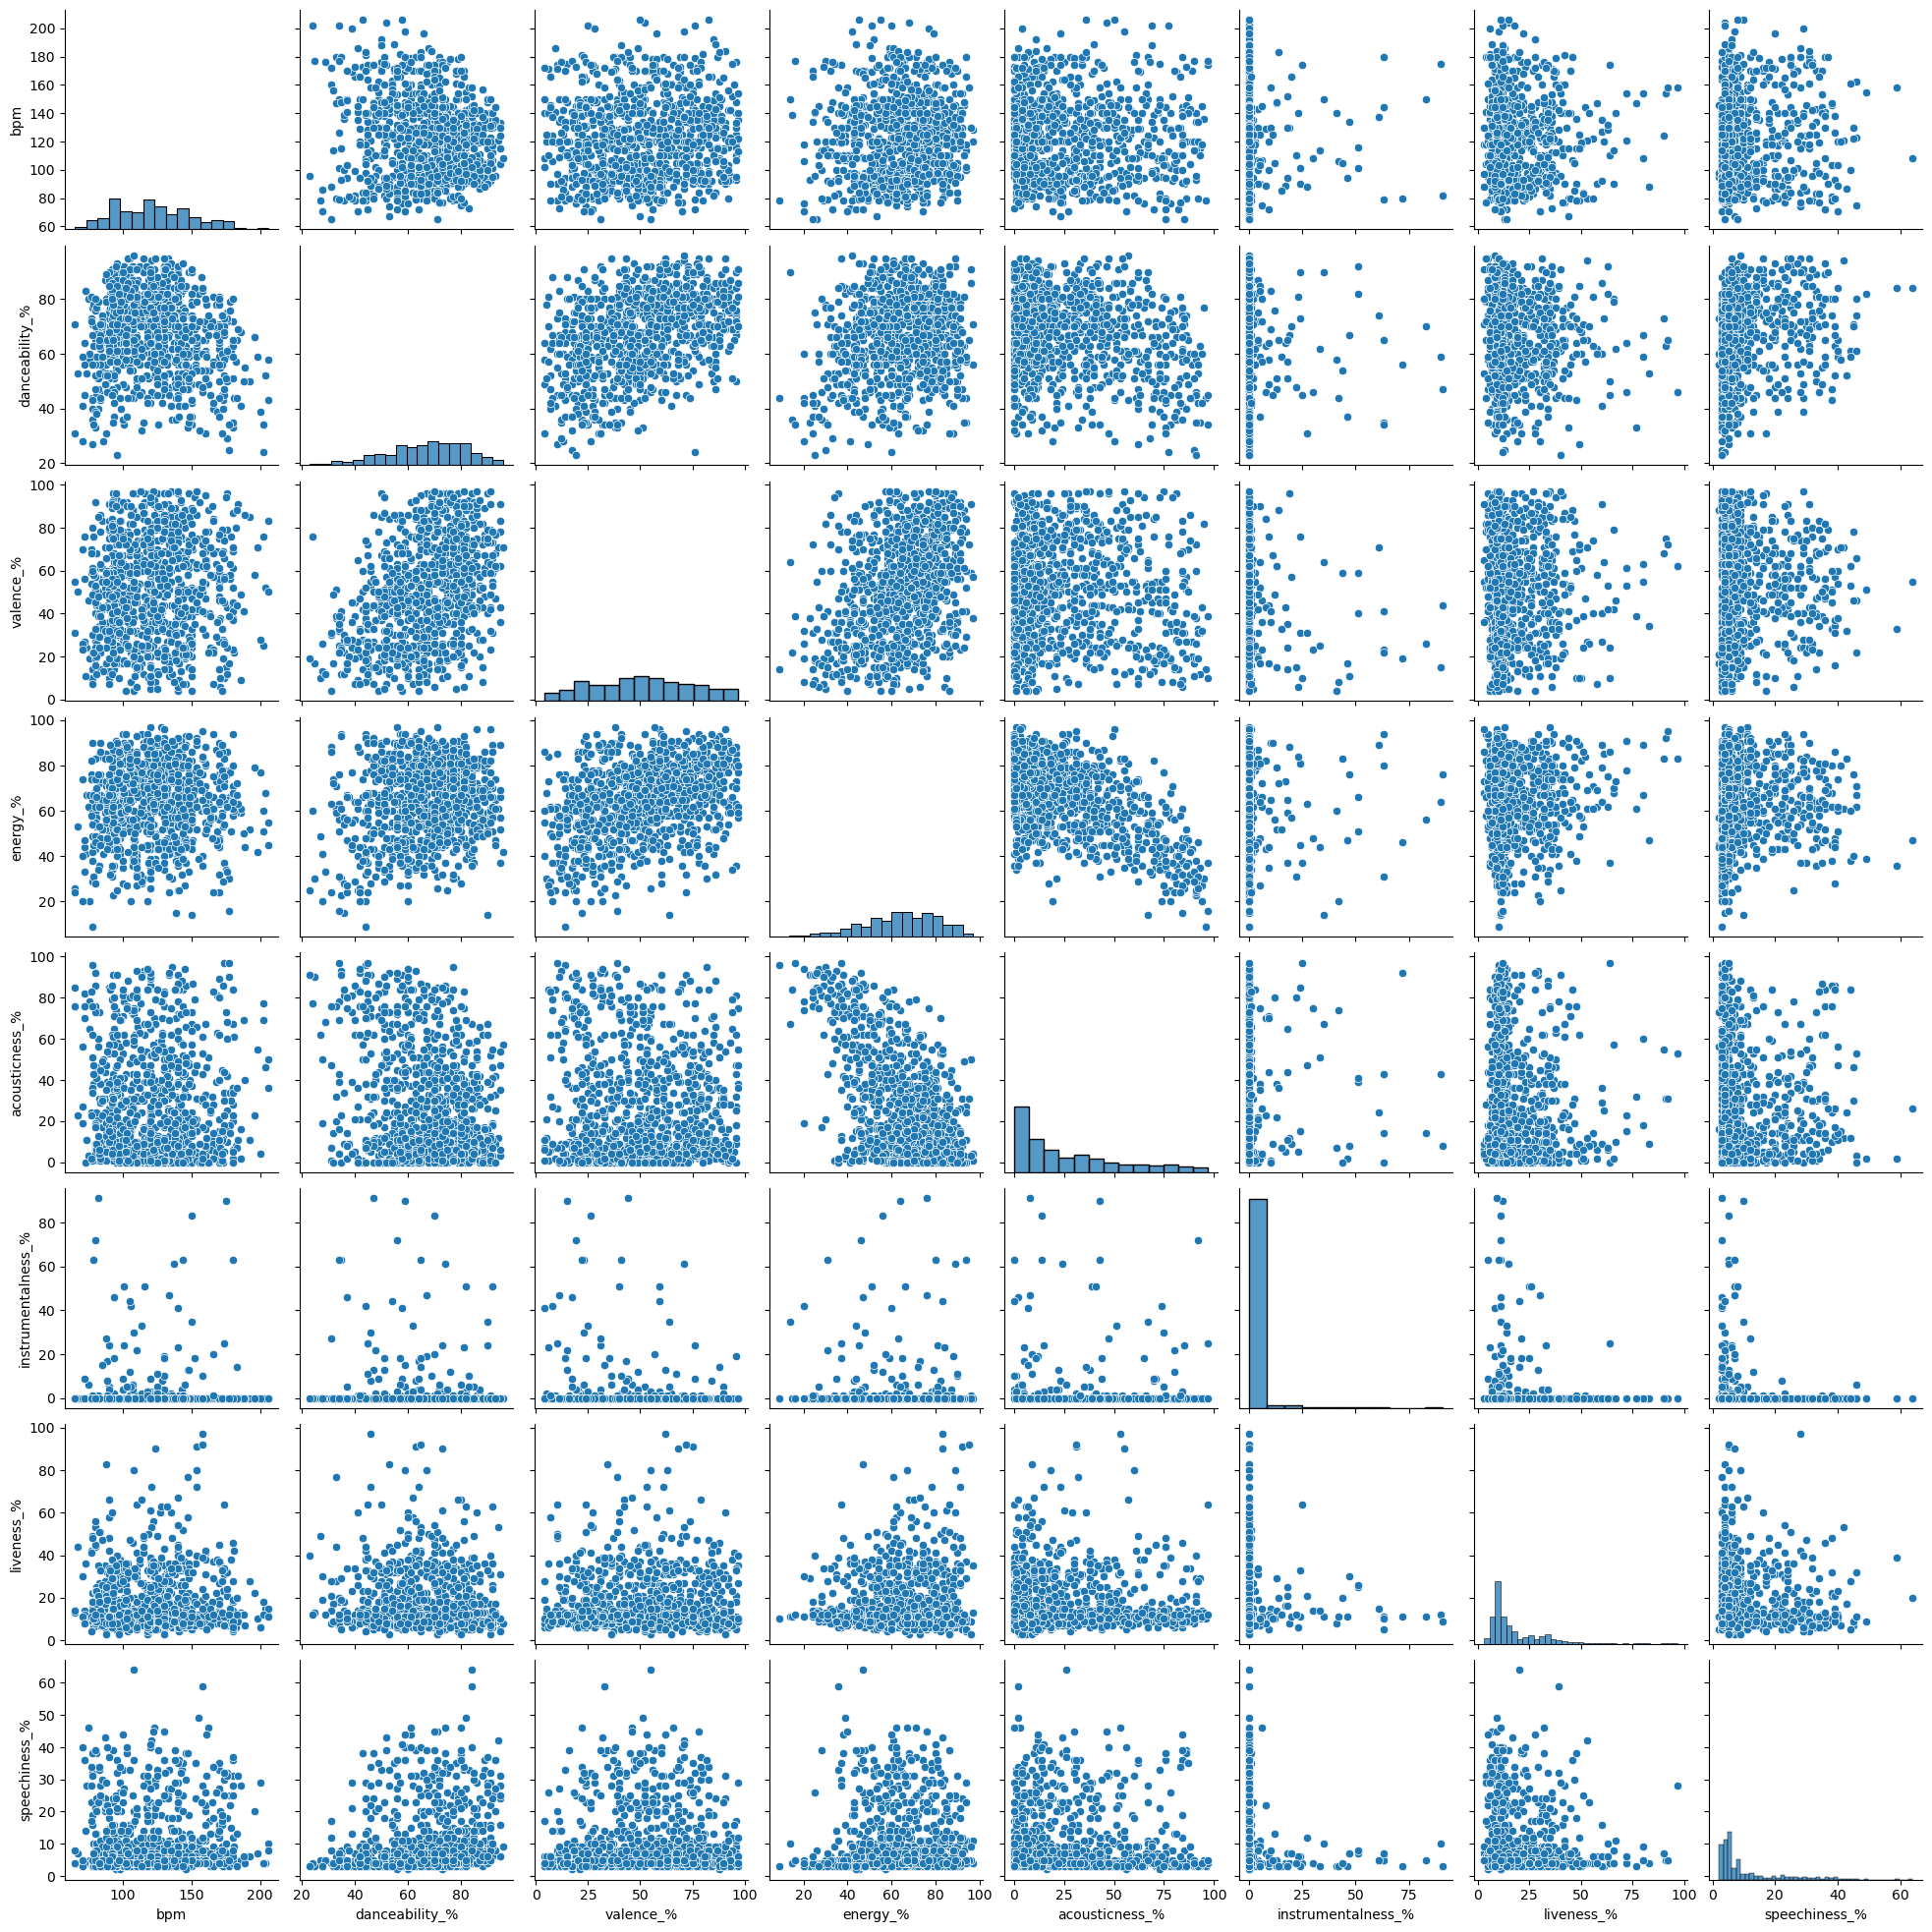

In [343]:
#Created scatterplot matrix to identify any correlations
sns.pairplot(clump)

In [344]:
music_trait = music.iloc[:,-10:]
music_trait = music_trait.drop(['key','mode'], axis=1)
music_trait

bpm  danceability_%  valence_%  energy_%  acousticness_%  \
0    125              80         89        83              31   
1     92              71         61        74               7   
2    138              51         32        53              17   
3    170              55         58        72              11   
4    144              65         23        80              14   
..   ...             ...        ...       ...             ...   
946  144              60         24        39              57   
947  166              42          7        24              83   
948   92              80         81        67               4   
949   97              82         67        77               8   
950   90              61         32        67              15   

     instrumentalness_%  liveness_%  speechiness_%  
0                     0           8              4  
1                     0          10              4  
2                     0          31              6  
3                     0          11             15  
4                    63          11              6  
..                  ...         ...            ...  
946                   0           8              3  
947                   1          12              6  
948                   0           8              6  
949                   0          12              5  
950                   0          11              5  

[951 rows x 8 columns]

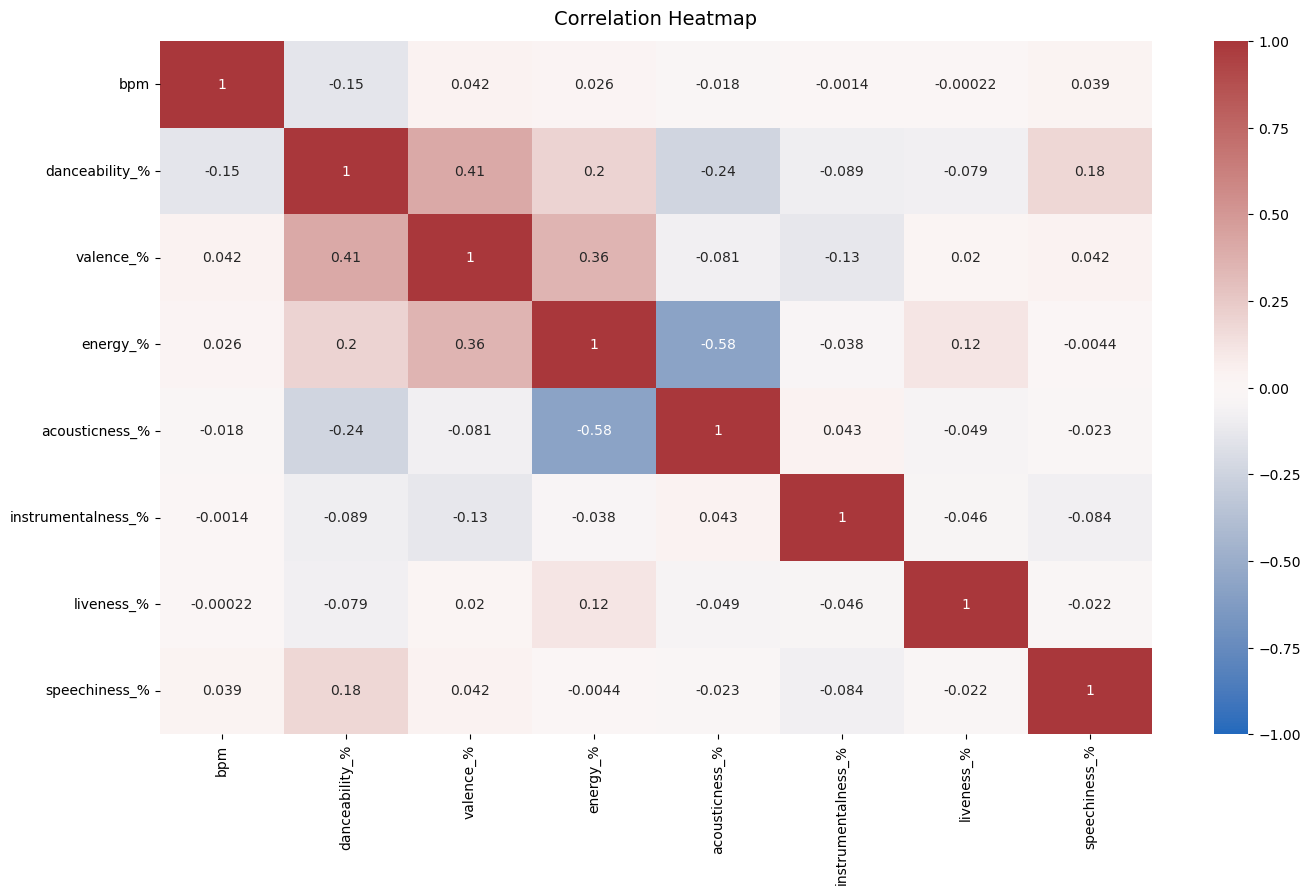

In [345]:
#Similar to scatterplot matrix but shares correlation coefficient instead.
#This helps idenitfy any correlation in case scatterplot matrix may not be clear.
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(music_trait.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

There is a moderate level of correlation between valence/danceability and acousticness/energy. There is a weak level of correlation between energy level and valence. 

After identifying top artist/songs, what are some trends among the pool of songs?

In [346]:
#Created danceability dataframe which will then be filtered down to 2019-2023.
dance = music.groupby('released_year')['danceability_%'].mean().rename_axis('year').reset_index(name='avg danceability')
dance = dance[dance['year'].isin([2019,2020,2021,2022,2023])]

In [347]:
#Created valence dataframe which will then be filtered down to 2019-2023.
valence = music.groupby('released_year')['valence_%'].mean().rename_axis('year').reset_index(name='avg valence level')
valence = valence[valence['year'].isin([2019,2020,2021,2022,2023])]

In [348]:
#Created energy dataframe which will then be filtered down to 2019-2023.
energy = music.groupby('released_year')['energy_%'].mean().rename_axis('year').reset_index(name='avg energy level')
energy = energy[energy['year'].isin([2019,2020,2021,2022,2023])]

In [349]:
#Created acoustic dataframe which will then be filtered down to 2019-2023.
acoustic = music.groupby('released_year')['acousticness_%'].mean().rename_axis('year').reset_index(name='avg acousticness level')
acoustic = acoustic[acoustic['year'].isin([2019,2020,2021,2022,2023])]

In [350]:
#Created instrument dataframe which will then be filtered down to 2019-2023.
instrument = music.groupby('released_year')['instrumentalness_%'].mean().rename_axis('year').reset_index(name='avg instrumentalness level')
instrument = instrument[instrument['year'].isin([2019,2020,2021,2022,2023])]

In [351]:
#Created live dataframe which will then be filtered down to 2019-2023.
live = music.groupby('released_year')['liveness_%'].mean().rename_axis('year').reset_index(name='avg liveness level')
live = live[live['year'].isin([2019,2020,2021,2022,2023])]

In [352]:
#Created speech dataframe which will then be filtered down to 2019-2023.
speech = music.groupby('released_year')['speechiness_%'].mean().rename_axis('year').reset_index(name='avg speech level')
speech = speech[speech['year'].isin([2019,2020,2021,2022,2023])]

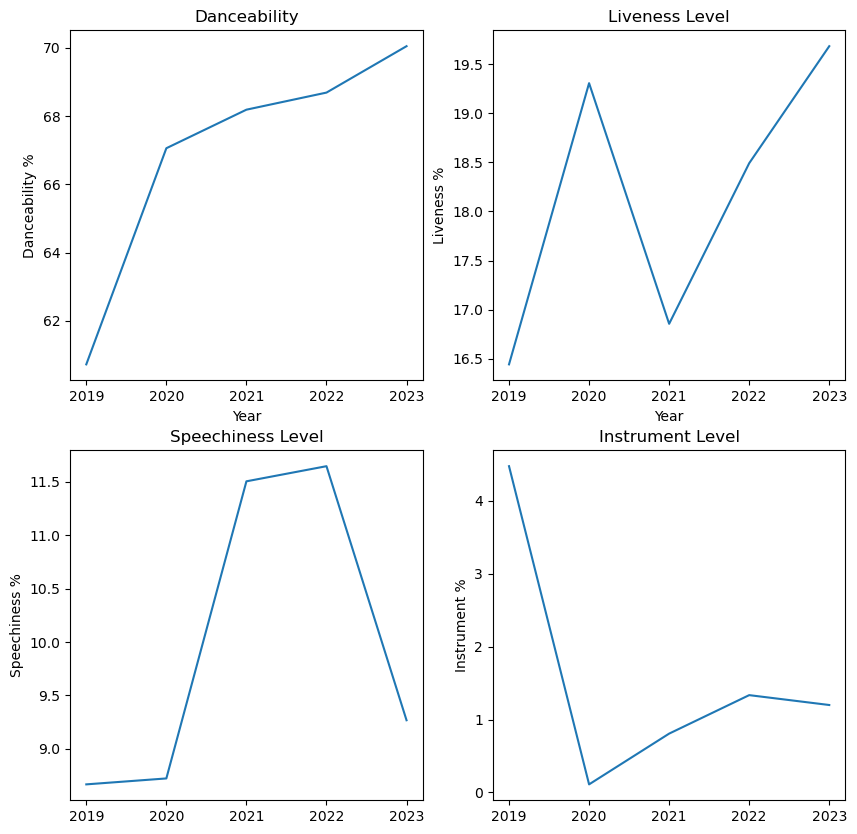

In [353]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].plot(dance['year'], dance['avg danceability'])
ax[0,0].set_title('Danceability')
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Danceability %')

ax[0,1].plot(live['year'], live['avg liveness level'])
ax[0,1].set_title('Liveness Level')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('Liveness %')

ax[1,0].plot(speech['year'], speech['avg speech level'])
ax[1,0].set_title('Speechiness Level')
ax[1,0].set_ylabel('Speechiness %')

ax[1,1].plot(instrument['year'], instrument['avg instrumentalness level'])
ax[1,1].set_title('Instrument Level')
ax[1,1].set_ylabel('Instrument %')

plt.show()

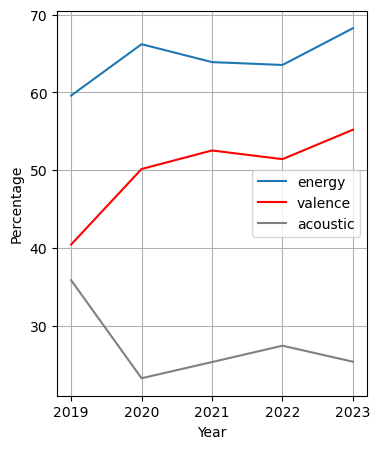

In [354]:
#Plot the three traits as they have some level of correlation.
fig = plt.figure(figsize=(4,5))

plt.plot(energy['year'], energy['avg energy level'], label='energy')
plt.plot(valence['year'], valence['avg valence level'], label='valence', color='red')
plt.plot(acoustic['year'], acoustic['avg acousticness level'], label='acoustic', color='grey')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.show()

Analyze mode and key's trends with the traits (danceability, valence, energy, acousticness, instrumentalness, liveness, speechiness).

Even though there is a drop in danceability level from 2020-2021 for major-based songs, average danceability level has been increasing year to year. 

In [355]:
#Analyze the trend based on the mode.
music_subset = music[['released_year','key','mode','danceability_%', 
                    'valence_%','energy_%','acousticness_%','instrumentalness_%',
                    'liveness_%','speechiness_%']]
music_subset = music_subset[music_subset['released_year'].isin([2019,2020,2021,2022,2023])]
music_subset.head()

released_year key   mode  danceability_%  valence_%  energy_%  \
0           2023   B  Major              80         89        83   
1           2023  C#  Major              71         61        74   
2           2023   F  Major              51         32        53   
3           2019   A  Major              55         58        72   
4           2023   A  Minor              65         23        80   

   acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
0              31                   0           8              4  
1               7                   0          10              4  
2              17                   0          31              6  
3              11                   0          11             15  
4              14                  63          11              6

In [356]:
#Averages for mode.
music_subset = music_subset.groupby(['released_year','mode']).agg('mean', numeric_only= True)

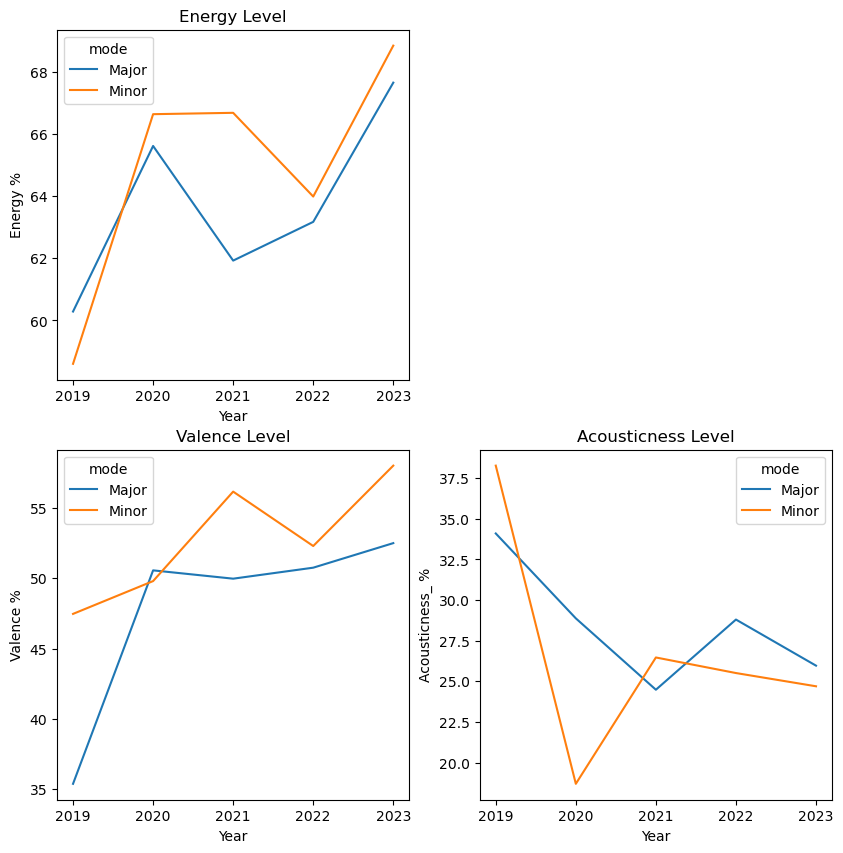

In [357]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

sns.lineplot(music_subset, x='released_year', y='energy_%', hue = 'mode', ax=ax[0,0])
ax[0,0].set_title('Energy Level')
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Energy %')

sns.lineplot(music_subset, x='released_year', y='valence_%', hue = 'mode', ax=ax[1,0])
ax[1,0].set_title('Valence Level')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Valence %')

sns.lineplot(music_subset, x='released_year', y='acousticness_%', hue = 'mode', ax=ax[1,1])
ax[1,1].set_title('Acousticness Level')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Acousticness_ %')

ax[0,1].set_axis_off()
plt.show()

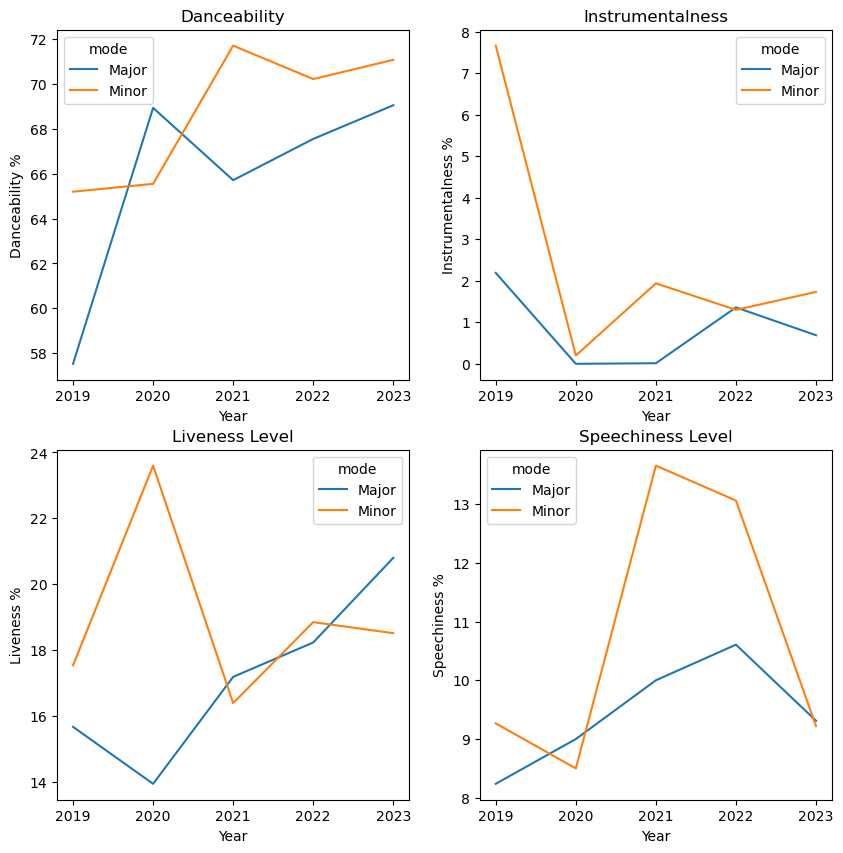

In [358]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

sns.lineplot(music_subset, x='released_year', y='danceability_%', hue = 'mode', ax=ax[0,0])
ax[0,0].set_title('Danceability')
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Danceability %')

sns.lineplot(music_subset, x='released_year', y='instrumentalness_%', hue = 'mode', ax=ax[0,1])
ax[0,1].set_title('Instrumentalness')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('Instrumentalness %')

sns.lineplot(music_subset, x='released_year', y='liveness_%', hue = 'mode', ax=ax[1,0])
ax[1,0].set_title('Liveness Level')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Liveness %')

sns.lineplot(music_subset, x='released_year', y='speechiness_%', hue = 'mode', ax=ax[1,1])
ax[1,1].set_title('Speechiness Level')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Speechiness %')

plt.show()

### Taking a Look at BPM

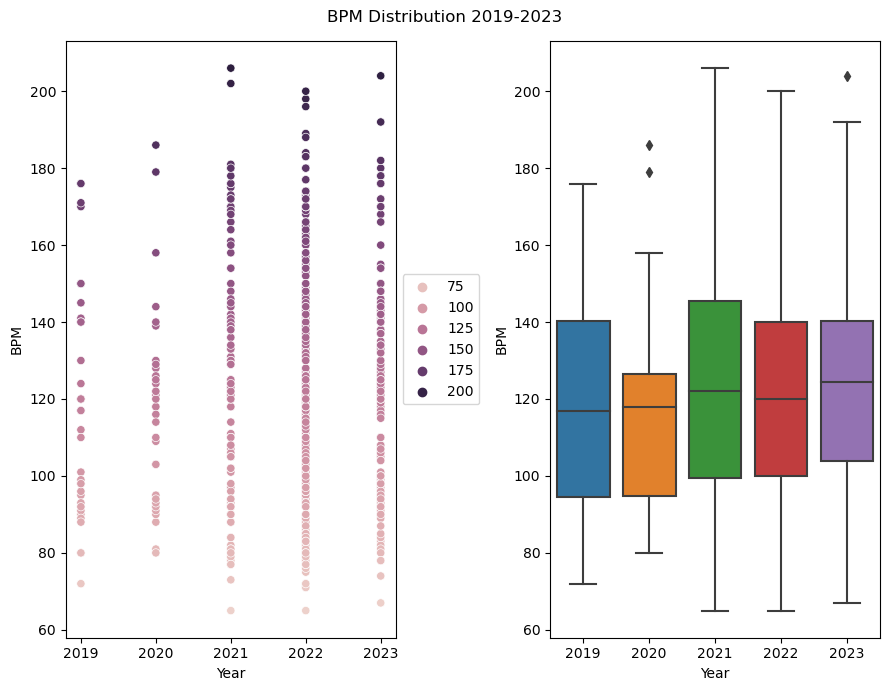

In [360]:
#Scatterplot and boxplot side by side; scatter shows the distribution and boxplot shows outliers and average.
fig, ax = plt.subplots(1,2,figsize=(9,7))

beats = music[['released_year', 'bpm']]
beats = beats[beats['released_year'].isin([2019,2020,2021,2022,2023])]

fig.suptitle('BPM Distribution 2019-2023')
sns.scatterplot(data=beats, x='released_year', y='bpm', hue='bpm', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('BPM')
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

sns.boxplot(data=beats, x='released_year', y='bpm')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('BPM')

fig.tight_layout()

plt.show()

From 2019-2023, each year's median bpm of a song is approximately 120.

## **Multi-Linear Regression**

Let's try using multiple linear regression to build a model that predicts number of streams for each track.

In [361]:
#exported as csv file for Tableau
#music.to_csv('fixed_music_v2.csv')

In [362]:
#Will be using this for multiple linear rergession.
ml_music = music

In [363]:
ml_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            951 non-null    object 
 1   artist(s)_name        951 non-null    object 
 2   artist_count          951 non-null    int64  
 3   released_year         951 non-null    int64  
 4   released_month        951 non-null    int64  
 5   released_day          951 non-null    int64  
 6   in_spotify_playlists  951 non-null    int64  
 7   in_spotify_charts     951 non-null    int64  
 8   streams               951 non-null    int64  
 9   in_apple_playlists    951 non-null    int64  
 10  in_apple_charts       951 non-null    int64  
 11  in_deezer_playlists   951 non-null    int64  
 12  in_deezer_charts      951 non-null    int64  
 13  in_shazam_charts      951 non-null    float64
 14  bpm                   951 non-null    int64  
 15  key                   9

In [364]:
ml_music.corr(numeric_only=True)['streams']

artist_count           -0.131748
released_year          -0.215301
released_month         -0.025046
released_day            0.010554
in_spotify_playlists    0.790075
in_spotify_charts       0.246072
streams                 1.000000
in_apple_playlists      0.772675
in_apple_charts         0.320835
in_deezer_playlists     0.598330
in_deezer_charts        0.228810
in_shazam_charts       -0.005341
bpm                    -0.002250
danceability_%         -0.105993
valence_%              -0.041193
energy_%               -0.026287
acousticness_%         -0.004230
instrumentalness_%     -0.044833
liveness_%             -0.048823
speechiness_%          -0.112224
Name: streams, dtype: float64

In [365]:
ml_stream = ml_music['streams']
ml_music = ml_music.drop(['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts','in_shazam_charts', 'bpm',
               'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%','speechiness_%', 'streams'], axis=1)
ml_music['streams'] = ml_stream
ml_music = ml_music.rename(columns={'artist(s)_name': 'artists'})

In [366]:
ml_music

track_name             artists  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook   
1                                   LALA         Myke Towers   
2                                vampire      Olivia Rodrigo   
3                           Cruel Summer        Taylor Swift   
4                         WHERE SHE GOES           Bad Bunny   
..                                   ...                 ...   
946                         My Mind & Me        Selena Gomez   
947            Bigger Than The Whole Sky        Taylor Swift   
948                 A Veces (feat. Feid)  Feid, Paulo Londra   
949                        En La De Ella  Feid, Sech, Jhayco   
950                                Alone           Burna Boy   

     in_spotify_playlists  in_apple_playlists  in_deezer_playlists key   mode  \
0                     553                  43                   45   B  Major   
1                    1474                  48                   58  C#  Major   
2                    1397                  94                   91   F  Major   
3                    7858                 116                  125   A  Major   
4                    3133                  84                   87   A  Minor   
..                    ...                 ...                  ...  ..    ...   
946                   953                  61                   37   A  Major   
947                  1180                   4                    8  F#  Major   
948                   573                   2                    7  C#  Major   
949                  1320                  29                   17  C#  Major   
950                   782                  27                   32   E  Minor   

       streams  
0    141381703  
1    133716286  
2    140003974  
3    800840817  
4    303236322  
..         ...  
946   91473363  
947  121871870  
948   73513683  
949  133895612  
950   96007391  

[951 rows x 8 columns]

In [367]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [368]:
music_X = ml_music[['track_name', 'artists', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'key', 'mode']]
music_y = ml_music[['streams']]

In [369]:
X_train, X_test, y_train, y_test = train_test_split(music_X,music_y, test_size=0.3, random_state=42)

In [370]:
ols_formula = 'streams ~ C(track_name) + C(artists) + in_spotify_playlists + in_apple_playlists + in_deezer_playlists + C(key) + C(mode)'
ols_data = pd.concat([X_train,y_train], axis=1)

In [371]:
OLS = ols(formula= ols_formula, data= ols_data)
model= OLS.fit()

In [372]:
model.summary()

/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                nan
Time:                        11:13:32   Log-Likelihood:                 3593.9
No. Observations:                 665   AIC:                            -5858.
Df Residuals:                       0   BIC:                            -2865.
Df Model:                         664                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================================================================================
                                                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                     1.822e+08        inf          0        nan         nan         nan
C(track_name)[T.(It Goes Like) Nanana - Edit]                                                                                                -1.257e+08        inf         -0        nan         nan         nan
C(track_name)[T.10 Things I Hate About You]                                                                                                  -7.181e+07        inf         -0        nan         nan         nan
C(track_name)[T.10:35]                                                                                                                       -9.188e+07        inf         -0        nan         nan         nan
C(track_name)[T.2 Be Loved (Am I Ready)]                                                                                                      -7.24e+07        inf         -0        nan         nan         nan
C(track_name)[T.212]                                                                                                                          -1.74e+06        inf         -0        nan         nan         nan
C(track_name)[T.25k jacket (feat. Lil Baby)]                                                                                                 -8.636e+07        inf         -0        nan         nan         nan
C(track_name)[T.295]                                                                                                                         -4.057e+07        inf         -0        nan         nan         nan
C(track_name)[T.505]                                                                                                                          2.017e+08        inf          0        nan         nan         nan
C(track_name)[T.69]                                                                                                                          -1.233e+08        inf         -0        nan         nan         nan
C(track_name)[T.A Holly Jolly Christmas - Single Version]                                                                                    -1.711e+08        inf         -0        nan         nan         nan
C(track_name)[T.A Tale By Quincy]                                                                                                            -4.022e+08      

Trying out **one hot encoding** for the columns with strings or object types to see if it makes a difference in a model.

In [373]:
ml_music_encode = pd.get_dummies(ml_music, columns=['track_name','artists', 'key', 'mode'])
ml_music_encode

in_spotify_playlists  in_apple_playlists  in_deezer_playlists    streams  \
0                     553                  43                   45  141381703   
1                    1474                  48                   58  133716286   
2                    1397                  94                   91  140003974   
3                    7858                 116                  125  800840817   
4                    3133                  84                   87  303236322   
..                    ...                 ...                  ...        ...   
946                   953                  61                   37   91473363   
947                  1180                   4                    8  121871870   
948                   573                   2                    7   73513683   
949                  1320                  29                   17  133895612   
950                   782                  27                   32   96007391   

     track_name_'98 Braves  track_name_'Till I Collapse  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   
..                     ...                          ...   
946                      0                            0   
947                      0                            0   
948                      0                            0   
949                      0                            0   
950                      0                            0   

     track_name_(It Goes Like) Nanana - Edit  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
946                                        0   
947                                        0   
948                                        0   
949                                        0   
950                                        0   

     track_name_10 Things I Hate About You  track_name_10:35  \
0                                        0                 0   
1                                        0                 0   
2                                        0                 0   
3                                        0                 0   
4                                        0                 0   
..                                     ...               ...   
946                                      0                 0   
947                                      0                 0   
948                                      0                 0   
949                                      0                 0   
950                                      0                 0   

     track_name_2 Be Loved (Am I Ready)  ...  key_D  key_D#  key_E  key_F  \
0                                     0  ...      0       0      0      0   
1                                     0  ...      0       0      0      0   
2                                     0  ...      0       0      0      1   
3                                     0  ...      0       0      0      0   
4                                     0  ...      0       0      0      0   
..                                  ...  ...    ...     ...    ...    ...   
946                                   0  ...      0       0      0      0   
947                                   0  ...      0       0      0      0   
948                                   0  ...      0       0      0      0   
949                                   0  ...      0       0      0      0   
950                                   0  ...      0       0      1      0   

     key_F#  key_G  key_G#  key_Unknown  mode_Major 

In [374]:
encode_y = ml_music_encode['streams']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


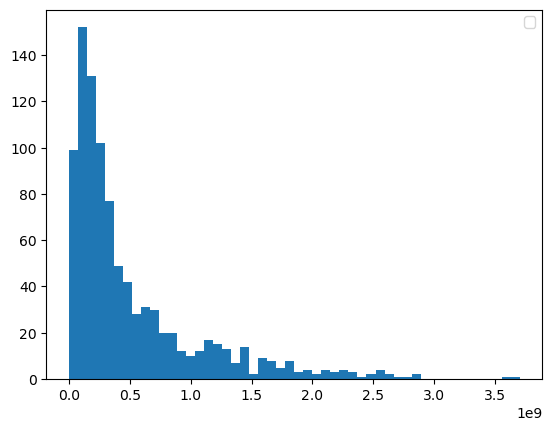

In [375]:
plt.hist(encode_y, bins=50)
plt.legend()
plt.show()

In [376]:
encode_X = ml_music_encode.drop('streams', axis=1)

In [377]:
from sklearn.linear_model import LinearRegression

In [378]:
encode_model = LinearRegression()
encode_model.fit(encode_X, encode_y)

LinearRegression()

In [379]:
coefficients = encode_model.coef_
intercept = encode_model.intercept_

In [380]:
print('Coefficient:', coefficients)
print('Intercept:', intercept)

Coefficient: [   76867.79513584  -479814.26783807  -134178.44548351 ...
 -7435769.74409676  8339668.04535064 -8339668.23913753]
Intercept: 180715284.83513916


In [381]:
X_with_intercept = sm.add_constant(encode_X)
encode_model = sm.OLS(encode_y, X_with_intercept).fit()

encode_model.summary()

/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                nan
Time:                        11:13:36   Log-Likelihood:                 5413.3
No. Observations:                 951   AIC:                            -8925.
Df Residuals:                       0   BIC:                            -4305.
Df Model:                         950                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================================================================================
                                                                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                   1.139e+08        inf          0        nan         nan         nan
in_spotify_playlists                                                                                                                     7.69e+04        inf          0        nan         nan         nan
in_apple_playlists                                                                                                                       -4.8e+05        inf         -0        nan         nan         nan
in_deezer_playlists                                                                                                                    -1.343e+05        inf         -0        nan         nan         nan
track_name_'98 Braves                                                                                                                  -2.213e+07        inf         -0        nan         nan         nan
track_name_'Till I Collapse                                                                                                             4.211e+07        inf          0        nan         nan         nan
track_name_(It Goes Like) Nanana - Edit                                                                                                -1.178e+08        inf         -0        nan         nan         nan
track_name_10 Things I Hate About You                                                                                                  -6.803e+07        inf         -0        nan         nan         nan
track_name_10:35                                                                                                                       -8.907e+07        inf         -0        nan         nan         nan
track_name_2 Be Loved (Am I Ready)                                                                                                     -1.221e+08        inf         -0        nan         nan         nan
track_name_2055                                                                                                                         1.529e+08        inf          0        nan         nan         nan
track_name_212                                                                                                                          6.958e+06        inf          0        nan         nan         nan
track_name_25k jacket (feat. Lil Baby)

There is an issue of multi-collinearity. The following code below shows "in_spotify_playlist" being highly correlated with the other 2 independent variables. Will remove them to see if model improves.

In [382]:
ml_music.corr(numeric_only=True)

in_spotify_playlists  in_apple_playlists  \
in_spotify_playlists              1.000000            0.708236   
in_apple_playlists                0.708236            1.000000   
in_deezer_playlists               0.826368            0.471949   
streams                           0.790075            0.772675   

                      in_deezer_playlists   streams  
in_spotify_playlists             0.826368  0.790075  
in_apple_playlists               0.471949  0.772675  
in_deezer_playlists              1.000000  0.598330  
streams                          0.598330  1.000000

Updated database for machine learning

In [383]:
ml_music2 = ml_music.drop(columns='in_spotify_playlists', axis=1)
ml_music2

track_name             artists  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook   
1                                   LALA         Myke Towers   
2                                vampire      Olivia Rodrigo   
3                           Cruel Summer        Taylor Swift   
4                         WHERE SHE GOES           Bad Bunny   
..                                   ...                 ...   
946                         My Mind & Me        Selena Gomez   
947            Bigger Than The Whole Sky        Taylor Swift   
948                 A Veces (feat. Feid)  Feid, Paulo Londra   
949                        En La De Ella  Feid, Sech, Jhayco   
950                                Alone           Burna Boy   

     in_apple_playlists  in_deezer_playlists key   mode    streams  
0                    43                   45   B  Major  141381703  
1                    48                   58  C#  Major  133716286  
2                    94                   91   F  Major  140003974  
3                   116                  125   A  Major  800840817  
4                    84                   87   A  Minor  303236322  
..                  ...                  ...  ..    ...        ...  
946                  61                   37   A  Major   91473363  
947                   4                    8  F#  Major  121871870  
948                   2                    7  C#  Major   73513683  
949                  29                   17  C#  Major  133895612  
950                  27                   32   E  Minor   96007391  

[951 rows x 7 columns]

In [384]:
music_X = ml_music2[['track_name', 'artists', 'in_apple_playlists', 'in_deezer_playlists', 'key', 'mode']]
music_y = ml_music2[['streams']]

In [385]:
X_train, X_test, y_train, y_test = train_test_split(music_X,music_y, test_size=0.3, random_state=42)

In [386]:
ols_formula = 'streams ~ C(track_name) + C(artists) + in_apple_playlists + in_deezer_playlists + C(key) + C(mode)'
ols_data = pd.concat([X_train,y_train], axis=1)

OLS = ols(formula= ols_formula, data= ols_data)

model= OLS.fit()
model.summary()

/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                nan
Time:                        11:13:37   Log-Likelihood:                 3751.4
No. Observations:                 665   AIC:                            -6173.
Df Residuals:                       0   BIC:                            -3180.
Df Model:                         664                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================================================================================
                                                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                     3.553e+08        inf          0        nan         nan         nan
C(track_name)[T.(It Goes Like) Nanana - Edit]                                                                                                 -1.63e+08        inf         -0        nan         nan         nan
C(track_name)[T.10 Things I Hate About You]                                                                                                  -1.785e+08        inf         -0        nan         nan         nan
C(track_name)[T.10:35]                                                                                                                       -1.093e+08        inf         -0        nan         nan         nan
C(track_name)[T.2 Be Loved (Am I Ready)]                                                                                                     -8.365e+07        inf         -0        nan         nan         nan
C(track_name)[T.212]                                                                                                                         -8.638e+07        inf         -0        nan         nan         nan
C(track_name)[T.25k jacket (feat. Lil Baby)]                                                                                                 -1.749e+08        inf         -0        nan         nan         nan
C(track_name)[T.295]                                                                                                                         -1.236e+08        inf         -0        nan         nan         nan
C(track_name)[T.505]                                                                                                                          7.963e+07        inf          0        nan         nan         nan
C(track_name)[T.69]                                                                                                                          -2.452e+08        inf         -0        nan         nan         nan
C(track_name)[T.A Holly Jolly Christmas - Single Version]                                                                                    -3.624e+07        inf         -0        nan         nan         nan
C(track_name)[T.A Tale By Quincy]                                                                                                             -6.22e+08      

Checking for normality.

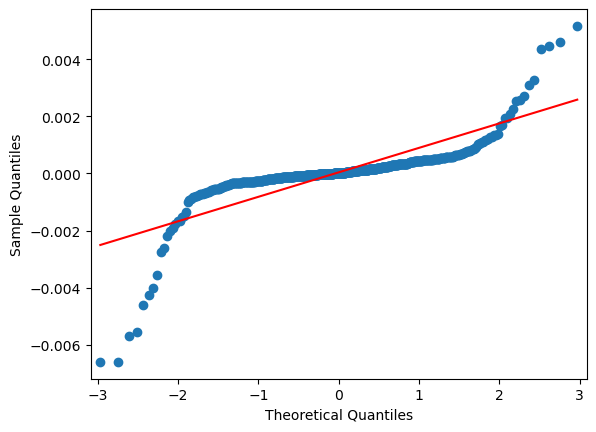

In [387]:
fig = sm.qqplot(model.resid, line='s')
plt.show()

Need to fix this as the points do not form a diagonal line. Will applying log work?

Log transformation on the encode section.

In [388]:
encode_y = np.log(ml_music_encode['streams'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


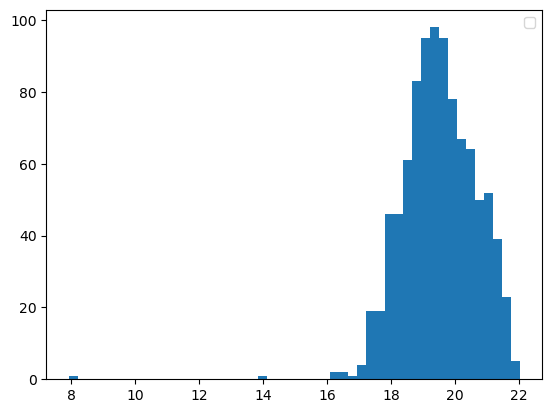

In [389]:
plt.hist(encode_y, bins=50)
plt.legend()
plt.show()

In [390]:
encode_model = LinearRegression()
encode_model.fit(encode_X, encode_y)

LinearRegression()

In [391]:
X_with_intercept = sm.add_constant(encode_X)
encode_model = sm.OLS(encode_y, X_with_intercept).fit()

encode_model.summary()

/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/barryliu/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                nan
Time:                        11:13:40   Log-Likelihood:                 21189.
No. Observations:                 951   AIC:                        -4.048e+04
Df Residuals:                       0   BIC:                        -3.586e+04
Df Model:                         950                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================================================================================
                                                                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                     11.9235        inf          0        nan         nan         nan
in_spotify_playlists                                                                                                                       0.0001        inf          0        nan         nan         nan
in_apple_playlists                                                                                                                        -0.0008        inf         -0        nan         nan         nan
in_deezer_playlists                                                                                                                       -0.0004        inf         -0        nan         nan         nan
track_name_'98 Braves                                                                                                                     -0.6045        inf         -0        nan         nan         nan
track_name_'Till I Collapse                                                                                                               -0.0571        inf         -0        nan         nan         nan
track_name_(It Goes Like) Nanana - Edit                                                                                                   -0.6051        inf         -0        nan         nan         nan
track_name_10 Things I Hate About You                                                                                                     -0.1117        inf         -0        nan         nan         nan
track_name_10:35                                                                                                                          -0.0060        inf         -0        nan         nan         nan
track_name_2 Be Loved (Am I Ready)                                                                                                        -0.4065        inf         -0        nan         nan         nan
track_name_2055                                                                                                                            0.5504        inf          0        nan         nan         nan
track_name_212                                                                                                                            -0.0286        inf         -0        nan         nan         nan
track_name_25k jacket (feat. Lil Baby)

Transforming does not seem to help with the model. It is possible that the dataset needs more data for the model to be more accurate. Investigating a different model can be considered as well.  